- input
  - results_*/processed/
- output
  - tables/* median tables
  - tables/* final data table
  - figures/* box plots 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools  # for cycling through colors if necessary
import glob
import re
import os

In [2]:
SAVE_TABLES = True

In [15]:
# wattmeter: tiny -> tiny_starcoder in model, label
# nvidia: tiny -> tiny_starcoder in model, label
# energi: tiny -> tiny_starcoder in model, label

path = f"D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00/" # change

#df = pd.read_csv(my_file, index_col=None, header=0)
profilers_prefixes = ['energi', 'nvidia','wattmeter']
prefix = profilers_prefixes[1] # change if other profiler

for i in range(1,11):
    results_dir = f'results_{i}/' 
    print(f"++++++++--------------------results_dir: {results_dir}---------------------------++++++++:")

    os.chdir(path)
    
    #file = f'processed/{prefix}_processed_updated.csv' # CHANGE if new dataset, first: energi_processed, then energi_processed_updated
    file = f'processed/time_marks_updated.csv'
    
    print(f"reading -> {path + results_dir +file}")
    profiler_df = pd.read_csv(path + results_dir +file, index_col=None) # 
    #print(profiler_df.columns)

        # Function to update values based on the conditions
    
    # def update_values(value): #change this, tto tiny-starcoder
    #     if value == "tiny":
    #         return "tiny_starcoder"
    #     elif value.endswith("_tiny") and not value.startswith("tinyllama"):
    #         return value.replace("_tiny", "_tiny_starcoder")
    #     return value
    
    def update_values(value):
        if not isinstance(value,str):
            return value
        if value == "tiny_starcoder":
            return "tiny-starcoder"
        elif value.endswith("_tiny_starcoder") and not value.startswith("tinyllama"):
            return value.replace("_tiny_starcoder", "_tiny-starcoder")
        elif value.endswith("_tiny_starcoder_load"):
            return value.replace("_tiny_starcoder_load", "_tiny-starcoder_load")
        elif value.endswith("_tiny_starcoder_inference"):
            return value.replace("_tiny_starcoder_inference", "_tiny-starcoder_inference")
        return value

    columns_to_update = ["model", "label"]
    columns_to_update = ["model", "label", "model_name","label_time"] # in time_marks file
    
    # Apply the function to the specified columns
    for column in columns_to_update:
        try:
            print(f"Changed column: {column}")
            profiler_df[column] = profiler_df[column].apply(update_values)
        except Exception as e:
            print(f"Could not changed column: {column}, exception: {e}")
    

    #processed_updated_name =  f'processed/{prefix}_processed_updated.csv' #change
    processed_updated_name =  f'processed/time_marks_updated.csv'
    
    if SAVE_TABLES:
        profiler_df.to_csv(path + results_dir + processed_updated_name, index=False)
        print(f"Results saved in {path + results_dir + processed_updated_name}")
    else:
        print(f"Results NOT saved in {path + results_dir + processed_updated_name}")

    # check: grep -r tiny_starcoder nov_cudaep_00/results_*/processed/*updated.csv

++++++++--------------------results_dir: results_1/---------------------------++++++++:
reading -> D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00/results_1/processed/time_marks_updated.csv
Changed column: model
Changed column: label
Changed column: model_name
Changed column: label_time
Results saved in D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00/results_1/processed/time_marks_updated.csv
++++++++--------------------results_dir: results_2/---------------------------++++++++:
reading -> D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00/results_2/processed/time_marks_updated.csv
Changed column: model
Changed column: label
Changed column: model_name
Changed column: label_time
Results saved in D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00/results_2/processed/time_marks_updated.csv
++++++++--------------------results_dir: results_3/---------------------------++++++++:
read

In [16]:
path

'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00/'

In [16]:
num_models = 12 #CHANGE
#path = "D:/GAISSA/energy-repo/last_repo/june_gpu_test/"  # Adjust this path to your CSV files location #CHANGE
#path = "D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_all_results_/"  # Adjust this path to your CSV files location #CHANGE

SAVE_FIGS = True
SAVE_TABLES = True

In [17]:
save_dir = path+"figures_nov/"
tables_dir = path+"tables_nov/"

try:
    os.mkdir(save_dir)
except Exception as e:
    print("could not create directory "+ save_dir )
    print(e)

try:
    os.mkdir(tables_dir)
except Exception as e:
    print("could not create directory "+ tables_dir )
    print(e)



In [18]:
def remove_condition_rows(condition_to_remove,df):
    # example: condition = merged_df['label']  == 'idle_idle'
    df1 = df.copy()
    return df1[~condition_to_remove]

In [19]:
def save_latex_table(df,save_dir):
    df = df.copy()
    df.columns = [col.replace('_', ' ') for col in df.columns]
    
    latex_table = df.to_latex(index=False) 

    # Define the filename
    filename = save_dir
    
    # Open the file in write mode
    with open(filename, 'w') as file:
        file.write(latex_table) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")
        
    # Print LaTeX table
    print(latex_table)

# RQ1.1: Energy

## Profilers used metrics previsualization

### Energibridge

In [20]:
# Path where the CSV files are stored
all_files_energi = glob.glob(path + "/results_*/processed/energi_processed_updated.csv")
all_files_energi

['D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_1\\processed\\energi_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_10\\processed\\energi_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_2\\processed\\energi_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_3\\processed\\energi_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_4\\processed\\energi_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_5\\processed\\energi_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_6\\processed\\energi_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov

In [21]:
# adding 'experiment' column
result_numbers = []

li = []
for my_file in all_files_energi:
    # The regex pattern to find "results_" followed by one or more digits
    df = pd.read_csv(my_file, index_col=None, header=0)
    
    match = re.search(r'results_(\d+)', my_file)
    if match:
        # Append the found number to the list
        result_numbers.append(int(match.group(1)))

    df['experiment'] = result_numbers[-1]
    li.append(df)

print(result_numbers)
# Combine all data into one DataFrame
energi_df = pd.concat(li, axis=0, ignore_index=True)
energi_df

[1, 10, 2, 3, 4, 5, 6, 7, 8, 9]


time      runtime                     model  \
0       2024-06-08 21:42:00.400         idle                      idle   
1       2024-06-08 21:42:00.400         idle                      idle   
2       2024-06-08 21:42:00.600         idle                      idle   
3       2024-06-08 21:42:00.800         idle                      idle   
4       2024-06-08 21:42:01.000         idle                      idle   
...                         ...          ...                       ...   
542672  2024-11-17 11:50:06.088  torchscript  stablecode-3b-completion   
542673  2024-11-17 11:50:06.288  torchscript  stablecode-3b-completion   
542674  2024-11-17 11:50:06.488  torchscript  stablecode-3b-completion   
542675  2024-11-17 11:50:06.688  torchscript  stablecode-3b-completion   
542676  2024-11-17 11:50:06.889  torchscript  stablecode-3b-completion   

        CPU_ENERGY (J)  TOTAL_MEMORY  TOTAL_SWAP  USED_MEMORY  USED_SWAP  \
0         5.166161e+05   66575933440  2147479552   2241388544          0   
1         5.166162e+05   66575933440  2147479552   2246549504          0   
2         5.166275e+05   66575933440  2147479552   2353451008          0   
3         5.166393e+05   66575933440  2147479552   2402861056          0   
4         5.166517e+05   66575933440  2147479552   2452594688          0   
...                ...           ...         ...          ...        ...   
542672    1.940072e+07   66582405120  2147479552   3626778624   98471936   
542673    1.940073e+07   66582405120  2147479552   3626778624   98471936   
542674    1.940073e+07   66582405120  2147479552   3626778624   98471936   
542675    1.940073e+07   66582405120  2147479552   3626778624   98471936   
542676    1.940074e+07   66582405120  2147479552   3610419200   98471936   

        AVG_CPU_USAGE_SAMP                                 label  \
0                 5.237742                             idle_idle   
1                 5.237742                             idle_idle   
2                 4.872685                             idle_idle   
3                 4.872685                             idle_idle   
4                 6.209758                             idle_idle   
...                    ...                                   ...   
542672            0.000000  torchscript_stablecode-3b-completion   
542673            0.446429  torchscript_stablecode-3b-completion   
542674            0.000000  torchscript_stablecode-3b-completion   
542675            0.000000  torchscript_stablecode-3b-completion   
542676            0.305060  torchscript_stablecode-3b-completion   

        avg_TOTAL_MEMORY  avg_TOTAL_SWAP  avg_USED_MEMORY  avg_USED_SWAP  \
0           6.657593e+10    2.147480e+09     2.794639e+09            0.0   
1           6.657593e+10    2.147480e+09     2.794639e+09            0.0   
2           6.657593e+10    2.147480e+09     2.794639e+09            0.0   
3           6.657593e+10    2.147480e+09     2.794639e+09            0.0   
4           6.657593e+10    2.147480e+09     2.794639e+09            0.0   
...                  ...             ...              ...            ...   
542672      6.658241e+10    2.147480e+09     3.733427e+09     98471936.0   
542673      6.658241e+10    2.147480e+09     3.733427e+09     98471936.0   
542674      6.658241e+10    2.147480e+09     3.733427e+09     98471936.0   
542675      6.658241e+10    2.147480e+09     3.733427e+09     98471936.0   
542676      6.658241e+10    2.147480e+09     3.733427e+09     98471936.0   

        avg_cpu_usage_config       energy  avg_used_memory_pct_config  \
0                   0.143838  5356.125122                    4.197672   
1                   0.143838  5356.125122                    4.197672   
2                   0.143838  5356.125122                    4.197672   
3                   0.143838  5356.125122                    4.197672   
4                   0.143838  5356.125122                    4.197672   
...                      ...          ...                

In [22]:
# ## add "experiment" column 1,2...10

# # List to hold data from each file
# li = []

# # Read each file and append to list
# n=1
# for filename in all_files_energi:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df['experiment'] = n
#     li.append(df)
#     n+=1
    

# # Combine all data into one DataFrame
# energi_df = pd.concat(li, axis=0, ignore_index=True)
# energi_df

In [23]:
energi_df.columns

Index(['time', 'runtime', 'model', 'CPU_ENERGY (J)', 'TOTAL_MEMORY',
       'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP', 'AVG_CPU_USAGE_SAMP', 'label',
       'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'avg_USED_MEMORY',
       'avg_USED_SWAP', 'avg_cpu_usage_config', 'energy',
       'avg_used_memory_pct_config', 'experiment'],
      dtype='object')

In [24]:
energi_df

time      runtime                     model  \
0       2024-06-08 21:42:00.400         idle                      idle   
1       2024-06-08 21:42:00.400         idle                      idle   
2       2024-06-08 21:42:00.600         idle                      idle   
3       2024-06-08 21:42:00.800         idle                      idle   
4       2024-06-08 21:42:01.000         idle                      idle   
...                         ...          ...                       ...   
542672  2024-11-17 11:50:06.088  torchscript  stablecode-3b-completion   
542673  2024-11-17 11:50:06.288  torchscript  stablecode-3b-completion   
542674  2024-11-17 11:50:06.488  torchscript  stablecode-3b-completion   
542675  2024-11-17 11:50:06.688  torchscript  stablecode-3b-completion   
542676  2024-11-17 11:50:06.889  torchscript  stablecode-3b-completion   

        CPU_ENERGY (J)  TOTAL_MEMORY  TOTAL_SWAP  USED_MEMORY  USED_SWAP  \
0         5.166161e+05   66575933440  2147479552   2241388544          0   
1         5.166162e+05   66575933440  2147479552   2246549504          0   
2         5.166275e+05   66575933440  2147479552   2353451008          0   
3         5.166393e+05   66575933440  2147479552   2402861056          0   
4         5.166517e+05   66575933440  2147479552   2452594688          0   
...                ...           ...         ...          ...        ...   
542672    1.940072e+07   66582405120  2147479552   3626778624   98471936   
542673    1.940073e+07   66582405120  2147479552   3626778624   98471936   
542674    1.940073e+07   66582405120  2147479552   3626778624   98471936   
542675    1.940073e+07   66582405120  2147479552   3626778624   98471936   
542676    1.940074e+07   66582405120  2147479552   3610419200   98471936   

        AVG_CPU_USAGE_SAMP                                 label  \
0                 5.237742                             idle_idle   
1                 5.237742                             idle_idle   
2                 4.872685                             idle_idle   
3                 4.872685                             idle_idle   
4                 6.209758                             idle_idle   
...                    ...                                   ...   
542672            0.000000  torchscript_stablecode-3b-completion   
542673            0.446429  torchscript_stablecode-3b-completion   
542674            0.000000  torchscript_stablecode-3b-completion   
542675            0.000000  torchscript_stablecode-3b-completion   
542676            0.305060  torchscript_stablecode-3b-completion   

        avg_TOTAL_MEMORY  avg_TOTAL_SWAP  avg_USED_MEMORY  avg_USED_SWAP  \
0           6.657593e+10    2.147480e+09     2.794639e+09            0.0   
1           6.657593e+10    2.147480e+09     2.794639e+09            0.0   
2           6.657593e+10    2.147480e+09     2.794639e+09            0.0   
3           6.657593e+10    2.147480e+09     2.794639e+09            0.0   
4           6.657593e+10    2.147480e+09     2.794639e+09            0.0   
...                  ...             ...              ...            ...   
542672      6.658241e+10    2.147480e+09     3.733427e+09     98471936.0   
542673      6.658241e+10    2.147480e+09     3.733427e+09     98471936.0   
542674      6.658241e+10    2.147480e+09     3.733427e+09     98471936.0   
542675      6.658241e+10    2.147480e+09     3.733427e+09     98471936.0   
542676      6.658241e+10    2.147480e+09     3.733427e+09     98471936.0   

        avg_cpu_usage_config       energy  avg_used_memory_pct_config  \
0                   0.143838  5356.125122                    4.197672   
1                   0.143838  5356.125122                    4.197672   
2                   0.143838  5356.125122                    4.197672   
3                   0.143838  5356.125122                    4.197672   
4                   0.143838  5356.125122                    4.197672   
...                      ...          ...                

In [25]:
# phi2 model had errors

#condition = energi_df['label'].str.endswith('phi2')
#energi_plot = remove_condition_rows( condition, energi_df)


energi_plot = energi_df
energi_plot

time      runtime                     model  \
0       2024-06-08 21:42:00.400         idle                      idle   
1       2024-06-08 21:42:00.400         idle                      idle   
2       2024-06-08 21:42:00.600         idle                      idle   
3       2024-06-08 21:42:00.800         idle                      idle   
4       2024-06-08 21:42:01.000         idle                      idle   
...                         ...          ...                       ...   
542672  2024-11-17 11:50:06.088  torchscript  stablecode-3b-completion   
542673  2024-11-17 11:50:06.288  torchscript  stablecode-3b-completion   
542674  2024-11-17 11:50:06.488  torchscript  stablecode-3b-completion   
542675  2024-11-17 11:50:06.688  torchscript  stablecode-3b-completion   
542676  2024-11-17 11:50:06.889  torchscript  stablecode-3b-completion   

        CPU_ENERGY (J)  TOTAL_MEMORY  TOTAL_SWAP  USED_MEMORY  USED_SWAP  \
0         5.166161e+05   66575933440  2147479552   2241388544          0   
1         5.166162e+05   66575933440  2147479552   2246549504          0   
2         5.166275e+05   66575933440  2147479552   2353451008          0   
3         5.166393e+05   66575933440  2147479552   2402861056          0   
4         5.166517e+05   66575933440  2147479552   2452594688          0   
...                ...           ...         ...          ...        ...   
542672    1.940072e+07   66582405120  2147479552   3626778624   98471936   
542673    1.940073e+07   66582405120  2147479552   3626778624   98471936   
542674    1.940073e+07   66582405120  2147479552   3626778624   98471936   
542675    1.940073e+07   66582405120  2147479552   3626778624   98471936   
542676    1.940074e+07   66582405120  2147479552   3610419200   98471936   

        AVG_CPU_USAGE_SAMP                                 label  \
0                 5.237742                             idle_idle   
1                 5.237742                             idle_idle   
2                 4.872685                             idle_idle   
3                 4.872685                             idle_idle   
4                 6.209758                             idle_idle   
...                    ...                                   ...   
542672            0.000000  torchscript_stablecode-3b-completion   
542673            0.446429  torchscript_stablecode-3b-completion   
542674            0.000000  torchscript_stablecode-3b-completion   
542675            0.000000  torchscript_stablecode-3b-completion   
542676            0.305060  torchscript_stablecode-3b-completion   

        avg_TOTAL_MEMORY  avg_TOTAL_SWAP  avg_USED_MEMORY  avg_USED_SWAP  \
0           6.657593e+10    2.147480e+09     2.794639e+09            0.0   
1           6.657593e+10    2.147480e+09     2.794639e+09            0.0   
2           6.657593e+10    2.147480e+09     2.794639e+09            0.0   
3           6.657593e+10    2.147480e+09     2.794639e+09            0.0   
4           6.657593e+10    2.147480e+09     2.794639e+09            0.0   
...                  ...             ...              ...            ...   
542672      6.658241e+10    2.147480e+09     3.733427e+09     98471936.0   
542673      6.658241e+10    2.147480e+09     3.733427e+09     98471936.0   
542674      6.658241e+10    2.147480e+09     3.733427e+09     98471936.0   
542675      6.658241e+10    2.147480e+09     3.733427e+09     98471936.0   
542676      6.658241e+10    2.147480e+09     3.733427e+09     98471936.0   

        avg_cpu_usage_config       energy  avg_used_memory_pct_config  \
0                   0.143838  5356.125122                    4.197672   
1                   0.143838  5356.125122                    4.197672   
2                   0.143838  5356.125122                    4.197672   
3                   0.143838  5356.125122                    4.197672   
4                   0.143838  5356.125122                    4.197672   
...                      ...          ...                

In [26]:
#condition = energi_plot['label'].str.endswith('idle')

#energi_plot = remove_condition_rows( condition, energi_plot)
#energi_plot

In [27]:
#energi_plot.rename(columns={'energy': 'Energy (Energibridge) [J]'}, inplace=True)
#energi_plot.rename(columns={'AVG_CPU_USAGE_CONFIG': 'CPU usage (Energibridge) [%]'}, inplace=True)
#energi_plot.rename(columns={'avg_USED_MEMORY': 'Used memory (Energibridge) [B]'}, inplace=True)


In [28]:
energi_plot.columns

Index(['time', 'runtime', 'model', 'CPU_ENERGY (J)', 'TOTAL_MEMORY',
       'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP', 'AVG_CPU_USAGE_SAMP', 'label',
       'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'avg_USED_MEMORY',
       'avg_USED_SWAP', 'avg_cpu_usage_config', 'energy',
       'avg_used_memory_pct_config', 'experiment'],
      dtype='object')

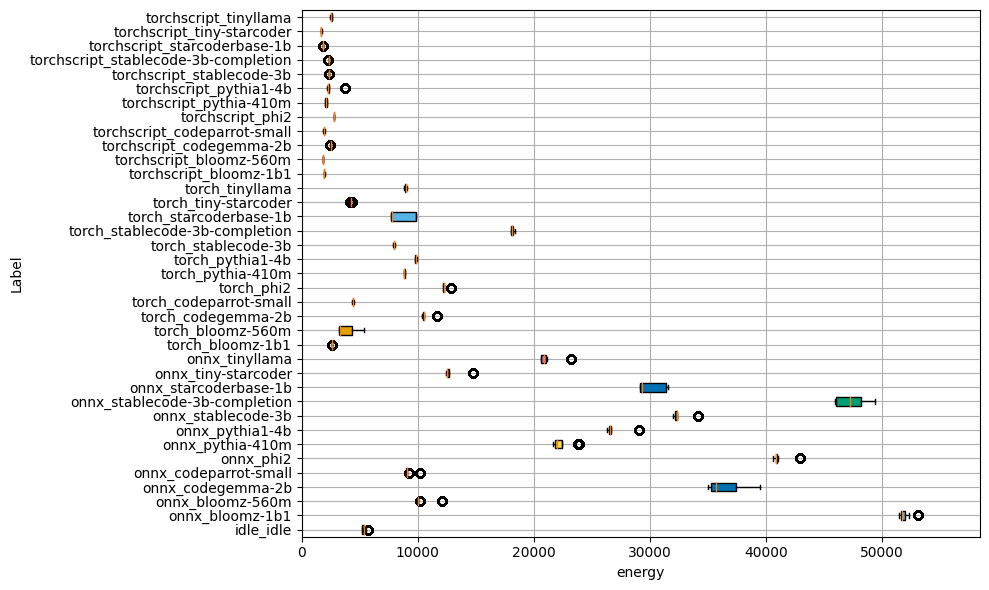

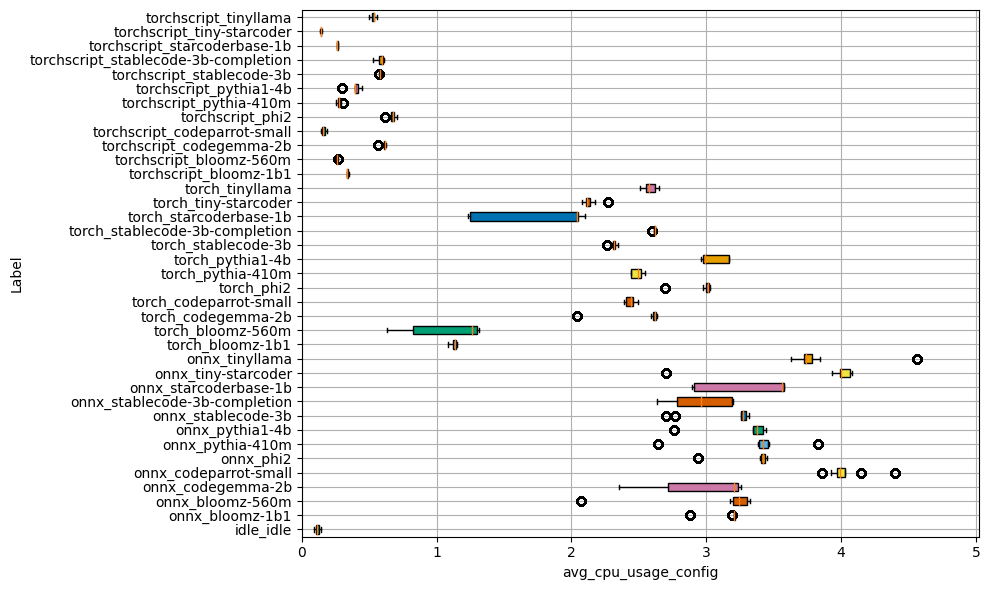

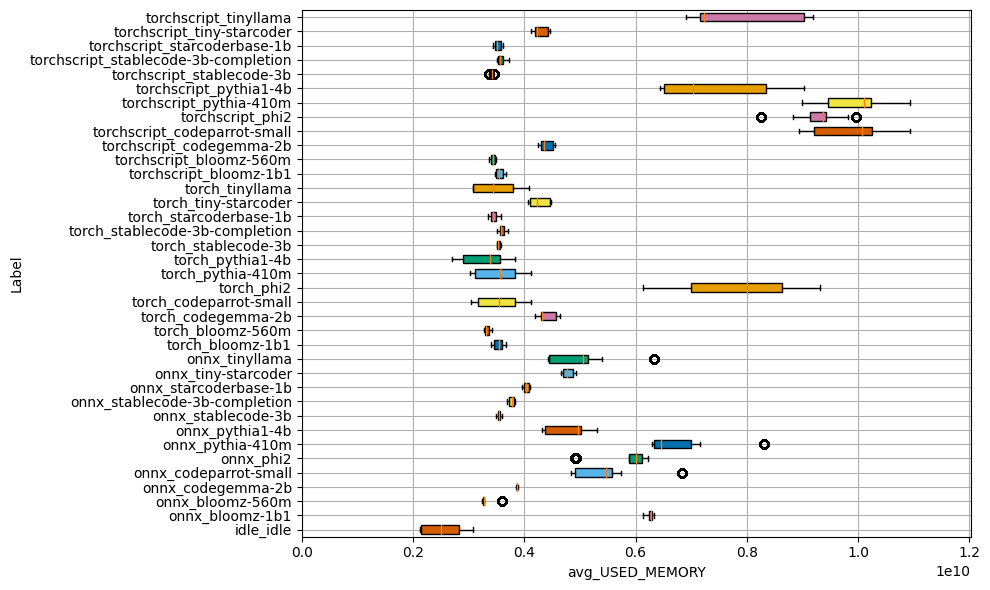

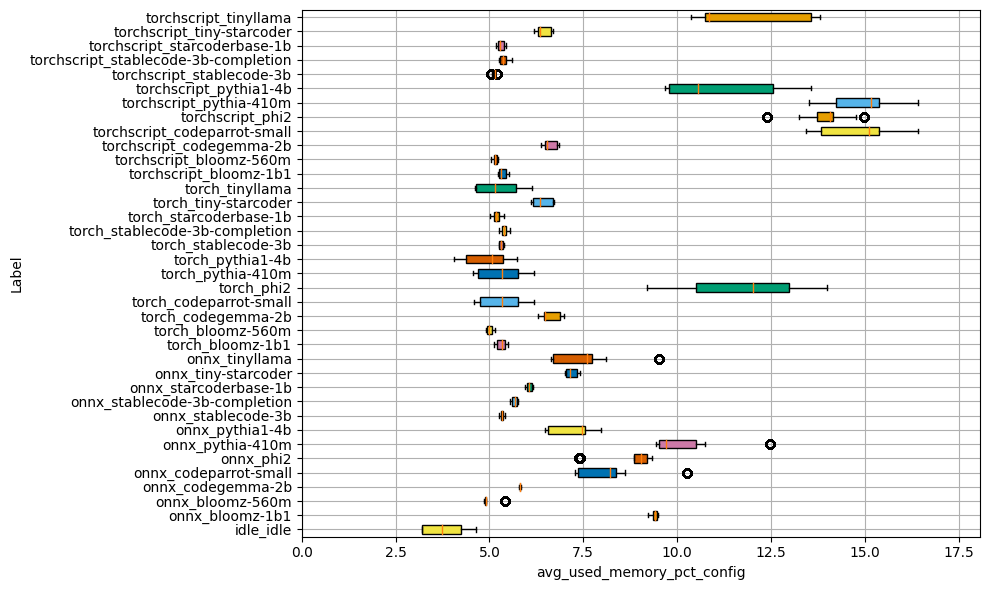

In [29]:


# Assuming combined_df is already created and contains the data
#variables_to_plot = ['diff_CPU_ENERGY (J)', 'avg_diff_CPU_ENERGY (J)', 'avg_TOTAL_MEMORY', 'minus_avg_USED_MEMORY', 'avg_TOTAL_SWAP']

variables_to_plot = [ 'Energy (Energibridge) [J]', "CPU usage (Energibridge) [%]",  'Used memory (Energibridge) [B]',]
variables_to_plot = [ 'energy', "avg_cpu_usage_config",  'avg_USED_MEMORY','avg_used_memory_pct_config']

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]
# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label' : runtime_model
    grouped = energi_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.xlim([0,energi_plot[variable].max()*1.1])
    
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for labels
    #plt.savefig(save_dir+"energi_"+variable)

plt.show()


In [30]:
#energi_df.loc[energi_df['experiment'] == 10] 


### Nvidia

In [31]:
path

'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00/'

In [32]:
# Path where the CSV files are stored
#path = "D:/GAISSA/energy-repo/last_repo/june_gpu_test/"  # Adjust this path to your CSV files location
all_files_nvidia = glob.glob(path + "/results_*/processed/nvidia*_processed_updated.csv") 
all_files_nvidia

['D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_1\\processed\\nvidia_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_10\\processed\\nvidia_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_2\\processed\\nvidia_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_3\\processed\\nvidia_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_4\\processed\\nvidia_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_5\\processed\\nvidia_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_6\\processed\\nvidia_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov

In [33]:
result_numbers = []

li = []
for my_file in all_files_nvidia:
    # The regex pattern to find "results_" followed by one or more digits
    df = pd.read_csv(my_file, index_col=None, header=0)
    
    match = re.search(r'results_(\d+)', my_file)
    if match:
        # Append the found number to the list
        result_numbers.append(int(match.group(1)))

    df['experiment'] = result_numbers[-1]
    li.append(df)

print(result_numbers)
# Combine all data into one DataFrame
nvidia_df = pd.concat(li, axis=0, ignore_index=True)
nvidia_df

[1, 10, 2, 3, 4, 5, 6, 7, 8, 9]


time      runtime                     model  \
0        2024-06-08 21:47:00.468        torch                pythia1-4b   
1        2024-06-08 21:47:00.571        torch                pythia1-4b   
2        2024-06-08 21:47:00.672        torch                pythia1-4b   
3        2024-06-08 21:47:00.773        torch                pythia1-4b   
4        2024-06-08 21:47:00.874        torch                pythia1-4b   
...                          ...          ...                       ...   
1047986  2024-11-17 11:50:06.414  torchscript  stablecode-3b-completion   
1047987  2024-11-17 11:50:06.515  torchscript  stablecode-3b-completion   
1047988  2024-11-17 11:50:06.616  torchscript  stablecode-3b-completion   
1047989  2024-11-17 11:50:06.717  torchscript  stablecode-3b-completion   
1047990  2024-11-17 11:50:06.818  torchscript  stablecode-3b-completion   

          utilization.gpu [%]   utilization.memory [%]   memory.total [MiB]  \
0                           0                        2                24564   
1                           0                        2                24564   
2                           0                        2                24564   
3                           0                        2                24564   
4                           0                        2                24564   
...                       ...                      ...                  ...   
1047986                    11                        8                24564   
1047987                    11                        8                24564   
1047988                     0                        0                24564   
1047989                     0                        0                24564   
1047990                     0                        0                24564   

          memory.used [MiB]   power.draw [W]   power.max_limit [W]  \
0                        65            11.65                 500.0   
1                        65            11.66                 500.0   
2                        65            11.67                 500.0   
3                        65            11.68                 500.0   
4                        65            11.70                 500.0   
...                     ...              ...                   ...   
1047986               21031            71.80                 500.0   
1047987               21031            71.78                 500.0   
1047988               21031            71.83                 500.0   
1047989               21031            71.89                 500.0   
1047990               21031            63.73                 500.0   

          temperature.gpu  ... used_memory_pct_mib  \
0                      37  ...            0.264615   
1                      37  ...            0.264615   
2                      37  ...            0.264615   
3                      37  ...            0.264615   
4                      37  ...            0.264615   
...                   ...  ...                 ...   
1047986                37  ...           85.617163   
1047987                37  ...           85.617163   
1047988                36  ...           85.617163   
1047989                36  ...           85.617163   
1047990                36  ...           85.617163   

         avg_utilization_gpu_config  avg_utilization_memory_config  \
0                         73.584680                      67.165711   
1                         73.584680                      67.165711   
2                         73.584680                      67.165711   
3                         73.584680                      67.165711   
4                         73.584680                      67.165711   
...                             ...                            ...   
1047986                    5.041199                       2.423221   
1047987                    5.041199                       2.423221   
1047988                    5.041199                       

In [34]:
nvidia_df.sort_values(by='time')

time      runtime                     model  \
0       2024-06-08 21:47:00.468        torch                pythia1-4b   
1       2024-06-08 21:47:00.571        torch                pythia1-4b   
2       2024-06-08 21:47:00.672        torch                pythia1-4b   
3       2024-06-08 21:47:00.773        torch                pythia1-4b   
4       2024-06-08 21:47:00.874        torch                pythia1-4b   
...                         ...          ...                       ...   
207215  2024-11-17 12:55:51.696  torchscript  stablecode-3b-completion   
207216  2024-11-17 12:55:51.797  torchscript  stablecode-3b-completion   
207217  2024-11-17 12:55:51.898  torchscript  stablecode-3b-completion   
207218  2024-11-17 12:55:51.999  torchscript  stablecode-3b-completion   
207219  2024-11-17 12:55:52.100  torchscript  stablecode-3b-completion   

         utilization.gpu [%]   utilization.memory [%]   memory.total [MiB]  \
0                          0                        2                24564   
1                          0                        2                24564   
2                          0                        2                24564   
3                          0                        2                24564   
4                          0                        2                24564   
...                      ...                      ...                  ...   
207215                     1                        1                24564   
207216                     1                        1                24564   
207217                     0                        0                24564   
207218                     0                        0                24564   
207219                     0                        0                24564   

         memory.used [MiB]   power.draw [W]   power.max_limit [W]  \
0                       65            11.65                 500.0   
1                       65            11.66                 500.0   
2                       65            11.67                 500.0   
3                       65            11.68                 500.0   
4                       65            11.70                 500.0   
...                    ...              ...                   ...   
207215               21031            72.24                 500.0   
207216               21031            72.27                 500.0   
207217               21031            72.30                 500.0   
207218               21031            72.34                 500.0   
207219               21031            64.11                 500.0   

         temperature.gpu  ... used_memory_pct_mib  avg_utilization_gpu_config  \
0                     37  ...            0.264615                   73.584680   
1                     37  ...            0.264615                   73.584680   
2                     37  ...            0.264615                   73.584680   
3                     37  ...            0.264615                   73.584680   
4                     37  ...            0.264615                   73.584680   
...                  ...  ...                 ...                         ...   
207215                37  ...           85.617163                    5.045966   
207216                37  ...           85.617163                    5.045966   
207217                36  ...           85.617163                    5.045966   
207218                36  ...           85.617163                    5.045966   
207219                36  ...           85.617163                    5.045966   

        avg_utilization_memory_config  avg_memory_used_config  \
0                           67.165711             6061.018760   
1                           67.165711             6061.018760   
2                           67.165711             6061.018760   
3                           67.165711             6061.018760   
4                           67.165711             6061.018760   
...      

In [35]:
# ## add number of experiment

# # List to hold data from each file
# li = []

# # Read each file and append to list
# n=1
# for filename in all_files_nvidia:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df['experiment'] = n
#     li.append(df)
#     n+=1
    

# # Combine all data into one DataFrame
# nvidia_df = pd.concat(li, axis=0, ignore_index=True)
# nvidia_df

In [36]:
nvidia_df.columns

Index(['time', 'runtime', 'model', ' utilization.gpu [%]',
       ' utilization.memory [%]', ' memory.total [MiB]', ' memory.used [MiB]',
       ' power.draw [W]', ' power.max_limit [W]', ' temperature.gpu', 'label',
       'used_memory_pct_mib', 'avg_utilization_gpu_config',
       'avg_utilization_memory_config', 'avg_memory_used_config',
       'avg_power_draw_config', 'avg_temperature_gpu_config',
       'avg_used_memory_pct_mib', 'config_duration', 'energy', 'experiment'],
      dtype='object')

In [37]:
#variables_to_plot = ['diff_CPU_ENERGY (J)','avg_diff_CPU_ENERGY (J)', 'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'minus_avg_USED_MEMORY', 'minus_avg_USED_SWAP',]
# nvidia variables to plot
#variables_to_plot = ['energy','config_duration','avg_ utilization.gpu [%]','avg_ utilization.memory [%]','avg_ memory.used [MiB]' ,'avg_ temperature.gpu']

#variables_to_plot

In [38]:
#condition = nvidia_df['label'].str.endswith('phi2')
#nvidia_plot = remove_condition_rows( condition, nvidia_df)


nvidia_plot =nvidia_df
nvidia_plot

time      runtime                     model  \
0        2024-06-08 21:47:00.468        torch                pythia1-4b   
1        2024-06-08 21:47:00.571        torch                pythia1-4b   
2        2024-06-08 21:47:00.672        torch                pythia1-4b   
3        2024-06-08 21:47:00.773        torch                pythia1-4b   
4        2024-06-08 21:47:00.874        torch                pythia1-4b   
...                          ...          ...                       ...   
1047986  2024-11-17 11:50:06.414  torchscript  stablecode-3b-completion   
1047987  2024-11-17 11:50:06.515  torchscript  stablecode-3b-completion   
1047988  2024-11-17 11:50:06.616  torchscript  stablecode-3b-completion   
1047989  2024-11-17 11:50:06.717  torchscript  stablecode-3b-completion   
1047990  2024-11-17 11:50:06.818  torchscript  stablecode-3b-completion   

          utilization.gpu [%]   utilization.memory [%]   memory.total [MiB]  \
0                           0                        2                24564   
1                           0                        2                24564   
2                           0                        2                24564   
3                           0                        2                24564   
4                           0                        2                24564   
...                       ...                      ...                  ...   
1047986                    11                        8                24564   
1047987                    11                        8                24564   
1047988                     0                        0                24564   
1047989                     0                        0                24564   
1047990                     0                        0                24564   

          memory.used [MiB]   power.draw [W]   power.max_limit [W]  \
0                        65            11.65                 500.0   
1                        65            11.66                 500.0   
2                        65            11.67                 500.0   
3                        65            11.68                 500.0   
4                        65            11.70                 500.0   
...                     ...              ...                   ...   
1047986               21031            71.80                 500.0   
1047987               21031            71.78                 500.0   
1047988               21031            71.83                 500.0   
1047989               21031            71.89                 500.0   
1047990               21031            63.73                 500.0   

          temperature.gpu  ... used_memory_pct_mib  \
0                      37  ...            0.264615   
1                      37  ...            0.264615   
2                      37  ...            0.264615   
3                      37  ...            0.264615   
4                      37  ...            0.264615   
...                   ...  ...                 ...   
1047986                37  ...           85.617163   
1047987                37  ...           85.617163   
1047988                36  ...           85.617163   
1047989                36  ...           85.617163   
1047990                36  ...           85.617163   

         avg_utilization_gpu_config  avg_utilization_memory_config  \
0                         73.584680                      67.165711   
1                         73.584680                      67.165711   
2                         73.584680                      67.165711   
3                         73.584680                      67.165711   
4                         73.584680                      67.165711   
...                             ...                            ...   
1047986                    5.041199                       2.423221   
1047987                    5.041199                       2.423221   
1047988                    5.041199                       

In [39]:
#condition = nvidia_plot['label'].str.endswith('idle')

#nvidia_plot = remove_condition_rows( condition, nvidia_plot)
#nvidia_plot


In [40]:
# #variables_to_plot = ['energy','config_duration','avg_ utilization.gpu [%]','avg_ utilization.memory [%]','avg_ memory.used [MiB]' ,'avg_ temperature.gpu']

# nvidia_plot.rename(columns={'energy': 'Energy (Nvidia-smi) [J]'}, inplace=True)
# nvidia_plot.rename(columns={'config_duration': 'Execution time (Nvidia-smi) [s]'}, inplace=True)
# nvidia_plot.rename(columns={'avg_ utilization.gpu [%]': 'GPU usage (Nvidia-smi) [%]'}, inplace=True)
# nvidia_plot.rename(columns={'avg_ utilization.memory [%]': 'Used memory (Nvidia-smi) [%]'}, inplace=True)
# nvidia_plot.rename(columns={'avg_ memory.used [MiB]': 'Used GPU memory (Nvidia-smi) [MiB]'}, inplace=True)
# nvidia_plot.rename(columns={'avg_ temperature.gpu': 'GPU temperature (Nvidia-smi) [°]'}, inplace=True)

# variables_to_plot = ['Energy (Nvidia-smi) [J]','Execution time (Nvidia-smi) [s]','GPU usage (Nvidia-smi) [%]','Used memory (Nvidia-smi) [%]','Used GPU memory (Nvidia-smi) [MiB]' ,'GPU temperature (Nvidia-smi) [°]']


In [42]:
print(len(nvidia_plot['model'].unique()))
nvidia_plot['model'].unique()

12


array(['pythia1-4b', 'tinyllama', 'codeparrot-small', 'pythia-410m',
       'phi2', 'codegemma-2b', 'tiny-starcoder', 'bloomz-560m',
       'stablecode-3b', 'starcoderbase-1b', 'bloomz-1b1',
       'stablecode-3b-completion'], dtype=object)

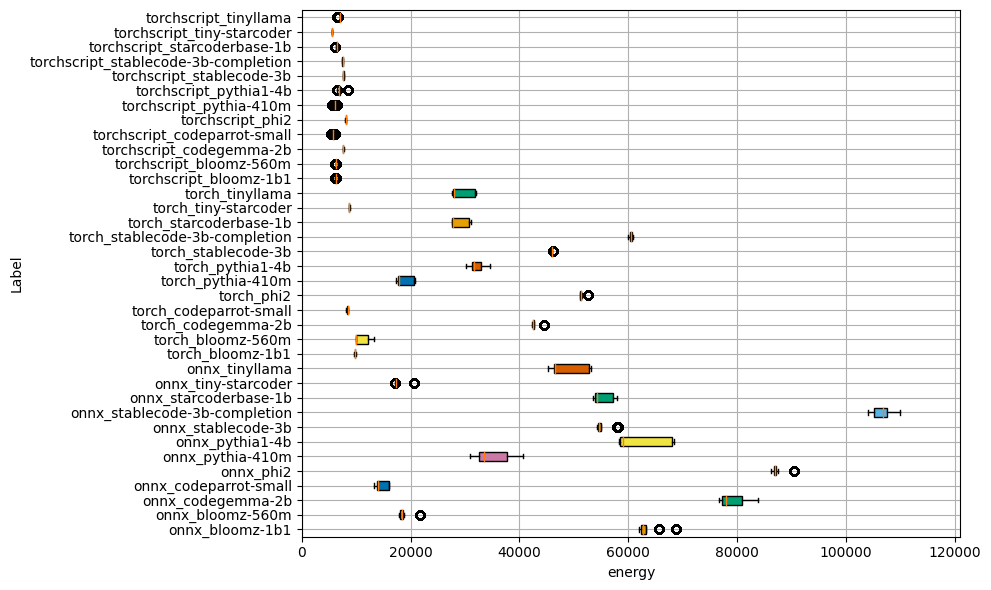

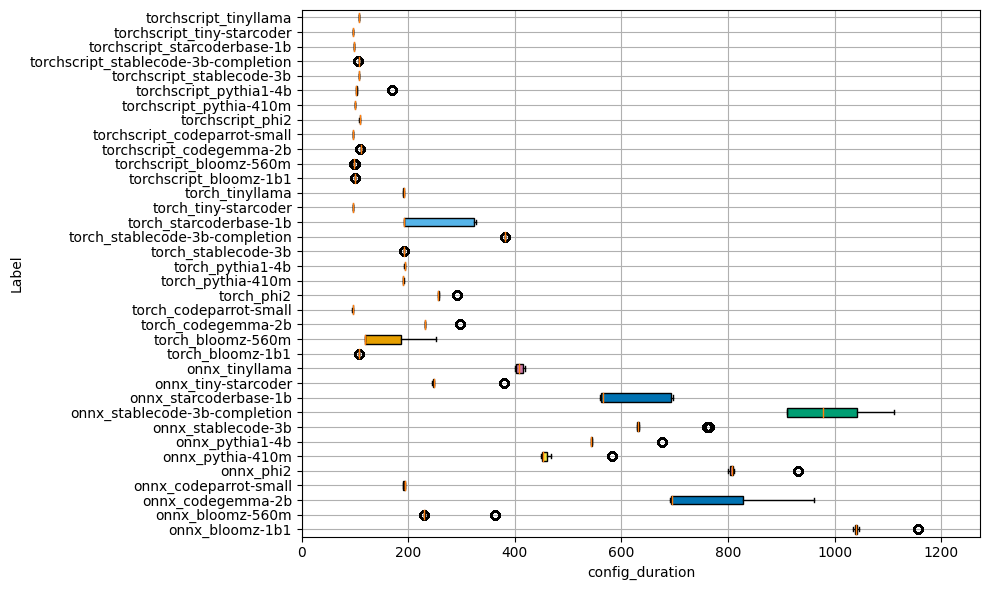

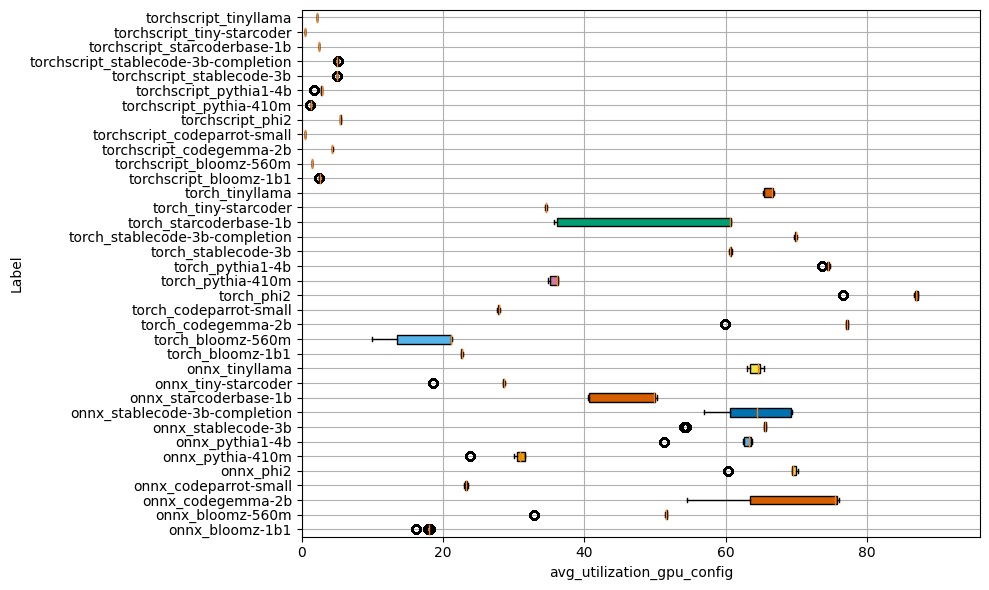

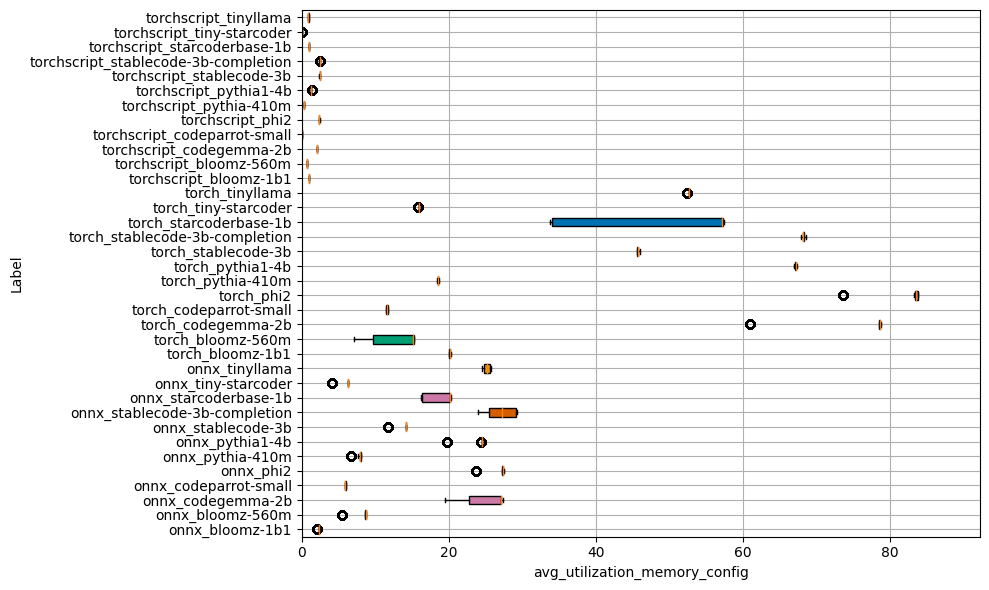

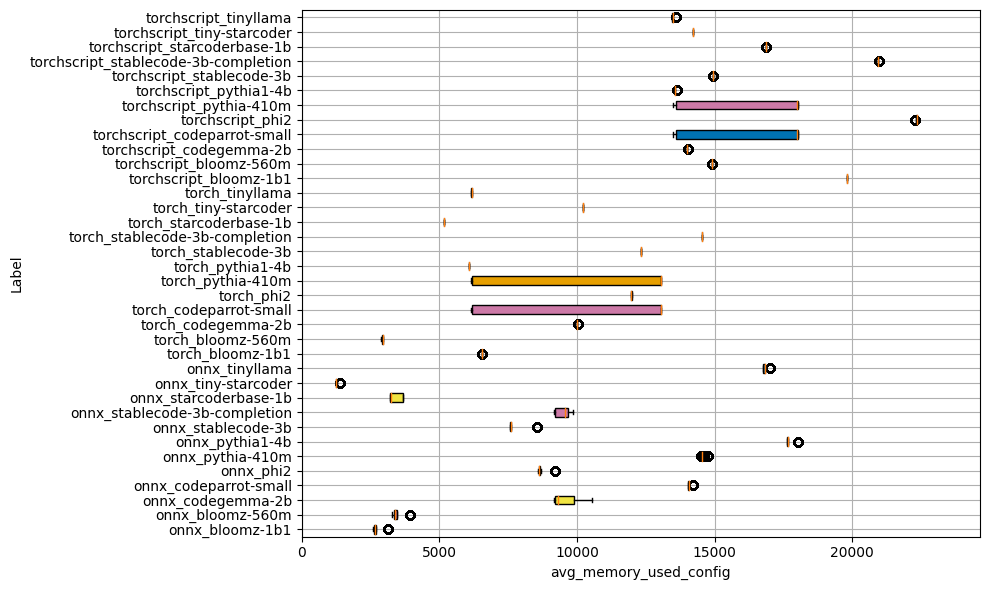

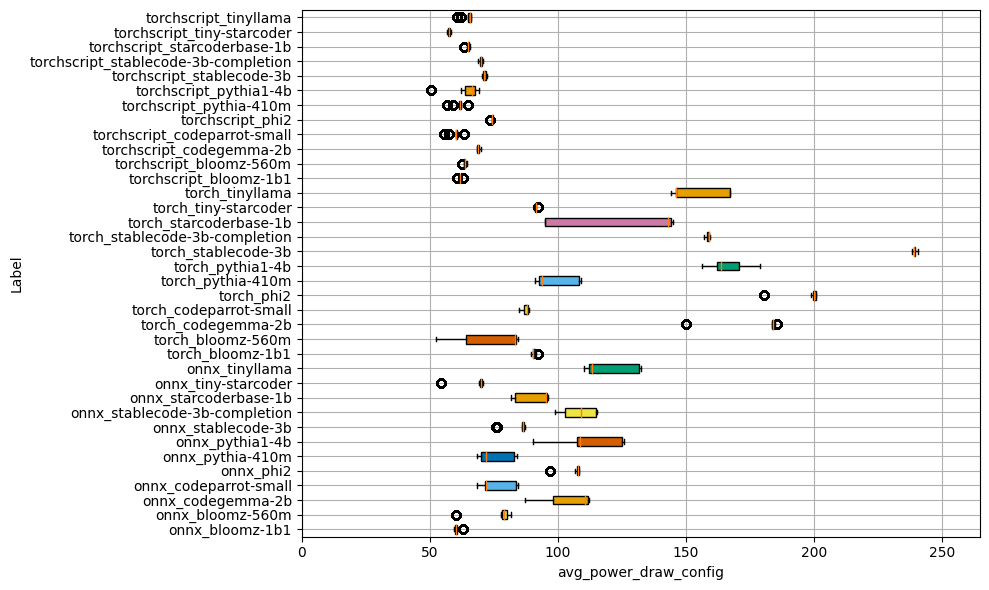

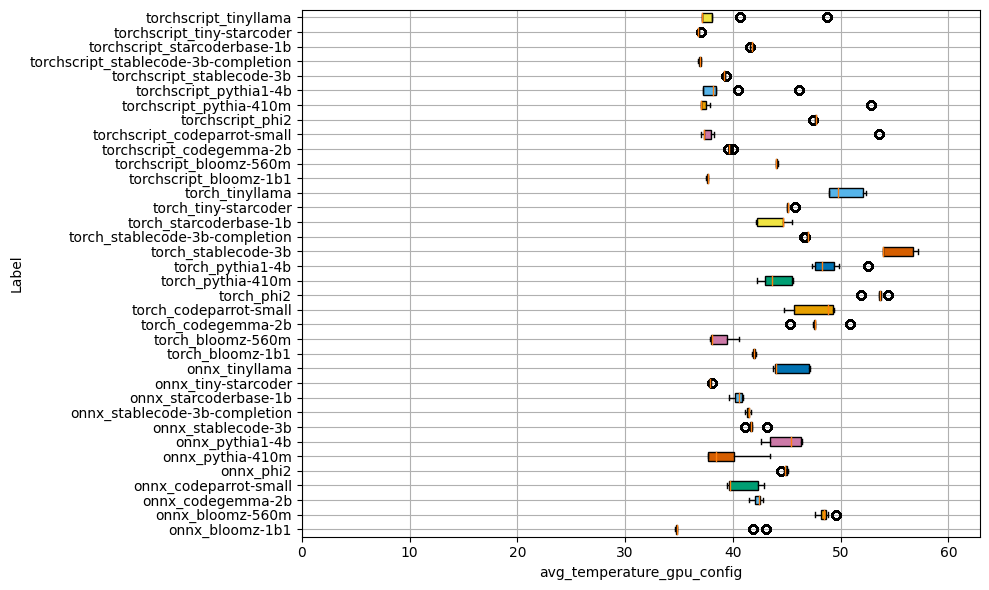

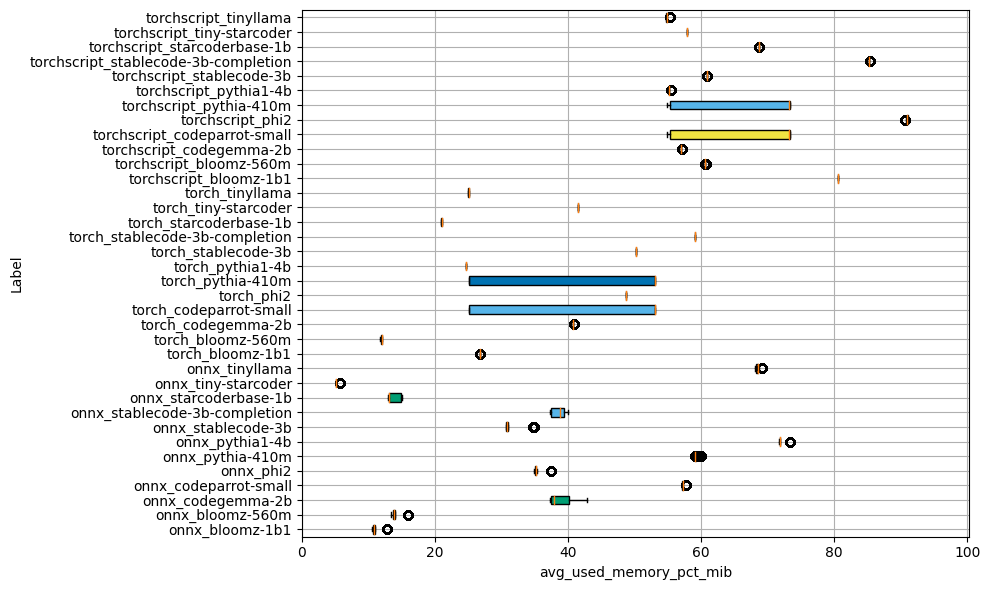

In [43]:

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

#variables_to_plot = ['energy','config_duration','avg_ utilization.gpu [%]','avg_ utilization.memory [%]','avg_ memory.used [MiB]' ,'avg_ temperature.gpu']
#variables_to_plot = ['Energy (Nvidia-smi) [J]','Execution time (Nvidia-smi) [s]','GPU usage (Nvidia-smi) [%]','Used memory (Nvidia-smi) [%]','Used GPU memory (Nvidia-smi) [MiB]' ,'GPU temperature (Nvidia-smi) [°]']
variables_to_plot = ['energy','config_duration','avg_utilization_gpu_config','avg_utilization_memory_config','avg_memory_used_config' ,
                     'avg_power_draw_config','avg_temperature_gpu_config','avg_used_memory_pct_mib']



n=0
# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = nvidia_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')

    plt.xlim([0,nvidia_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    
    #plt.savefig(save_dir + "nvidia_"+variable)
    n+=1
plt.show()


### Wattmeter

In [44]:
# Path where the CSV files are stored
#path = "D:/GAISSA/energy-repo/last_repo/june_gpu_test/"  # Adjust this path to your CSV files location
all_files_wattmeter = glob.glob(path + "/results_*/processed/wattmeter*_processed_updated.csv")
all_files_wattmeter

['D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_1\\processed\\wattmeter_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_10\\processed\\wattmeter_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_2\\processed\\wattmeter_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_3\\processed\\wattmeter_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_4\\processed\\wattmeter_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_5\\processed\\wattmeter_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_6\\processed\\wattmeter_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/c

In [45]:
result_numbers = []

li = []
for my_file in all_files_wattmeter:
    # The regex pattern to find "results_" followed by one or more digits
    df = pd.read_csv(my_file, index_col=None, header=0)
    
    match = re.search(r'results_(\d+)', my_file)
    if match:
        # Append the found number to the list
        result_numbers.append(int(match.group(1)))

    df['experiment'] = result_numbers[-1]
    li.append(df)

print(result_numbers)
# Combine all data into one DataFrame
wattmeter_df = pd.concat(li, axis=0, ignore_index=True)
wattmeter_df

[1, 10, 2, 3, 4, 5, 6, 7, 8, 9]


time      runtime                     model  \
0       2024-06-08 21:47:02.854518        torch                pythia1-4b   
1       2024-06-08 21:47:03.429127        torch                pythia1-4b   
2       2024-06-08 21:47:04.017249        torch                pythia1-4b   
3       2024-06-08 21:47:04.591239        torch                pythia1-4b   
4       2024-06-08 21:47:05.163254        torch                pythia1-4b   
...                            ...          ...                       ...   
102895  2024-11-17 11:50:03.911707  torchscript  stablecode-3b-completion   
102896  2024-11-17 11:50:04.493735  torchscript  stablecode-3b-completion   
102897  2024-11-17 11:50:05.075938  torchscript  stablecode-3b-completion   
102898  2024-11-17 11:50:05.659016  torchscript  stablecode-3b-completion   
102899  2024-11-17 11:50:06.235919  torchscript  stablecode-3b-completion   

        Current  PowerFactor   Phase  Energy  EnergyNR  Load  \
0           717         1.00  336.26  120086    120086   174   
1           717         1.00  336.26  120086    120086   174   
2           812         0.91  335.38  120086    120086   176   
3           812         0.91  335.38  120086    120086   176   
4           812         0.91  335.38  120086    120086   176   
...         ...          ...     ...     ...       ...   ...   
102895      631         0.85  324.45  425445    425445   129   
102896      631         0.85  324.45  425445    425445   129   
102897      917         0.83  284.30  425445    425445   183   
102898      917         0.83  284.30  425445    425445   183   
102899      796         0.66  325.02  425445    425445   126   

                                       label  energy_joules  energyNR_joules  \
0                           torch_pythia1-4b      432309600        432309600   
1                           torch_pythia1-4b      432309600        432309600   
2                           torch_pythia1-4b      432309600        432309600   
3                           torch_pythia1-4b      432309600        432309600   
4                           torch_pythia1-4b      432309600        432309600   
...                                      ...            ...              ...   
102895  torchscript_stablecode-3b-completion     1531602000       1531602000   
102896  torchscript_stablecode-3b-completion     1531602000       1531602000   
102897  torchscript_stablecode-3b-completion     1531602000       1531602000   
102898  torchscript_stablecode-3b-completion     1531602000       1531602000   
102899  torchscript_stablecode-3b-completion     1531602000       1531602000   

        energy_joules_config  energyNR_joules_config  avg_Current  \
0                      54000                   54000  1278.477341   
1                      54000                   54000  1278.477341   
2                      54000                   54000  1278.477341   
3                      54000                   54000  1278.477341   
4                      54000                   54000  1278.477341   
...                      ...                     ...          ...   
102895                 14400                   14400   721.461988   
102896                 14400                   14400   721.461988   
102897                 14400                   14400   721.461988   
102898                 14400                   14400   721.461988   
102899                 14400                   14400   721.461988   

        avg_PowerFactor   avg_Phase    avg_Load  experiment  
0              0.931662  343.706465  284.371601           1  
1              0.931662  343.706465  284.371601           1  
2              0.931662  343.706465  284.371601           1  
3              0.931662  343.706465  284.371601           1  
4              0.931662  343.706465  284.371601           1  
...                 ...         ...         ...         ...  
102895         0.772339  323.596433  135.538012           9  
102896         0.772339  323.596433  135.538012   

In [46]:

# ## add experiments number
# # List to hold data from each file
# li = []

# # Read each file and append to list
# n=1
# for filename in all_files_wattmeter:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df['experiment'] = n
#     li.append(df)
#     n+=1
    

# # Combine all data into one DataFrame
# wattmeter_df = pd.concat(li, axis=0, ignore_index=True)
# wattmeter_df

In [47]:
wattmeter_df.columns

Index(['time', 'runtime', 'model', 'Current', 'PowerFactor', 'Phase', 'Energy',
       'EnergyNR', 'Load', 'label', 'energy_joules', 'energyNR_joules',
       'energy_joules_config', 'energyNR_joules_config', 'avg_Current',
       'avg_PowerFactor', 'avg_Phase', 'avg_Load', 'experiment'],
      dtype='object')

In [48]:
variables_to_plot = ['energy_joules_config', 'avg_Current', 'avg_PowerFactor', 'avg_Phase', 'avg_Load',]

In [49]:
#condition = wattmeter_df['label'].str.endswith('phi2')
#wattmeter_plot = remove_condition_rows( condition, wattmeter_df)
wattmeter_plot = wattmeter_df
wattmeter_plot

time      runtime                     model  \
0       2024-06-08 21:47:02.854518        torch                pythia1-4b   
1       2024-06-08 21:47:03.429127        torch                pythia1-4b   
2       2024-06-08 21:47:04.017249        torch                pythia1-4b   
3       2024-06-08 21:47:04.591239        torch                pythia1-4b   
4       2024-06-08 21:47:05.163254        torch                pythia1-4b   
...                            ...          ...                       ...   
102895  2024-11-17 11:50:03.911707  torchscript  stablecode-3b-completion   
102896  2024-11-17 11:50:04.493735  torchscript  stablecode-3b-completion   
102897  2024-11-17 11:50:05.075938  torchscript  stablecode-3b-completion   
102898  2024-11-17 11:50:05.659016  torchscript  stablecode-3b-completion   
102899  2024-11-17 11:50:06.235919  torchscript  stablecode-3b-completion   

        Current  PowerFactor   Phase  Energy  EnergyNR  Load  \
0           717         1.00  336.26  120086    120086   174   
1           717         1.00  336.26  120086    120086   174   
2           812         0.91  335.38  120086    120086   176   
3           812         0.91  335.38  120086    120086   176   
4           812         0.91  335.38  120086    120086   176   
...         ...          ...     ...     ...       ...   ...   
102895      631         0.85  324.45  425445    425445   129   
102896      631         0.85  324.45  425445    425445   129   
102897      917         0.83  284.30  425445    425445   183   
102898      917         0.83  284.30  425445    425445   183   
102899      796         0.66  325.02  425445    425445   126   

                                       label  energy_joules  energyNR_joules  \
0                           torch_pythia1-4b      432309600        432309600   
1                           torch_pythia1-4b      432309600        432309600   
2                           torch_pythia1-4b      432309600        432309600   
3                           torch_pythia1-4b      432309600        432309600   
4                           torch_pythia1-4b      432309600        432309600   
...                                      ...            ...              ...   
102895  torchscript_stablecode-3b-completion     1531602000       1531602000   
102896  torchscript_stablecode-3b-completion     1531602000       1531602000   
102897  torchscript_stablecode-3b-completion     1531602000       1531602000   
102898  torchscript_stablecode-3b-completion     1531602000       1531602000   
102899  torchscript_stablecode-3b-completion     1531602000       1531602000   

        energy_joules_config  energyNR_joules_config  avg_Current  \
0                      54000                   54000  1278.477341   
1                      54000                   54000  1278.477341   
2                      54000                   54000  1278.477341   
3                      54000                   54000  1278.477341   
4                      54000                   54000  1278.477341   
...                      ...                     ...          ...   
102895                 14400                   14400   721.461988   
102896                 14400                   14400   721.461988   
102897                 14400                   14400   721.461988   
102898                 14400                   14400   721.461988   
102899                 14400                   14400   721.461988   

        avg_PowerFactor   avg_Phase    avg_Load  experiment  
0              0.931662  343.706465  284.371601           1  
1              0.931662  343.706465  284.371601           1  
2              0.931662  343.706465  284.371601           1  
3              0.931662  343.706465  284.371601           1  
4              0.931662  343.706465  284.371601           1  
...                 ...         ...         ...         ...  
102895         0.772339  323.596433  135.538012           9  
102896         0.772339  323.596433  135.538012   

In [50]:
#condition = wattmeter_plot['label'].str.endswith('idle')

#wattmeter_plot = remove_condition_rows( condition, wattmeter_plot)
#wattmeter_plot


In [51]:

# wattmeter_plot.rename(columns={'energy_joules_config': 'Energy (Wattmeter) [J]'}, inplace=True)
# wattmeter_plot.rename(columns={'avg_Current': 'Current [mA]'}, inplace=True)
# wattmeter_plot.rename(columns={'avg_PowerFactor': 'Power Factor [-]'}, inplace=True)
# wattmeter_plot.rename(columns={'avg_Phase': 'Phase [°]'}, inplace=True)
# wattmeter_plot.rename(columns={'avg_Load': 'Load [W]'}, inplace=True)

# variables_to_plot = ['Energy (Wattmeter) [J]','Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]']


In [52]:
wattmeter_plot['model'].unique()

array(['pythia1-4b', 'tinyllama', 'codeparrot-small', 'pythia-410m',
       'phi2', 'codegemma-2b', 'tiny-starcoder', 'bloomz-560m',
       'stablecode-3b', 'starcoderbase-1b', 'bloomz-1b1',
       'stablecode-3b-completion'], dtype=object)

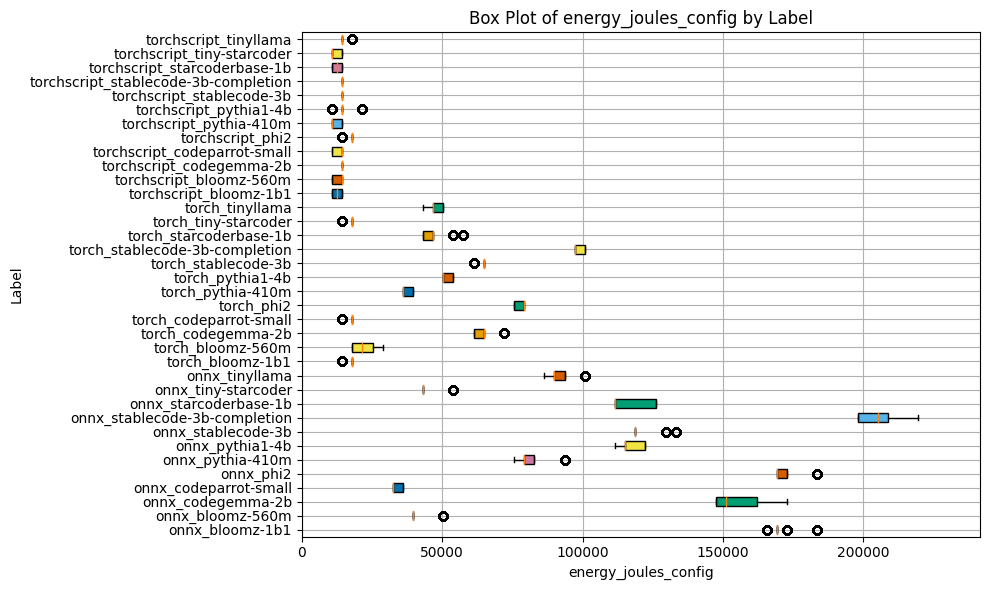

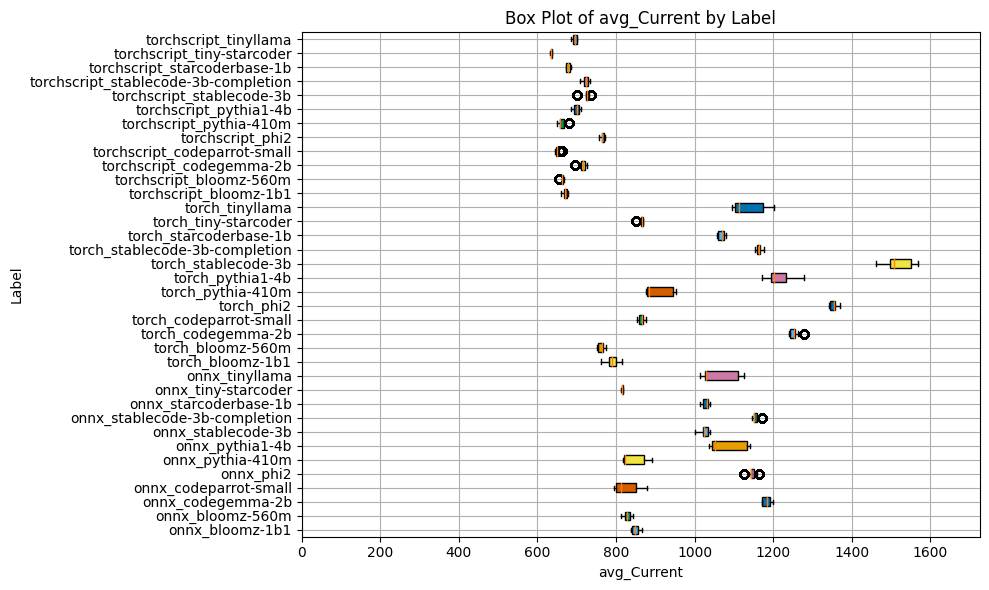

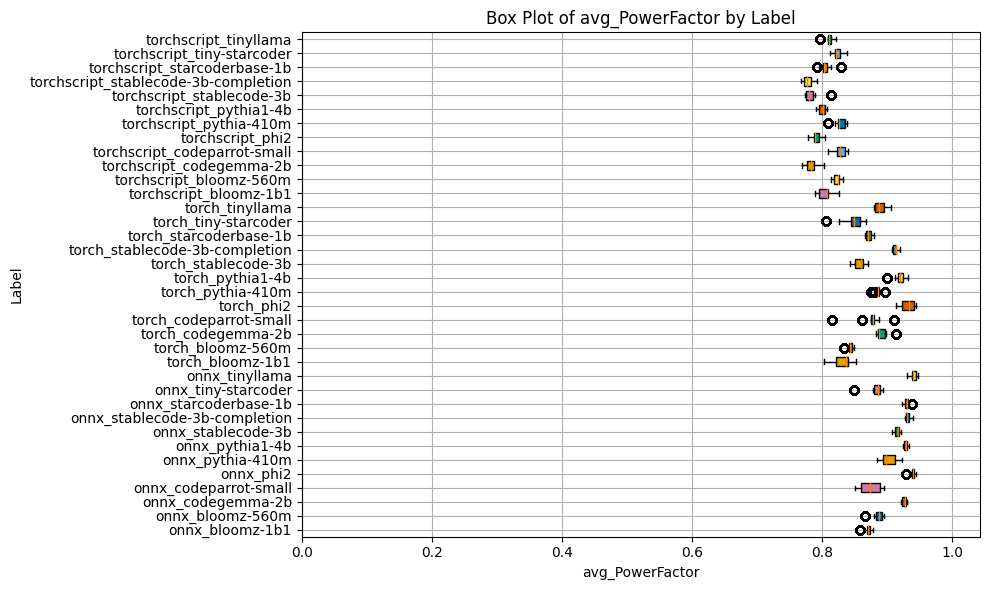

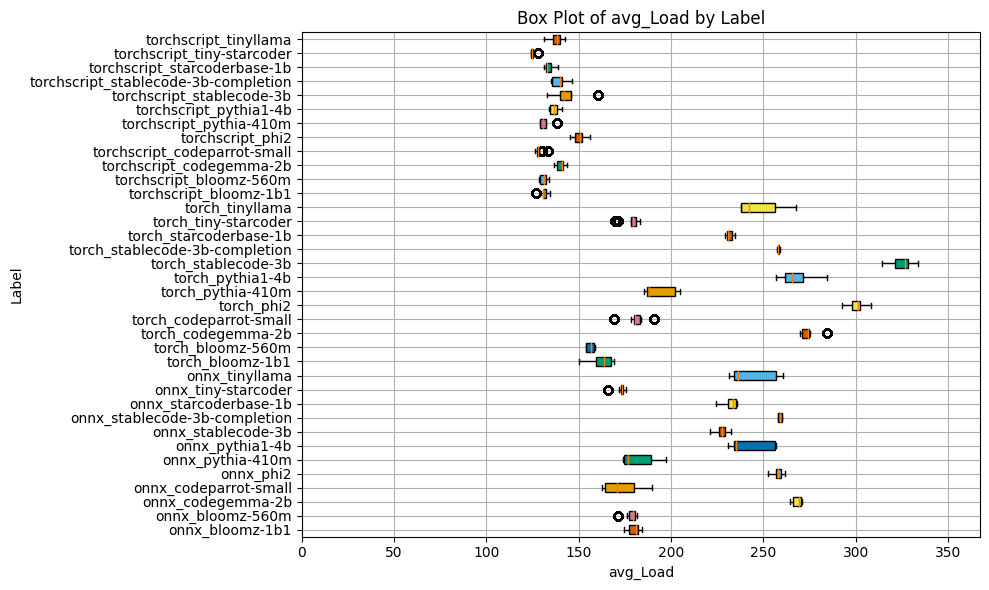

In [53]:
# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

#variables_to_plot = ['Energy (Wattmeter) [J]','Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]']
variables_to_plot = ['energy_joules_config','avg_Current','avg_PowerFactor','avg_Phase' ,'avg_Load']



# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = wattmeter_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.xlim([0,wattmeter_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    #plt.savefig(save_dir + "wattmeter_"+variable)

plt.show()


## RQ CPU energy + GPU energy

In [54]:
print(energi_df['energy'].max())
print(nvidia_df['energy'].max())
print(wattmeter_df['energy_joules_config'].max())


53158.4057922326
110036.12324967464
219600


### box plots

In [55]:
energi_df.columns

Index(['time', 'runtime', 'model', 'CPU_ENERGY (J)', 'TOTAL_MEMORY',
       'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP', 'AVG_CPU_USAGE_SAMP', 'label',
       'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'avg_USED_MEMORY',
       'avg_USED_SWAP', 'avg_cpu_usage_config', 'energy',
       'avg_used_memory_pct_config', 'experiment'],
      dtype='object')

In [56]:
energy_energi = energi_df[['runtime','model','label','energy','experiment']]
energy_energi

runtime                     model  \
0              idle                      idle   
1              idle                      idle   
2              idle                      idle   
3              idle                      idle   
4              idle                      idle   
...             ...                       ...   
542672  torchscript  stablecode-3b-completion   
542673  torchscript  stablecode-3b-completion   
542674  torchscript  stablecode-3b-completion   
542675  torchscript  stablecode-3b-completion   
542676  torchscript  stablecode-3b-completion   

                                       label       energy  experiment  
0                                  idle_idle  5356.125122           1  
1                                  idle_idle  5356.125122           1  
2                                  idle_idle  5356.125122           1  
3                                  idle_idle  5356.125122           1  
4                                  idle_idle  5356.125122           1  
...                                      ...          ...         ...  
542672  torchscript_stablecode-3b-completion  2380.746414           9  
542673  torchscript_stablecode-3b-completion  2380.746414           9  
542674  torchscript_stablecode-3b-completion  2380.746414           9  
542675  torchscript_stablecode-3b-completion  2380.746414           9  
542676  torchscript_stablecode-3b-completion  2380.746414           9  

[542677 rows x 5 columns]

In [57]:
nvidia_df.columns

Index(['time', 'runtime', 'model', ' utilization.gpu [%]',
       ' utilization.memory [%]', ' memory.total [MiB]', ' memory.used [MiB]',
       ' power.draw [W]', ' power.max_limit [W]', ' temperature.gpu', 'label',
       'used_memory_pct_mib', 'avg_utilization_gpu_config',
       'avg_utilization_memory_config', 'avg_memory_used_config',
       'avg_power_draw_config', 'avg_temperature_gpu_config',
       'avg_used_memory_pct_mib', 'config_duration', 'energy', 'experiment'],
      dtype='object')

In [58]:
energy_nvidia = nvidia_df[['runtime','model','label','energy','experiment']]
energy_nvidia

runtime                     model  \
0              torch                pythia1-4b   
1              torch                pythia1-4b   
2              torch                pythia1-4b   
3              torch                pythia1-4b   
4              torch                pythia1-4b   
...              ...                       ...   
1047986  torchscript  stablecode-3b-completion   
1047987  torchscript  stablecode-3b-completion   
1047988  torchscript  stablecode-3b-completion   
1047989  torchscript  stablecode-3b-completion   
1047990  torchscript  stablecode-3b-completion   

                                        label        energy  experiment  
0                            torch_pythia1-4b  34523.835300           1  
1                            torch_pythia1-4b  34523.835300           1  
2                            torch_pythia1-4b  34523.835300           1  
3                            torch_pythia1-4b  34523.835300           1  
4                            torch_pythia1-4b  34523.835300           1  
...                                       ...           ...         ...  
1047986  torchscript_stablecode-3b-completion   7505.320112           9  
1047987  torchscript_stablecode-3b-completion   7505.320112           9  
1047988  torchscript_stablecode-3b-completion   7505.320112           9  
1047989  torchscript_stablecode-3b-completion   7505.320112           9  
1047990  torchscript_stablecode-3b-completion   7505.320112           9  

[1047991 rows x 5 columns]

In [59]:
cpu_aggregated = energy_energi.groupby(['label', 'experiment'])['energy'].mean().reset_index()
cpu_aggregated

label  experiment       energy
0                idle_idle           1  5356.125122
1                idle_idle           2  5350.155334
2                idle_idle           3  5174.852402
3                idle_idle           4  5180.039169
4                idle_idle           5  5366.871078
..                     ...         ...          ...
365  torchscript_tinyllama           6  2479.216080
366  torchscript_tinyllama           7  2528.263107
367  torchscript_tinyllama           8  2645.645905
368  torchscript_tinyllama           9  2569.570862
369  torchscript_tinyllama          10  2589.686050

[370 rows x 3 columns]

In [60]:
gpu_aggregated = energy_nvidia.groupby(['label', 'experiment'])['energy'].mean().reset_index()
gpu_aggregated

label  experiment        energy
0          onnx_bloomz-1b1           1  63300.294413
1          onnx_bloomz-1b1           2  62017.653804
2          onnx_bloomz-1b1           3  68834.425106
3          onnx_bloomz-1b1           4  62796.110431
4          onnx_bloomz-1b1           5  62488.160651
..                     ...         ...           ...
355  torchscript_tinyllama           6   7022.551625
356  torchscript_tinyllama           7   7052.688061
357  torchscript_tinyllama           8   6716.034659
358  torchscript_tinyllama           9   7063.159418
359  torchscript_tinyllama          10   6554.013410

[360 rows x 3 columns]

In [61]:
# Merge the aggregated dataframes
merged_df = pd.merge(cpu_aggregated, gpu_aggregated, on=['label', 'experiment'], how='outer')
merged_df

label  experiment     energy_x     energy_y
0                idle_idle           1  5356.125122          NaN
1                idle_idle           2  5350.155334          NaN
2                idle_idle           3  5174.852402          NaN
3                idle_idle           4  5180.039169          NaN
4                idle_idle           5  5366.871078          NaN
..                     ...         ...          ...          ...
365  torchscript_tinyllama           6  2479.216080  7022.551625
366  torchscript_tinyllama           7  2528.263107  7052.688061
367  torchscript_tinyllama           8  2645.645905  6716.034659
368  torchscript_tinyllama           9  2569.570862  7063.159418
369  torchscript_tinyllama          10  2589.686050  6554.013410

[370 rows x 4 columns]

In [62]:
merged_df['label'].unique()

array(['idle_idle', 'onnx_bloomz-1b1', 'onnx_bloomz-560m',
       'onnx_codegemma-2b', 'onnx_codeparrot-small', 'onnx_phi2',
       'onnx_pythia-410m', 'onnx_pythia1-4b', 'onnx_stablecode-3b',
       'onnx_stablecode-3b-completion', 'onnx_starcoderbase-1b',
       'onnx_tiny-starcoder', 'onnx_tinyllama', 'torch_bloomz-1b1',
       'torch_bloomz-560m', 'torch_codegemma-2b',
       'torch_codeparrot-small', 'torch_phi2', 'torch_pythia-410m',
       'torch_pythia1-4b', 'torch_stablecode-3b',
       'torch_stablecode-3b-completion', 'torch_starcoderbase-1b',
       'torch_tiny-starcoder', 'torch_tinyllama',
       'torchscript_bloomz-1b1', 'torchscript_bloomz-560m',
       'torchscript_codegemma-2b', 'torchscript_codeparrot-small',
       'torchscript_phi2', 'torchscript_pythia-410m',
       'torchscript_pythia1-4b', 'torchscript_stablecode-3b',
       'torchscript_stablecode-3b-completion',
       'torchscript_starcoderbase-1b', 'torchscript_tiny-starcoder',
       'torchscript_tinyllama'

In [63]:
merged_df.fillna(0, inplace=True)
merged_df

label  experiment     energy_x     energy_y
0                idle_idle           1  5356.125122     0.000000
1                idle_idle           2  5350.155334     0.000000
2                idle_idle           3  5174.852402     0.000000
3                idle_idle           4  5180.039169     0.000000
4                idle_idle           5  5366.871078     0.000000
..                     ...         ...          ...          ...
365  torchscript_tinyllama           6  2479.216080  7022.551625
366  torchscript_tinyllama           7  2528.263107  7052.688061
367  torchscript_tinyllama           8  2645.645905  6716.034659
368  torchscript_tinyllama           9  2569.570862  7063.159418
369  torchscript_tinyllama          10  2589.686050  6554.013410

[370 rows x 4 columns]

In [64]:
#merged_df.loc[merged_df['label'] == 'idle_idle'] 

In [65]:

#merged_df.loc[merged_df['label'] == 'onnx_tinyllama'] 

In [66]:
path

'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00/'

In [67]:
# merged_df.rename(columns={'energy_x': 'CPU energy (config) [J]'}, inplace=True)
# merged_df.rename(columns={'energy_y': 'GPU energy (config) [J]'}, inplace=True)
# merged_df['Total energy [J]'] = merged_df['CPU energy (config) [J]'] + merged_df['GPU energy (config) [J]'] 
merged_df.rename(columns={'energy_x': 'CPU_energy'}, inplace=True)
merged_df.rename(columns={'energy_y': 'GPU_energy'}, inplace=True)
merged_df['global_energy'] = merged_df['CPU_energy'] + merged_df['GPU_energy'] 
merged_df

label  experiment   CPU_energy   GPU_energy  \
0                idle_idle           1  5356.125122     0.000000   
1                idle_idle           2  5350.155334     0.000000   
2                idle_idle           3  5174.852402     0.000000   
3                idle_idle           4  5180.039169     0.000000   
4                idle_idle           5  5366.871078     0.000000   
..                     ...         ...          ...          ...   
365  torchscript_tinyllama           6  2479.216080  7022.551625   
366  torchscript_tinyllama           7  2528.263107  7052.688061   
367  torchscript_tinyllama           8  2645.645905  6716.034659   
368  torchscript_tinyllama           9  2569.570862  7063.159418   
369  torchscript_tinyllama          10  2589.686050  6554.013410   

     global_energy  
0      5356.125122  
1      5350.155334  
2      5174.852402  
3      5180.039169  
4      5366.871078  
..             ...  
365    9501.767705  
366    9580.951168  
367    9361.680564  
368    9632.730280  
369    9143.699460  

[370 rows x 5 columns]

In [68]:
#condition = merged_df['label'].str.endswith('phi2')

#merged_df_plot = remove_condition_rows( condition, merged_df)
merged_df_plot = merged_df
merged_df

label  experiment   CPU_energy   GPU_energy  \
0                idle_idle           1  5356.125122     0.000000   
1                idle_idle           2  5350.155334     0.000000   
2                idle_idle           3  5174.852402     0.000000   
3                idle_idle           4  5180.039169     0.000000   
4                idle_idle           5  5366.871078     0.000000   
..                     ...         ...          ...          ...   
365  torchscript_tinyllama           6  2479.216080  7022.551625   
366  torchscript_tinyllama           7  2528.263107  7052.688061   
367  torchscript_tinyllama           8  2645.645905  6716.034659   
368  torchscript_tinyllama           9  2569.570862  7063.159418   
369  torchscript_tinyllama          10  2589.686050  6554.013410   

     global_energy  
0      5356.125122  
1      5350.155334  
2      5174.852402  
3      5180.039169  
4      5366.871078  
..             ...  
365    9501.767705  
366    9580.951168  
367    9361.680564  
368    9632.730280  
369    9143.699460  

[370 rows x 5 columns]

In [69]:
print(tables_dir)
if SAVE_TABLES:
    print(f"saved in {tables_dir+'final_energy_data.csv'}")
    merged_df_plot.to_csv(tables_dir+'final_energy_data.csv', index=False)

D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00/tables_nov/
saved in D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00/tables_nov/final_energy_data.csv


In [70]:
merged_df_plot

label  experiment   CPU_energy   GPU_energy  \
0                idle_idle           1  5356.125122     0.000000   
1                idle_idle           2  5350.155334     0.000000   
2                idle_idle           3  5174.852402     0.000000   
3                idle_idle           4  5180.039169     0.000000   
4                idle_idle           5  5366.871078     0.000000   
..                     ...         ...          ...          ...   
365  torchscript_tinyllama           6  2479.216080  7022.551625   
366  torchscript_tinyllama           7  2528.263107  7052.688061   
367  torchscript_tinyllama           8  2645.645905  6716.034659   
368  torchscript_tinyllama           9  2569.570862  7063.159418   
369  torchscript_tinyllama          10  2589.686050  6554.013410   

     global_energy  
0      5356.125122  
1      5350.155334  
2      5174.852402  
3      5180.039169  
4      5366.871078  
..             ...  
365    9501.767705  
366    9580.951168  
367    9361.680564  
368    9632.730280  
369    9143.699460  

[370 rows x 5 columns]

In [71]:
# condition = merged_df_plot['label'] == 'idle_idle'
# merged_df_plot = merged_df_plot[~condition]
# merged_df_plot

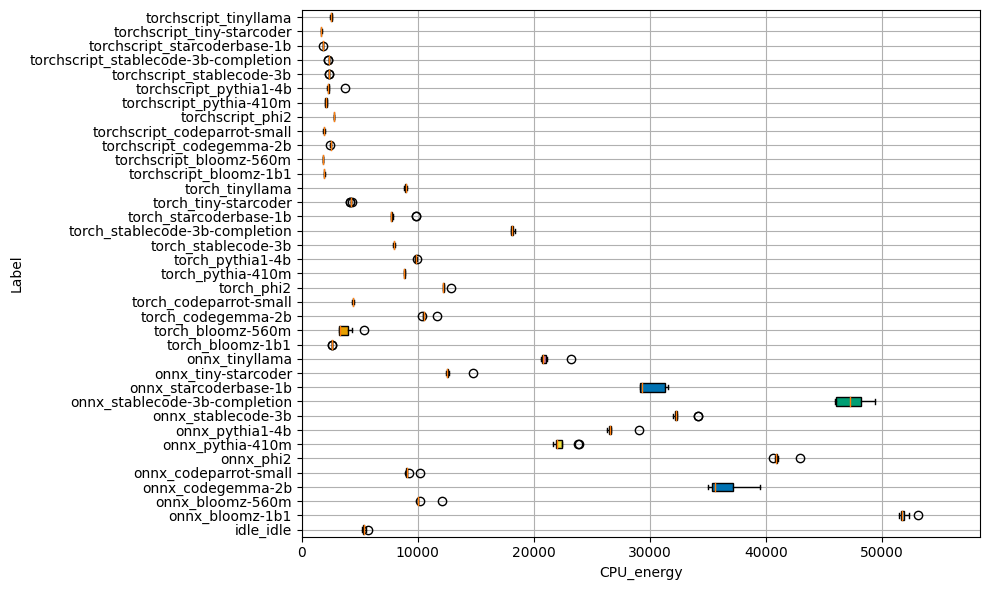

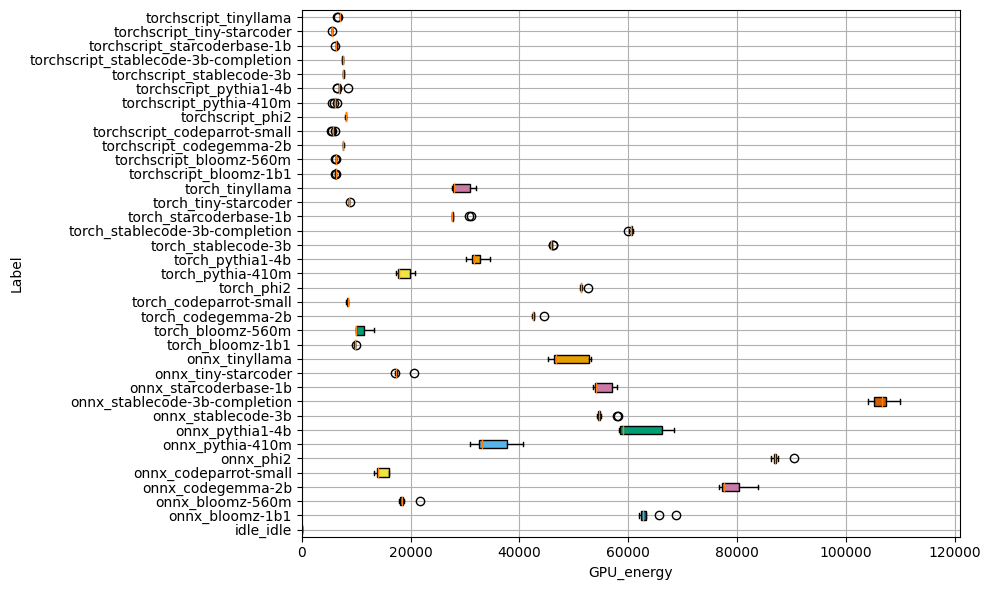

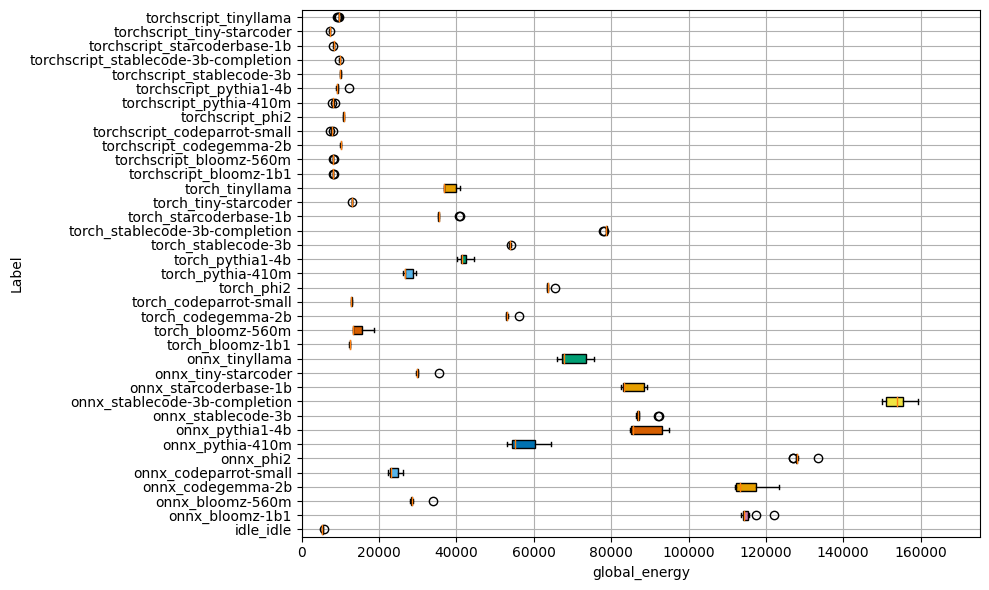

In [72]:

variables_to_plot = ['CPU_energy','GPU_energy','global_energy']
# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

n=0
# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = merged_df_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color
        
        #median = np.median(group[variable].dropna())
        #print(name +" -> "+ str(median))

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.xlim([0,merged_df_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    
    plt.savefig(save_dir + "energy_"+variable) if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")
    n+=1
plt.show()


In [73]:
save_dir

'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00/figures_nov/'

### Median values of energy

In [74]:
# Calculate mean values for each label
df = merged_df_plot
median_energy_values = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_energy_values.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_energy_values

label  experiment    CPU_energy  \
0                              idle_idle         5.5   5331.372978   
1                        onnx_bloomz-1b1         5.5  51748.184044   
2                       onnx_bloomz-560m         5.5  10006.586121   
3                      onnx_codegemma-2b         5.5  35610.280609   
4                  onnx_codeparrot-small         5.5   9081.845177   
5                              onnx_phi2         5.5  40885.409996   
6                       onnx_pythia-410m         5.5  21988.519135   
7                        onnx_pythia1-4b         5.5  26553.710274   
8                     onnx_stablecode-3b         5.5  32293.401276   
9          onnx_stablecode-3b-completion         5.5  47259.743469   
10                 onnx_starcoderbase-1b         5.5  29321.767159   
11                   onnx_tiny-starcoder         5.5  12543.012260   
12                        onnx_tinyllama         5.5  20832.141495   
13                      torch_bloomz-1b1         5.5   2628.826508   
14                     torch_bloomz-560m         5.5   3254.764481   
15                    torch_codegemma-2b         5.5  10527.942001   
16                torch_codeparrot-small         5.5   4424.862007   
17                            torch_phi2         5.5  12209.897324   
18                     torch_pythia-410m         5.5   8847.555695   
19                      torch_pythia1-4b         5.5   9833.124313   
20                   torch_stablecode-3b         5.5   7933.703957   
21        torch_stablecode-3b-completion         5.5  18112.742081   
22                torch_starcoderbase-1b         5.5   7728.190880   
23                  torch_tiny-starcoder         5.5   4246.124115   
24                       torch_tinyllama         5.5   8958.797241   
25                torchscript_bloomz-1b1         5.5   1948.270256   
26               torchscript_bloomz-560m         5.5   1858.257210   
27              torchscript_codegemma-2b         5.5   2493.089157   
28          torchscript_codeparrot-small         5.5   1900.725342   
29                      torchscript_phi2         5.5   2762.991547   
30               torchscript_pythia-410m         5.5   2052.937462   
31                torchscript_pythia1-4b         5.5   2285.345505   
32             torchscript_stablecode-3b         5.5   2344.199448   
33  torchscript_stablecode-3b-completion         5.5   2380.344330   
34          torchscript_starcoderbase-1b         5.5   1845.044197   
35            torchscript_tiny-starcoder         5.5   1692.254761   
36                 torchscript_tinyllama         5.5   2543.364494   

       GPU_energy  global_energy  
0        0.000000    5331.372978  
1    62642.135541  114327.170499  
2    18373.828223   28371.988127  
3    77668.948789  113279.229398  
4    13986.934956   23077.985648  
5    87022.120454  127932.914739  
6    33065.796229   55228.025927  
7    59124.014519   85651.403900  
8    54655.184992   86823.784125  
9   106721.017104  154000.752026  
10   54138.836894   83374.595983  
11   17344.686616   29875.091844  
12   46703.842778   67800.167767  
13    9751.112565   12388.138642  
14    9976.271805   13233.709419  
15   42494.678662   53024.509396  
16    8426.396317   12825.179010  
17   51308.245523   63554.592497  
18   17862.435892   26693.627340  
19   31640.409523   41433.656472  
20   45878.275067   53840.238614  
21   60527.252466   78787.140747  
22   27699.243895   35453.348591  
23    8738.370629   12977.583165  
24   27899.111313   36827.716835  
25    6212.964742    8163.522848  
26    6286.553030    8143.872922  
27    7582.907604   10096.541931  
28    5820.772408    7706.116044  
29    8107.966712   10862.803397  
30    6125.729891    8163.630851  
31    6844.454184    9111.162026  
32    7663.673766   10002.734694  
33    7504.766608    9874.418905  
34    6375.537556    8230.160399  
35    5520.391939    7214.945183  
36    7057.923739    9535.773841

In [75]:
# Split the 'label' column into 'runtime' and 'model'
median_energy_values[['runtime', 'model']] = median_energy_values['label'].str.split('_', n=1, expand=True)
median_energy_values

label  experiment    CPU_energy  \
0                              idle_idle         5.5   5331.372978   
1                        onnx_bloomz-1b1         5.5  51748.184044   
2                       onnx_bloomz-560m         5.5  10006.586121   
3                      onnx_codegemma-2b         5.5  35610.280609   
4                  onnx_codeparrot-small         5.5   9081.845177   
5                              onnx_phi2         5.5  40885.409996   
6                       onnx_pythia-410m         5.5  21988.519135   
7                        onnx_pythia1-4b         5.5  26553.710274   
8                     onnx_stablecode-3b         5.5  32293.401276   
9          onnx_stablecode-3b-completion         5.5  47259.743469   
10                 onnx_starcoderbase-1b         5.5  29321.767159   
11                   onnx_tiny-starcoder         5.5  12543.012260   
12                        onnx_tinyllama         5.5  20832.141495   
13                      torch_bloomz-1b1         5.5   2628.826508   
14                     torch_bloomz-560m         5.5   3254.764481   
15                    torch_codegemma-2b         5.5  10527.942001   
16                torch_codeparrot-small         5.5   4424.862007   
17                            torch_phi2         5.5  12209.897324   
18                     torch_pythia-410m         5.5   8847.555695   
19                      torch_pythia1-4b         5.5   9833.124313   
20                   torch_stablecode-3b         5.5   7933.703957   
21        torch_stablecode-3b-completion         5.5  18112.742081   
22                torch_starcoderbase-1b         5.5   7728.190880   
23                  torch_tiny-starcoder         5.5   4246.124115   
24                       torch_tinyllama         5.5   8958.797241   
25                torchscript_bloomz-1b1         5.5   1948.270256   
26               torchscript_bloomz-560m         5.5   1858.257210   
27              torchscript_codegemma-2b         5.5   2493.089157   
28          torchscript_codeparrot-small         5.5   1900.725342   
29                      torchscript_phi2         5.5   2762.991547   
30               torchscript_pythia-410m         5.5   2052.937462   
31                torchscript_pythia1-4b         5.5   2285.345505   
32             torchscript_stablecode-3b         5.5   2344.199448   
33  torchscript_stablecode-3b-completion         5.5   2380.344330   
34          torchscript_starcoderbase-1b         5.5   1845.044197   
35            torchscript_tiny-starcoder         5.5   1692.254761   
36                 torchscript_tinyllama         5.5   2543.364494   

       GPU_energy  global_energy      runtime                     model  
0        0.000000    5331.372978         idle                      idle  
1    62642.135541  114327.170499         onnx                bloomz-1b1  
2    18373.828223   28371.988127         onnx               bloomz-560m  
3    77668.948789  113279.229398         onnx              codegemma-2b  
4    13986.934956   23077.985648         onnx          codeparrot-small  
5    87022.120454  127932.914739         onnx                      phi2  
6    33065.796229   55228.025927         onnx               pythia-410m  
7    59124.014519   85651.403900         onnx                pythia1-4b  
8    54655.184992   86823.784125         onnx             stablecode-3b  
9   106721.017104  154000.752026         onnx  stablecode-3b-completion  
10   54138.836894   83374.595983         onnx          starcoderbase-1b  
11   17344.686616   29875.091844         onnx            tiny-starcoder  
12   46703.842778   67800.167767         onnx                 tinyllama  
13    9751.112565   12388.138642        torch                bloomz-1b1  
14    9976.271805   13233.709419        torch               bloomz-560m  
15   42494.678662   53024.509396        torch              codegemma-2b  
16    8426.396317   12825.179010        torch          codeparrot-small  
17   51308.245523   63554.592497        to

In [76]:
# Define the new order of the columns
#new_order = ['label', 'Used memory (Energibridge) [B]','CPU usage (Energibridge) [%]', 'runtime', 'model']
new_order= list(median_energy_values.columns[-2:]) + list(median_energy_values.columns[:-2])
# Reorder the columns by indexing in the new order
median_energy_values = median_energy_values[new_order]
median_energy_values

runtime                     model  \
0          idle                      idle   
1          onnx                bloomz-1b1   
2          onnx               bloomz-560m   
3          onnx              codegemma-2b   
4          onnx          codeparrot-small   
5          onnx                      phi2   
6          onnx               pythia-410m   
7          onnx                pythia1-4b   
8          onnx             stablecode-3b   
9          onnx  stablecode-3b-completion   
10         onnx          starcoderbase-1b   
11         onnx            tiny-starcoder   
12         onnx                 tinyllama   
13        torch                bloomz-1b1   
14        torch               bloomz-560m   
15        torch              codegemma-2b   
16        torch          codeparrot-small   
17        torch                      phi2   
18        torch               pythia-410m   
19        torch                pythia1-4b   
20        torch             stablecode-3b   
21        torch  stablecode-3b-completion   
22        torch          starcoderbase-1b   
23        torch            tiny-starcoder   
24        torch                 tinyllama   
25  torchscript                bloomz-1b1   
26  torchscript               bloomz-560m   
27  torchscript              codegemma-2b   
28  torchscript          codeparrot-small   
29  torchscript                      phi2   
30  torchscript               pythia-410m   
31  torchscript                pythia1-4b   
32  torchscript             stablecode-3b   
33  torchscript  stablecode-3b-completion   
34  torchscript          starcoderbase-1b   
35  torchscript            tiny-starcoder   
36  torchscript                 tinyllama   

                                   label  experiment    CPU_energy  \
0                              idle_idle         5.5   5331.372978   
1                        onnx_bloomz-1b1         5.5  51748.184044   
2                       onnx_bloomz-560m         5.5  10006.586121   
3                      onnx_codegemma-2b         5.5  35610.280609   
4                  onnx_codeparrot-small         5.5   9081.845177   
5                              onnx_phi2         5.5  40885.409996   
6                       onnx_pythia-410m         5.5  21988.519135   
7                        onnx_pythia1-4b         5.5  26553.710274   
8                     onnx_stablecode-3b         5.5  32293.401276   
9          onnx_stablecode-3b-completion         5.5  47259.743469   
10                 onnx_starcoderbase-1b         5.5  29321.767159   
11                   onnx_tiny-starcoder         5.5  12543.012260   
12                        onnx_tinyllama         5.5  20832.141495   
13                      torch_bloomz-1b1         5.5   2628.826508   
14                     torch_bloomz-560m         5.5   3254.764481   
15                    torch_codegemma-2b         5.5  10527.942001   
16                torch_codeparrot-small         5.5   4424.862007   
17                            torch_phi2         5.5  12209.897324   
18                     torch_pythia-410m         5.5   8847.555695   
19                      torch_pythia1-4b         5.5   9833.124313   
20                   torch_stablecode-3b         5.5   7933.703957   
21        torch_stablecode-3b-completion         5.5  18112.742081   
22                torch_starcoderbase-1b         5.5   7728.190880   
23                  torch_tiny-starcoder         5.5   4246.124115   
24                       torch_tinyllama         5.5   8958.797241   
25                torchscript_bloomz-1b1         5.5   1948.270256   
26               torchscript_bloomz-560m         5.5   1858.257210   
27              torchscript_codegemma-2b         5.5   2493.089157   
28          torchscript_codeparrot-small         5.5   1900.725342   
29                      torchscript_phi2         5.5   2762.991547   
30               torchscript_pythia-410m         5.5   2052.937462   
31                torchscript_pythia1-4b         5.5   22

In [77]:
if SAVE_TABLES:
    print(f"saved in {tables_dir+'median_energy_values.csv'}")
    median_energy_values.to_csv(tables_dir+'median_energy_values.csv', index=False)
else:
    print(f"CHECK SAVE_TABLES: NOT saved in {tables_dir+'median_energy_values.csv'}")
    

saved in D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00/tables_nov/median_energy_values.csv


In [78]:
median_energy_values = median_energy_values.drop(columns = ['label','experiment'])


In [79]:
median_energy_values

runtime                     model    CPU_energy     GPU_energy  \
0          idle                      idle   5331.372978       0.000000   
1          onnx                bloomz-1b1  51748.184044   62642.135541   
2          onnx               bloomz-560m  10006.586121   18373.828223   
3          onnx              codegemma-2b  35610.280609   77668.948789   
4          onnx          codeparrot-small   9081.845177   13986.934956   
5          onnx                      phi2  40885.409996   87022.120454   
6          onnx               pythia-410m  21988.519135   33065.796229   
7          onnx                pythia1-4b  26553.710274   59124.014519   
8          onnx             stablecode-3b  32293.401276   54655.184992   
9          onnx  stablecode-3b-completion  47259.743469  106721.017104   
10         onnx          starcoderbase-1b  29321.767159   54138.836894   
11         onnx            tiny-starcoder  12543.012260   17344.686616   
12         onnx                 tinyllama  20832.141495   46703.842778   
13        torch                bloomz-1b1   2628.826508    9751.112565   
14        torch               bloomz-560m   3254.764481    9976.271805   
15        torch              codegemma-2b  10527.942001   42494.678662   
16        torch          codeparrot-small   4424.862007    8426.396317   
17        torch                      phi2  12209.897324   51308.245523   
18        torch               pythia-410m   8847.555695   17862.435892   
19        torch                pythia1-4b   9833.124313   31640.409523   
20        torch             stablecode-3b   7933.703957   45878.275067   
21        torch  stablecode-3b-completion  18112.742081   60527.252466   
22        torch          starcoderbase-1b   7728.190880   27699.243895   
23        torch            tiny-starcoder   4246.124115    8738.370629   
24        torch                 tinyllama   8958.797241   27899.111313   
25  torchscript                bloomz-1b1   1948.270256    6212.964742   
26  torchscript               bloomz-560m   1858.257210    6286.553030   
27  torchscript              codegemma-2b   2493.089157    7582.907604   
28  torchscript          codeparrot-small   1900.725342    5820.772408   
29  torchscript                      phi2   2762.991547    8107.966712   
30  torchscript               pythia-410m   2052.937462    6125.729891   
31  torchscript                pythia1-4b   2285.345505    6844.454184   
32  torchscript             stablecode-3b   2344.199448    7663.673766   
33  torchscript  stablecode-3b-completion   2380.344330    7504.766608   
34  torchscript          starcoderbase-1b   1845.044197    6375.537556   
35  torchscript            tiny-starcoder   1692.254761    5520.391939   
36  torchscript                 tinyllama   2543.364494    7057.923739   

    global_energy  
0     5331.372978  
1   114327.170499  
2    28371.988127  
3   113279.229398  
4    23077.985648  
5   127932.914739  
6    55228.025927  
7    85651.403900  
8    86823.784125  
9   154000.752026  
10   83374.595983  
11   29875.091844  
12   67800.167767  
13   12388.138642  
14   13233.709419  
15   53024.509396  
16   12825.179010  
17   63554.592497  
18   26693.627340  
19   41433.656472  
20   53840.238614  
21   78787.140747  
22   35453.348591  
23   12977.583165  
24   36827.716835  
25    8163.522848  
26    8143.872922  
27   10096.541931  
28    7706.116044  
29   10862.803397  
30    8163.630851  
31    9111.162026  
32   10002.734694  
33    9874.418905  
34    8230.160399  
35    7214.945183  
36    9535.773841

In [80]:
filename = tables_dir + 'median_energy_values.tex'
save_latex_table(median_energy_values,filename)

\begin{tabular}{llrrr}
\toprule
runtime & model & CPU energy & GPU energy & global energy \\
\midrule
idle & idle & 5331.372978 & 0.000000 & 5331.372978 \\
onnx & bloomz-1b1 & 51748.184044 & 62642.135541 & 114327.170499 \\
onnx & bloomz-560m & 10006.586121 & 18373.828223 & 28371.988127 \\
onnx & codegemma-2b & 35610.280609 & 77668.948789 & 113279.229398 \\
onnx & codeparrot-small & 9081.845177 & 13986.934956 & 23077.985648 \\
onnx & phi2 & 40885.409996 & 87022.120454 & 127932.914739 \\
onnx & pythia-410m & 21988.519135 & 33065.796229 & 55228.025927 \\
onnx & pythia1-4b & 26553.710274 & 59124.014519 & 85651.403900 \\
onnx & stablecode-3b & 32293.401276 & 54655.184992 & 86823.784125 \\
onnx & stablecode-3b-completion & 47259.743469 & 106721.017104 & 154000.752026 \\
onnx & starcoderbase-1b & 29321.767159 & 54138.836894 & 83374.595983 \\
onnx & tiny-starcoder & 12543.012260 & 17344.686616 & 29875.091844 \\
onnx & tinyllama & 20832.141495 & 46703.842778 & 67800.167767 \\
torch & bloomz-1b1

In [81]:
# # Convert DataFrame to LaTeX table
# latex_table = median_energy_values.to_latex(index=False)

# # Define the filename
#filename = tables_dir + 'median_energy_values.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)
    
# # Print LaTeX table
# print(latex_table)

### Mean values of energy

In [82]:
# Calculate mean values for each label
df = merged_df_plot
mean_values = df.groupby('label').mean()

# Optionally, you might want to reset the index if you need 'label' as a column
mean_values.reset_index(inplace=True)

mean_values = mean_values.drop(columns = ['experiment'])
mean_values

label    CPU_energy     GPU_energy  \
0                              idle_idle   5354.569939       0.000000   
1                        onnx_bloomz-1b1  51927.454579   63467.347720   
2                       onnx_bloomz-560m  10225.342424   18655.178368   
3                      onnx_codegemma-2b  36308.573636   78817.360421   
4                  onnx_codeparrot-small   9194.086356   14631.469502   
5                              onnx_phi2  41094.609500   87246.974272   
6                       onnx_pythia-410m  22350.111249   34808.775192   
7                        onnx_pythia1-4b  26786.079912   61798.101714   
8                     onnx_stablecode-3b  32630.566499   55269.282511   
9          onnx_stablecode-3b-completion  47282.854431  106483.329350   
10                 onnx_starcoderbase-1b  30098.823441   55253.283872   
11                   onnx_tiny-starcoder  12776.548640   17637.377655   
12                        onnx_tinyllama  21072.893358   48866.637895   
13                      torch_bloomz-1b1   2626.155368    9764.587265   
14                     torch_bloomz-560m   3663.661246   10708.823506   
15                    torch_codegemma-2b  10615.003989   42706.668378   
16                torch_codeparrot-small   4422.490605    8369.469636   
17                            torch_phi2  12279.055205   51410.968027   
18                     torch_pythia-410m   8855.930324   18604.837062   
19                      torch_pythia1-4b   9832.710625   32161.237077   
20                   torch_stablecode-3b   7943.529193   45914.876533   
21        torch_stablecode-3b-completion  18139.370270   60501.128792   
22                torch_starcoderbase-1b   8153.443156   28314.355575   
23                  torch_tiny-starcoder   4247.391063    8731.982927   
24                       torch_tinyllama   8952.919618   29059.657966   
25                torchscript_bloomz-1b1   1948.655995    6208.090468   
26               torchscript_bloomz-560m   1856.005960    6289.807389   
27              torchscript_codegemma-2b   2490.224879    7606.239536   
28          torchscript_codeparrot-small   1907.680121    5779.068408   
29                      torchscript_phi2   2766.541321    8098.972311   
30               torchscript_pythia-410m   2088.411020    6085.970089   
31                torchscript_pythia1-4b   2430.155602    6982.055605   
32             torchscript_stablecode-3b   2340.721536    7668.199915   
33  torchscript_stablecode-3b-completion   2351.679253    7493.904124   
34          torchscript_starcoderbase-1b   1845.648589    6367.216149   
35            torchscript_tiny-starcoder   1693.326759    5522.157246   
36                 torchscript_tinyllama   2536.219955    6976.315750   

    global_energy  
0     5354.569939  
1   115394.802299  
2    28880.520792  
3   115125.934057  
4    23825.555858  
5   128341.583772  
6    57158.886441  
7    88584.181626  
8    87899.849011  
9   153766.183781  
10   85352.107313  
11   30413.926296  
12   69939.531253  
13   12390.742633  
14   14372.484752  
15   53321.672366  
16   12791.960241  
17   63690.023231  
18   27460.767386  
19   41993.947702  
20   53858.405726  
21   78640.499062  
22   36467.798732  
23   12979.373990  
24   38012.577585  
25    8156.746463  
26    8145.813349  
27   10096.464416  
28    7686.748529  
29   10865.513632  
30    8174.381109  
31    9412.211207  
32   10008.921452  
33    9845.583377  
34    8212.864737  
35    7215.484005  
36    9512.535706

In [83]:
pwd

'D:\\GAISSA\\energy-repo\\repo_sept_last_update\\cudaep_nov_results\\nov_cudaep_00'

In [84]:
# Split the 'label' column into 'runtime' and 'model'
mean_values[['runtime', 'model']] = mean_values['label'].str.split('_', n=1, expand=True)
#df[['runtime', 'model']] = df['label'].str.split('_', n=1, expand=True)
mean_values

label    CPU_energy     GPU_energy  \
0                              idle_idle   5354.569939       0.000000   
1                        onnx_bloomz-1b1  51927.454579   63467.347720   
2                       onnx_bloomz-560m  10225.342424   18655.178368   
3                      onnx_codegemma-2b  36308.573636   78817.360421   
4                  onnx_codeparrot-small   9194.086356   14631.469502   
5                              onnx_phi2  41094.609500   87246.974272   
6                       onnx_pythia-410m  22350.111249   34808.775192   
7                        onnx_pythia1-4b  26786.079912   61798.101714   
8                     onnx_stablecode-3b  32630.566499   55269.282511   
9          onnx_stablecode-3b-completion  47282.854431  106483.329350   
10                 onnx_starcoderbase-1b  30098.823441   55253.283872   
11                   onnx_tiny-starcoder  12776.548640   17637.377655   
12                        onnx_tinyllama  21072.893358   48866.637895   
13                      torch_bloomz-1b1   2626.155368    9764.587265   
14                     torch_bloomz-560m   3663.661246   10708.823506   
15                    torch_codegemma-2b  10615.003989   42706.668378   
16                torch_codeparrot-small   4422.490605    8369.469636   
17                            torch_phi2  12279.055205   51410.968027   
18                     torch_pythia-410m   8855.930324   18604.837062   
19                      torch_pythia1-4b   9832.710625   32161.237077   
20                   torch_stablecode-3b   7943.529193   45914.876533   
21        torch_stablecode-3b-completion  18139.370270   60501.128792   
22                torch_starcoderbase-1b   8153.443156   28314.355575   
23                  torch_tiny-starcoder   4247.391063    8731.982927   
24                       torch_tinyllama   8952.919618   29059.657966   
25                torchscript_bloomz-1b1   1948.655995    6208.090468   
26               torchscript_bloomz-560m   1856.005960    6289.807389   
27              torchscript_codegemma-2b   2490.224879    7606.239536   
28          torchscript_codeparrot-small   1907.680121    5779.068408   
29                      torchscript_phi2   2766.541321    8098.972311   
30               torchscript_pythia-410m   2088.411020    6085.970089   
31                torchscript_pythia1-4b   2430.155602    6982.055605   
32             torchscript_stablecode-3b   2340.721536    7668.199915   
33  torchscript_stablecode-3b-completion   2351.679253    7493.904124   
34          torchscript_starcoderbase-1b   1845.648589    6367.216149   
35            torchscript_tiny-starcoder   1693.326759    5522.157246   
36                 torchscript_tinyllama   2536.219955    6976.315750   

    global_energy      runtime                     model  
0     5354.569939         idle                      idle  
1   115394.802299         onnx                bloomz-1b1  
2    28880.520792         onnx               bloomz-560m  
3   115125.934057         onnx              codegemma-2b  
4    23825.555858         onnx          codeparrot-small  
5   128341.583772         onnx                      phi2  
6    57158.886441         onnx               pythia-410m  
7    88584.181626         onnx                pythia1-4b  
8    87899.849011         onnx             stablecode-3b  
9   153766.183781         onnx  stablecode-3b-completion  
10   85352.107313         onnx          starcoderbase-1b  
11   30413.926296         onnx            tiny-starcoder  
12   69939.531253         onnx                 tinyllama  
13   12390.742633        torch                bloomz-1b1  
14   14372.484752        torch               bloomz-560m  
15   53321.672366        torch              codegemma-2b  
16   12791.960241        torch          codeparrot-small  
17   63690.023231        torch                      phi2  
18   27460.767386        torch               pythia-410m  
19   41993.947702        torch                pythia1-4b  
20   53858.405726    

In [85]:
if SAVE_TABLES:
    mean_values.to_csv(tables_dir+'mean_values_by_label.csv', index=False)

In [86]:
mean_values = mean_values.drop(columns = ['label'])
mean_values

CPU_energy     GPU_energy  global_energy      runtime  \
0    5354.569939       0.000000    5354.569939         idle   
1   51927.454579   63467.347720  115394.802299         onnx   
2   10225.342424   18655.178368   28880.520792         onnx   
3   36308.573636   78817.360421  115125.934057         onnx   
4    9194.086356   14631.469502   23825.555858         onnx   
5   41094.609500   87246.974272  128341.583772         onnx   
6   22350.111249   34808.775192   57158.886441         onnx   
7   26786.079912   61798.101714   88584.181626         onnx   
8   32630.566499   55269.282511   87899.849011         onnx   
9   47282.854431  106483.329350  153766.183781         onnx   
10  30098.823441   55253.283872   85352.107313         onnx   
11  12776.548640   17637.377655   30413.926296         onnx   
12  21072.893358   48866.637895   69939.531253         onnx   
13   2626.155368    9764.587265   12390.742633        torch   
14   3663.661246   10708.823506   14372.484752        torch   
15  10615.003989   42706.668378   53321.672366        torch   
16   4422.490605    8369.469636   12791.960241        torch   
17  12279.055205   51410.968027   63690.023231        torch   
18   8855.930324   18604.837062   27460.767386        torch   
19   9832.710625   32161.237077   41993.947702        torch   
20   7943.529193   45914.876533   53858.405726        torch   
21  18139.370270   60501.128792   78640.499062        torch   
22   8153.443156   28314.355575   36467.798732        torch   
23   4247.391063    8731.982927   12979.373990        torch   
24   8952.919618   29059.657966   38012.577585        torch   
25   1948.655995    6208.090468    8156.746463  torchscript   
26   1856.005960    6289.807389    8145.813349  torchscript   
27   2490.224879    7606.239536   10096.464416  torchscript   
28   1907.680121    5779.068408    7686.748529  torchscript   
29   2766.541321    8098.972311   10865.513632  torchscript   
30   2088.411020    6085.970089    8174.381109  torchscript   
31   2430.155602    6982.055605    9412.211207  torchscript   
32   2340.721536    7668.199915   10008.921452  torchscript   
33   2351.679253    7493.904124    9845.583377  torchscript   
34   1845.648589    6367.216149    8212.864737  torchscript   
35   1693.326759    5522.157246    7215.484005  torchscript   
36   2536.219955    6976.315750    9512.535706  torchscript   

                       model  
0                       idle  
1                 bloomz-1b1  
2                bloomz-560m  
3               codegemma-2b  
4           codeparrot-small  
5                       phi2  
6                pythia-410m  
7                 pythia1-4b  
8              stablecode-3b  
9   stablecode-3b-completion  
10          starcoderbase-1b  
11            tiny-starcoder  
12                 tinyllama  
13                bloomz-1b1  
14               bloomz-560m  
15              codegemma-2b  
16          codeparrot-small  
17                      phi2  
18               pythia-410m  
19                pythia1-4b  
20             stablecode-3b  
21  stablecode-3b-completion  
22          starcoderbase-1b  
23            tiny-starcoder  
24                 tinyllama  
25                bloomz-1b1  
26               bloomz-560m  
27              codegemma-2b  
28          codeparrot-small  
29                      phi2  
30               pythia-410m  
31                pythia1-4b  
32             stablecode-3b  
33  stablecode-3b-completion  
34          starcoderbase-1b  
35            tiny-starcoder  
36                 tinyllama

In [87]:
filename = tables_dir + 'mean_energy_values.tex'
save_latex_table(mean_values,filename)

\begin{tabular}{rrrll}
\toprule
CPU energy & GPU energy & global energy & runtime & model \\
\midrule
5354.569939 & 0.000000 & 5354.569939 & idle & idle \\
51927.454579 & 63467.347720 & 115394.802299 & onnx & bloomz-1b1 \\
10225.342424 & 18655.178368 & 28880.520792 & onnx & bloomz-560m \\
36308.573636 & 78817.360421 & 115125.934057 & onnx & codegemma-2b \\
9194.086356 & 14631.469502 & 23825.555858 & onnx & codeparrot-small \\
41094.609500 & 87246.974272 & 128341.583772 & onnx & phi2 \\
22350.111249 & 34808.775192 & 57158.886441 & onnx & pythia-410m \\
26786.079912 & 61798.101714 & 88584.181626 & onnx & pythia1-4b \\
32630.566499 & 55269.282511 & 87899.849011 & onnx & stablecode-3b \\
47282.854431 & 106483.329350 & 153766.183781 & onnx & stablecode-3b-completion \\
30098.823441 & 55253.283872 & 85352.107313 & onnx & starcoderbase-1b \\
12776.548640 & 17637.377655 & 30413.926296 & onnx & tiny-starcoder \\
21072.893358 & 48866.637895 & 69939.531253 & onnx & tinyllama \\
2626.155368 & 9764

In [88]:

# # Convert DataFrame to LaTeX table
# latex_table = mean_values.to_latex(index=False)

# # Define the filename
# filename = tables_dir + 'mean_energy_values.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)
    
# # Print LaTeX table
# print(latex_table)

# RQ1.2

## Resource utilization: Energibridge: CPU usage, Used memory

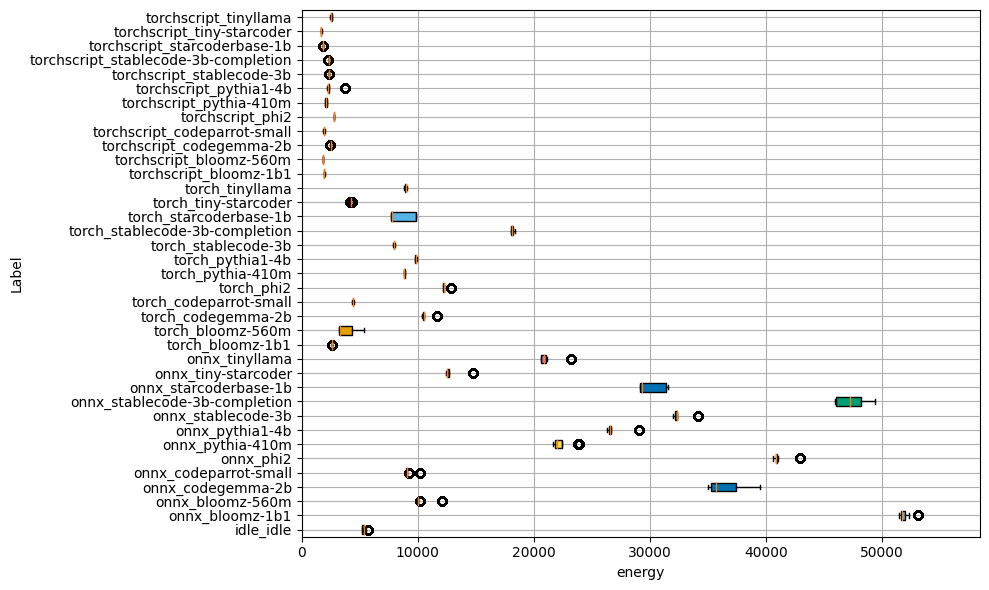

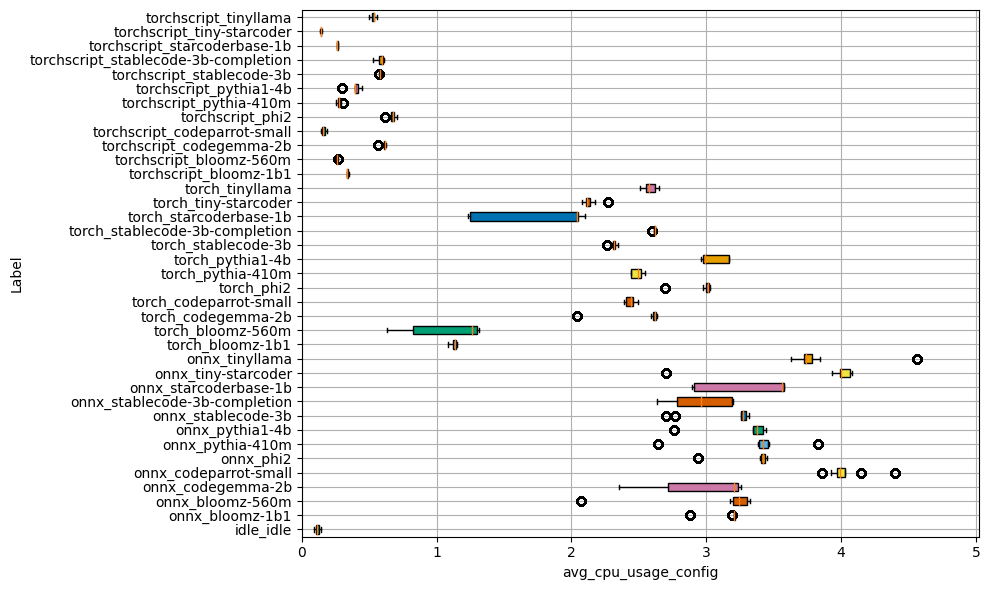

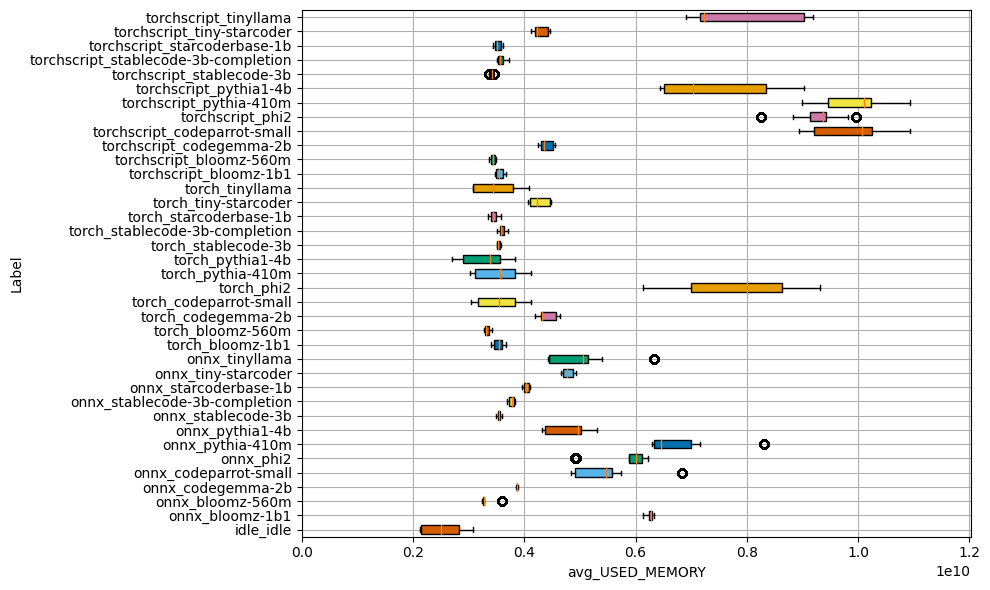

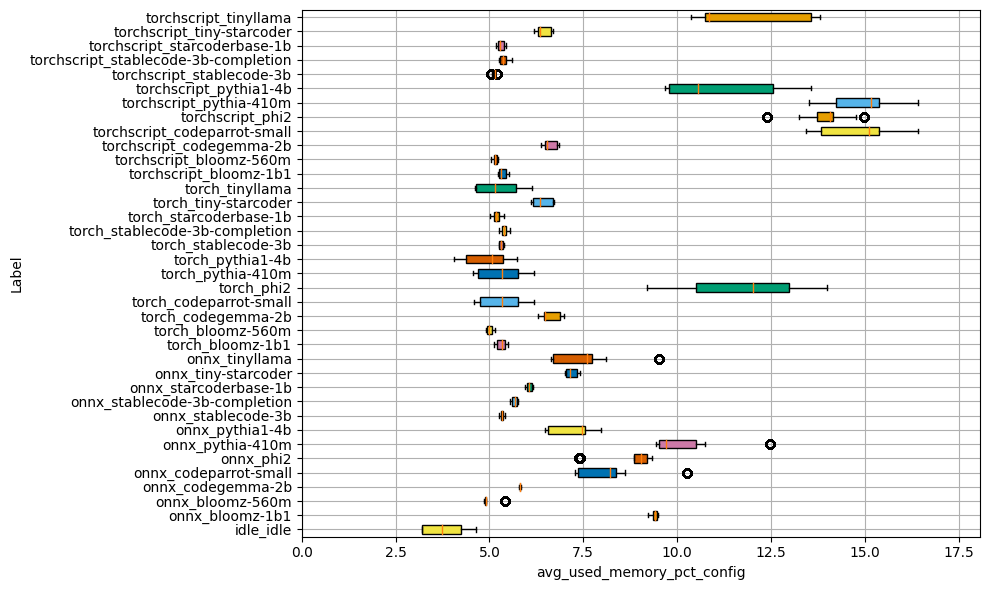

In [89]:

#variables_to_plot = [ 'Energy (Energibridge) [J]', "CPU usage (Energibridge) [%]",  'Used memory (Energibridge) [B]',]

variables_to_plot = [ 'energy', "avg_cpu_usage_config",  'avg_USED_MEMORY','avg_used_memory_pct_config']

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]
# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label' : runtime_model
    grouped = energi_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.xlim([0,energi_plot[variable].max()*1.1])
    
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for labels
    plt.savefig(save_dir+"energi_"+variable) if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")

plt.show()


In [90]:
energi_plot.head()

time runtime model  CPU_ENERGY (J)  TOTAL_MEMORY  \
0  2024-06-08 21:42:00.400    idle  idle   516616.142639   66575933440   
1  2024-06-08 21:42:00.400    idle  idle   516616.207123   66575933440   
2  2024-06-08 21:42:00.600    idle  idle   516627.494354   66575933440   
3  2024-06-08 21:42:00.800    idle  idle   516639.257111   66575933440   
4  2024-06-08 21:42:01.000    idle  idle   516651.727112   66575933440   

   TOTAL_SWAP  USED_MEMORY  USED_SWAP  AVG_CPU_USAGE_SAMP      label  \
0  2147479552   2241388544          0            5.237742  idle_idle   
1  2147479552   2246549504          0            5.237742  idle_idle   
2  2147479552   2353451008          0            4.872685  idle_idle   
3  2147479552   2402861056          0            4.872685  idle_idle   
4  2147479552   2452594688          0            6.209758  idle_idle   

   avg_TOTAL_MEMORY  avg_TOTAL_SWAP  avg_USED_MEMORY  avg_USED_SWAP  \
0      6.657593e+10    2.147480e+09     2.794639e+09            0.0   
1      6.657593e+10    2.147480e+09     2.794639e+09            0.0   
2      6.657593e+10    2.147480e+09     2.794639e+09            0.0   
3      6.657593e+10    2.147480e+09     2.794639e+09            0.0   
4      6.657593e+10    2.147480e+09     2.794639e+09            0.0   

   avg_cpu_usage_config       energy  avg_used_memory_pct_config  experiment  
0              0.143838  5356.125122                    4.197672           1  
1              0.143838  5356.125122                    4.197672           1  
2              0.143838  5356.125122                    4.197672           1  
3              0.143838  5356.125122                    4.197672           1  
4              0.143838  5356.125122                    4.197672           1

In [91]:
#variables_to_plot = [ 'energy', "avg_cpu_usage_config",  'avg_USED_MEMORY','avg_used_memory_pct_config']

resource_energi = energi_plot[['label','experiment',"avg_cpu_usage_config",  'avg_USED_MEMORY','avg_used_memory_pct_config']]

resource_energi

label  experiment  \
0                                  idle_idle           1   
1                                  idle_idle           1   
2                                  idle_idle           1   
3                                  idle_idle           1   
4                                  idle_idle           1   
...                                      ...         ...   
542672  torchscript_stablecode-3b-completion           9   
542673  torchscript_stablecode-3b-completion           9   
542674  torchscript_stablecode-3b-completion           9   
542675  torchscript_stablecode-3b-completion           9   
542676  torchscript_stablecode-3b-completion           9   

        avg_cpu_usage_config  avg_USED_MEMORY  avg_used_memory_pct_config  
0                   0.143838     2.794639e+09                    4.197672  
1                   0.143838     2.794639e+09                    4.197672  
2                   0.143838     2.794639e+09                    4.197672  
3                   0.143838     2.794639e+09                    4.197672  
4                   0.143838     2.794639e+09                    4.197672  
...                      ...              ...                         ...  
542672              0.598001     3.733427e+09                    5.607227  
542673              0.598001     3.733427e+09                    5.607227  
542674              0.598001     3.733427e+09                    5.607227  
542675              0.598001     3.733427e+09                    5.607227  
542676              0.598001     3.733427e+09                    5.607227  

[542677 rows x 5 columns]

In [92]:

resource_energi.to_csv(tables_dir+'final_energibridge_data.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")


### CPU usage and Used memory 

In [93]:

resource_energi = resource_energi.drop(columns = ['experiment'])

In [94]:
# Calculate mean values for each label
df = resource_energi
median_resource_energi = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_resource_energi.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_resource_energi

label  avg_cpu_usage_config  \
0                              idle_idle              0.110316   
1                        onnx_bloomz-1b1              3.204808   
2                       onnx_bloomz-560m              3.240140   
3                      onnx_codegemma-2b              3.206223   
4                  onnx_codeparrot-small              3.991848   
5                              onnx_phi2              3.418926   
6                       onnx_pythia-410m              3.422415   
7                        onnx_pythia1-4b              3.379086   
8                     onnx_stablecode-3b              3.275308   
9          onnx_stablecode-3b-completion              2.962644   
10                 onnx_starcoderbase-1b              3.563320   
11                   onnx_tiny-starcoder              4.001382   
12                        onnx_tinyllama              3.736836   
13                      torch_bloomz-1b1              1.136249   
14                     torch_bloomz-560m              1.259678   
15                    torch_codegemma-2b              2.620392   
16                torch_codeparrot-small              2.443924   
17                            torch_phi2              3.013264   
18                     torch_pythia-410m              2.491036   
19                      torch_pythia1-4b              2.993023   
20                   torch_stablecode-3b              2.315838   
21        torch_stablecode-3b-completion              2.617069   
22                torch_starcoderbase-1b              2.039089   
23                  torch_tiny-starcoder              2.115843   
24                       torch_tinyllama              2.573948   
25                torchscript_bloomz-1b1              0.336719   
26               torchscript_bloomz-560m              0.260083   
27              torchscript_codegemma-2b              0.616126   
28          torchscript_codeparrot-small              0.158259   
29                      torchscript_phi2              0.672850   
30               torchscript_pythia-410m              0.275700   
31                torchscript_pythia1-4b              0.394041   
32             torchscript_stablecode-3b              0.578733   
33  torchscript_stablecode-3b-completion              0.598074   
34          torchscript_starcoderbase-1b              0.263069   
35            torchscript_tiny-starcoder              0.142375   
36                 torchscript_tinyllama              0.532322   

    avg_USED_MEMORY  avg_used_memory_pct_config  
0      2.495251e+09                    3.747977  
1      6.272967e+09                    9.421358  
2      3.267479e+09                    4.907421  
3      3.875156e+09                    5.820091  
4      5.463905e+09                    8.207026  
5      6.012355e+09                    9.030823  
6      6.463005e+09                    9.707720  
7      4.971254e+09                    7.467044  
8      3.554092e+09                    5.337885  
9      3.788052e+09                    5.689269  
10     4.027843e+09                    6.049411  
11     4.765133e+09                    7.156746  
12     5.061456e+09                    7.602531  
13     3.548663e+09                    5.329731  
14     3.316065e+09                    4.980393  
15     4.318970e+09                    6.486654  
16     3.546823e+09                    5.327485  
17     8.007964e+09                   12.028316  
18     3.558276e+09                    5.344688  
19     3.378596e+09                    5.074801  
20     3.533975e+09                    5.307671  
21     3.580627e+09                    5.377737  
22     3.446470e+09                    5.176248  
23     4.224326e+09                    6.344508  
24     3.432273e+09                    5.155426  
25     3.539342e+09                    5.315732  
26     3.434032e+09                    5.157566  
27     4.346389e+09                    6.527834  
28     1.006792e+10                   15.122467  
29     9.375467e+09       

In [95]:
# Split the 'label' column into 'runtime' and 'model'
median_resource_energi[['runtime', 'model']] = median_resource_energi['label'].str.split('_', n=1, expand=True)
median_resource_energi

label  avg_cpu_usage_config  \
0                              idle_idle              0.110316   
1                        onnx_bloomz-1b1              3.204808   
2                       onnx_bloomz-560m              3.240140   
3                      onnx_codegemma-2b              3.206223   
4                  onnx_codeparrot-small              3.991848   
5                              onnx_phi2              3.418926   
6                       onnx_pythia-410m              3.422415   
7                        onnx_pythia1-4b              3.379086   
8                     onnx_stablecode-3b              3.275308   
9          onnx_stablecode-3b-completion              2.962644   
10                 onnx_starcoderbase-1b              3.563320   
11                   onnx_tiny-starcoder              4.001382   
12                        onnx_tinyllama              3.736836   
13                      torch_bloomz-1b1              1.136249   
14                     torch_bloomz-560m              1.259678   
15                    torch_codegemma-2b              2.620392   
16                torch_codeparrot-small              2.443924   
17                            torch_phi2              3.013264   
18                     torch_pythia-410m              2.491036   
19                      torch_pythia1-4b              2.993023   
20                   torch_stablecode-3b              2.315838   
21        torch_stablecode-3b-completion              2.617069   
22                torch_starcoderbase-1b              2.039089   
23                  torch_tiny-starcoder              2.115843   
24                       torch_tinyllama              2.573948   
25                torchscript_bloomz-1b1              0.336719   
26               torchscript_bloomz-560m              0.260083   
27              torchscript_codegemma-2b              0.616126   
28          torchscript_codeparrot-small              0.158259   
29                      torchscript_phi2              0.672850   
30               torchscript_pythia-410m              0.275700   
31                torchscript_pythia1-4b              0.394041   
32             torchscript_stablecode-3b              0.578733   
33  torchscript_stablecode-3b-completion              0.598074   
34          torchscript_starcoderbase-1b              0.263069   
35            torchscript_tiny-starcoder              0.142375   
36                 torchscript_tinyllama              0.532322   

    avg_USED_MEMORY  avg_used_memory_pct_config      runtime  \
0      2.495251e+09                    3.747977         idle   
1      6.272967e+09                    9.421358         onnx   
2      3.267479e+09                    4.907421         onnx   
3      3.875156e+09                    5.820091         onnx   
4      5.463905e+09                    8.207026         onnx   
5      6.012355e+09                    9.030823         onnx   
6      6.463005e+09                    9.707720         onnx   
7      4.971254e+09                    7.467044         onnx   
8      3.554092e+09                    5.337885         onnx   
9      3.788052e+09                    5.689269         onnx   
10     4.027843e+09                    6.049411         onnx   
11     4.765133e+09                    7.156746         onnx   
12     5.061456e+09                    7.602531         onnx   
13     3.548663e+09                    5.329731        torch   
14     3.316065e+09                    4.980393        torch   
15     4.318970e+09                    6.486654        torch   
16     3.546823e+09                    5.327485        torch   
17     8.007964e+09                   12.028316        torch   
18     3.558276e+09                    5.344688        torch   
19     3.378596e+09                    5.074801        torch   
20     3.533975e+09                    5.307671        torch   
21     3.580627e+09                    5.377737        torch   
22     3.446470e+09                    5.176248       

In [96]:
# Define the new order of the columns
#new_order = ['label', 'Used memory (Energibridge) [B]','CPU usage (Energibridge) [%]', 'runtime', 'model']
new_order= list(median_resource_energi.columns[-2:]) + list(median_resource_energi.columns[:-2])
# Reorder the columns by indexing in the new order
median_resource_energi = median_resource_energi[new_order]
median_resource_energi

runtime                     model  \
0          idle                      idle   
1          onnx                bloomz-1b1   
2          onnx               bloomz-560m   
3          onnx              codegemma-2b   
4          onnx          codeparrot-small   
5          onnx                      phi2   
6          onnx               pythia-410m   
7          onnx                pythia1-4b   
8          onnx             stablecode-3b   
9          onnx  stablecode-3b-completion   
10         onnx          starcoderbase-1b   
11         onnx            tiny-starcoder   
12         onnx                 tinyllama   
13        torch                bloomz-1b1   
14        torch               bloomz-560m   
15        torch              codegemma-2b   
16        torch          codeparrot-small   
17        torch                      phi2   
18        torch               pythia-410m   
19        torch                pythia1-4b   
20        torch             stablecode-3b   
21        torch  stablecode-3b-completion   
22        torch          starcoderbase-1b   
23        torch            tiny-starcoder   
24        torch                 tinyllama   
25  torchscript                bloomz-1b1   
26  torchscript               bloomz-560m   
27  torchscript              codegemma-2b   
28  torchscript          codeparrot-small   
29  torchscript                      phi2   
30  torchscript               pythia-410m   
31  torchscript                pythia1-4b   
32  torchscript             stablecode-3b   
33  torchscript  stablecode-3b-completion   
34  torchscript          starcoderbase-1b   
35  torchscript            tiny-starcoder   
36  torchscript                 tinyllama   

                                   label  avg_cpu_usage_config  \
0                              idle_idle              0.110316   
1                        onnx_bloomz-1b1              3.204808   
2                       onnx_bloomz-560m              3.240140   
3                      onnx_codegemma-2b              3.206223   
4                  onnx_codeparrot-small              3.991848   
5                              onnx_phi2              3.418926   
6                       onnx_pythia-410m              3.422415   
7                        onnx_pythia1-4b              3.379086   
8                     onnx_stablecode-3b              3.275308   
9          onnx_stablecode-3b-completion              2.962644   
10                 onnx_starcoderbase-1b              3.563320   
11                   onnx_tiny-starcoder              4.001382   
12                        onnx_tinyllama              3.736836   
13                      torch_bloomz-1b1              1.136249   
14                     torch_bloomz-560m              1.259678   
15                    torch_codegemma-2b              2.620392   
16                torch_codeparrot-small              2.443924   
17                            torch_phi2              3.013264   
18                     torch_pythia-410m              2.491036   
19                      torch_pythia1-4b              2.993023   
20                   torch_stablecode-3b              2.315838   
21        torch_stablecode-3b-completion              2.617069   
22                torch_starcoderbase-1b              2.039089   
23                  torch_tiny-starcoder              2.115843   
24                       torch_tinyllama              2.573948   
25                torchscript_bloomz-1b1              0.336719   
26               torchscript_bloomz-560m              0.260083   
27              torchscript_codegemma-2b              0.616126   
28          torchscript_codeparrot-small              0.158259   
29                      torchscript_phi2              0.672850   
30               torchscript_pythia-410m              0.275700   
31                torchscript_pythia1-4b              0.394041   
32             torchscript_stablecode-3b              0.578733   
33  torchscript_stablecode-3b-completion             

In [97]:
if SAVE_TABLES:
    median_resource_energi.to_csv(tables_dir+'median_resource_energi.csv', index=False)

In [98]:
median_resource_energi = median_resource_energi.drop(columns = ['label'])


In [99]:
filename = tables_dir + 'median_resource_energi.tex'
save_latex_table(median_resource_energi,filename)

\begin{tabular}{llrrr}
\toprule
runtime & model & avg cpu usage config & avg USED MEMORY & avg used memory pct config \\
\midrule
idle & idle & 0.110316 & 2495250711.893333 & 3.747977 \\
onnx & bloomz-1b1 & 3.204808 & 6272966690.459656 & 9.421358 \\
onnx & bloomz-560m & 3.240140 & 3267478719.470491 & 4.907421 \\
onnx & codegemma-2b & 3.206223 & 3875156359.274486 & 5.820091 \\
onnx & codeparrot-small & 3.991848 & 5463905331.674562 & 8.207026 \\
onnx & phi2 & 3.418926 & 6012354783.289591 & 9.030823 \\
onnx & pythia-410m & 3.422415 & 6463005466.982005 & 9.707720 \\
onnx & pythia1-4b & 3.379086 & 4971254377.737481 & 7.467044 \\
onnx & stablecode-3b & 3.275308 & 3554091923.576470 & 5.337885 \\
onnx & stablecode-3b-completion & 2.962644 & 3788052234.206502 & 5.689269 \\
onnx & starcoderbase-1b & 3.563320 & 4027843369.589762 & 6.049411 \\
onnx & tiny-starcoder & 4.001382 & 4765133484.107652 & 7.156746 \\
onnx & tinyllama & 3.736836 & 5061455913.057756 & 7.602531 \\
torch & bloomz-1b1 & 1.1362

In [100]:
# # Convert DataFrame to LaTeX table
# latex_table = median_resource_energi.to_latex(index=False)

# # Define the filename
# filename = tables_dir + 'median_resource_energi.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)


# # Print LaTeX table
# print(latex_table)

## Resource utilization: Nvidia: 

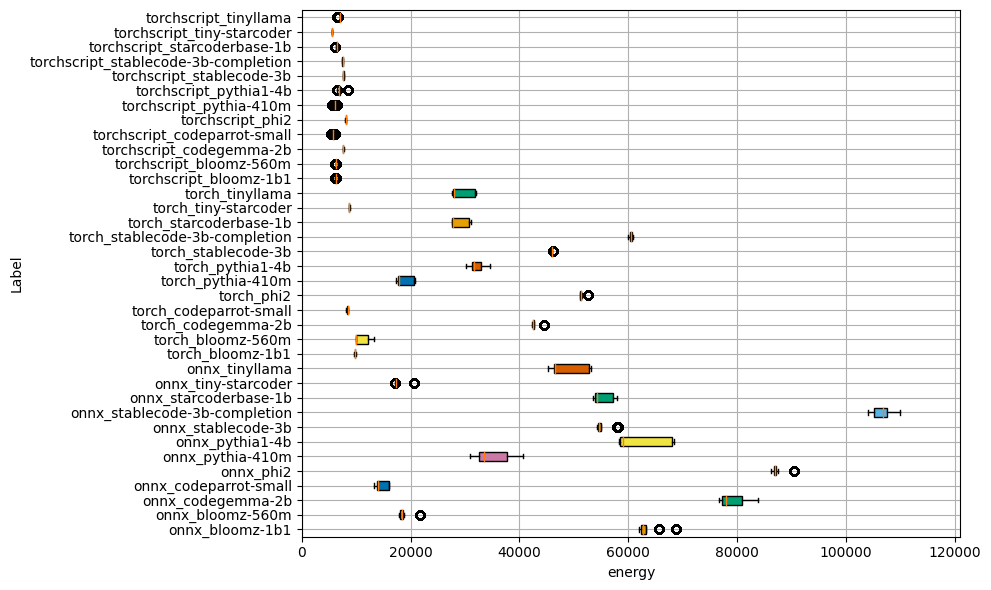

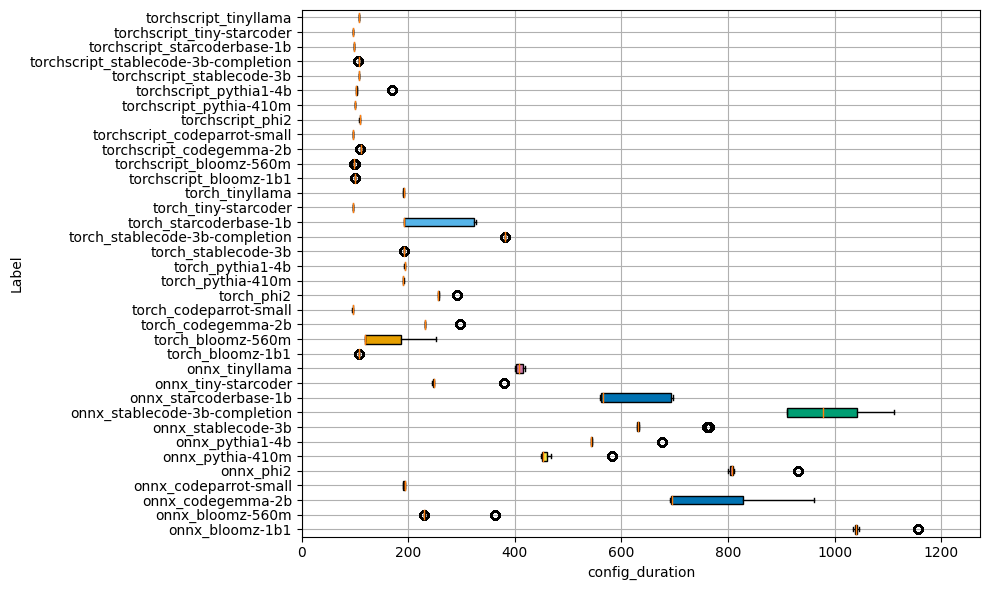

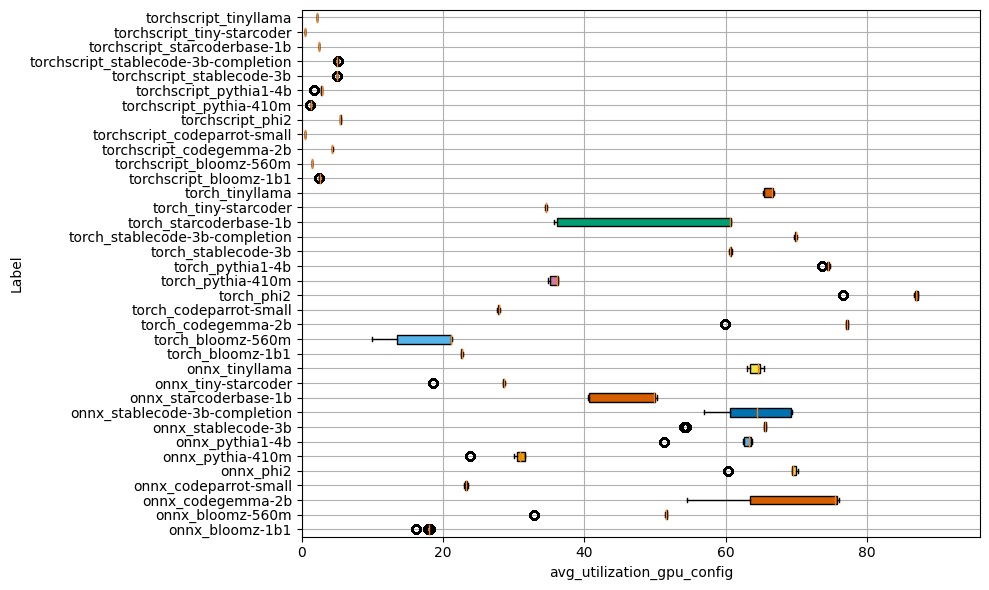

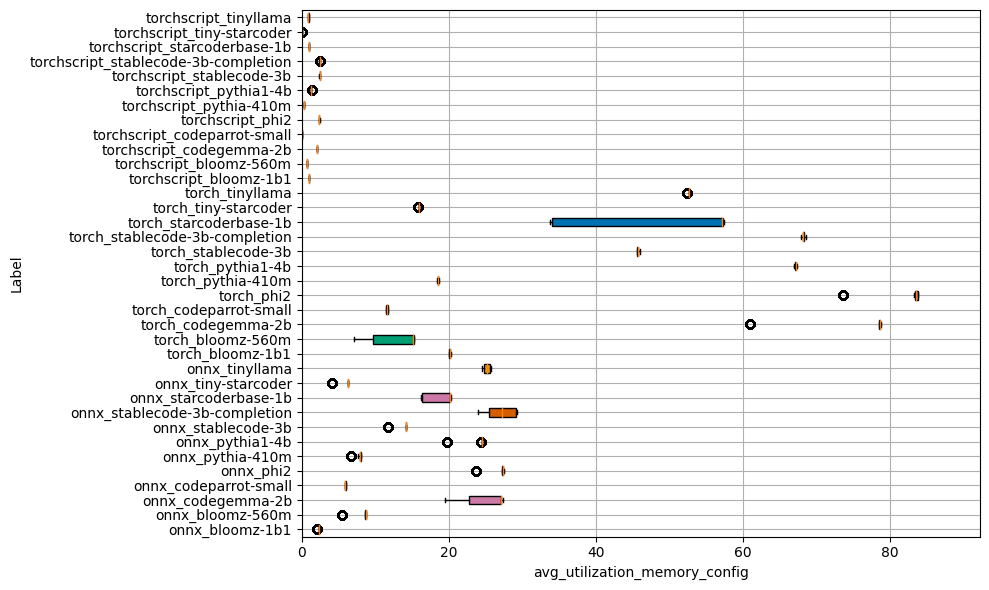

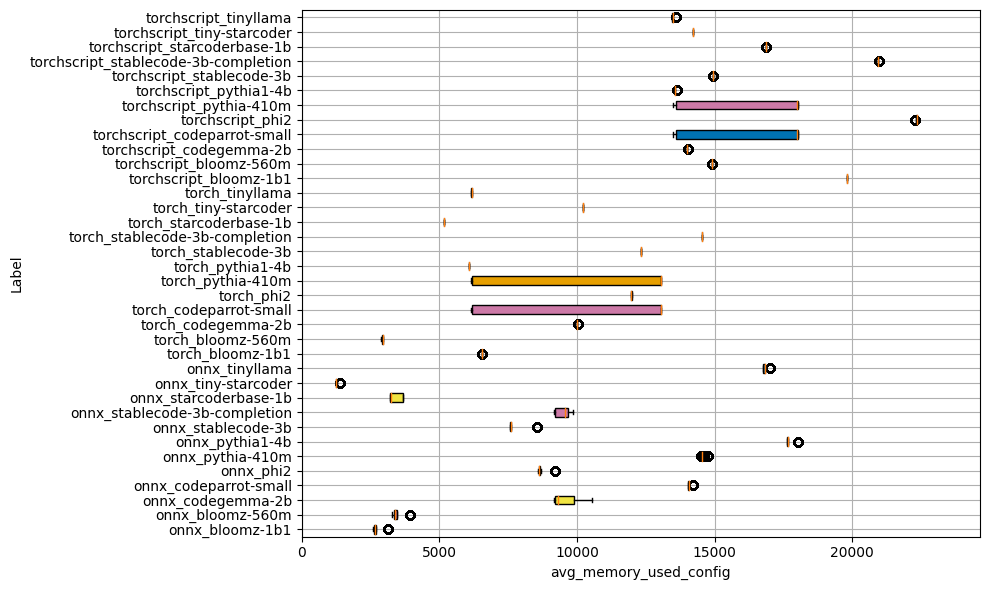

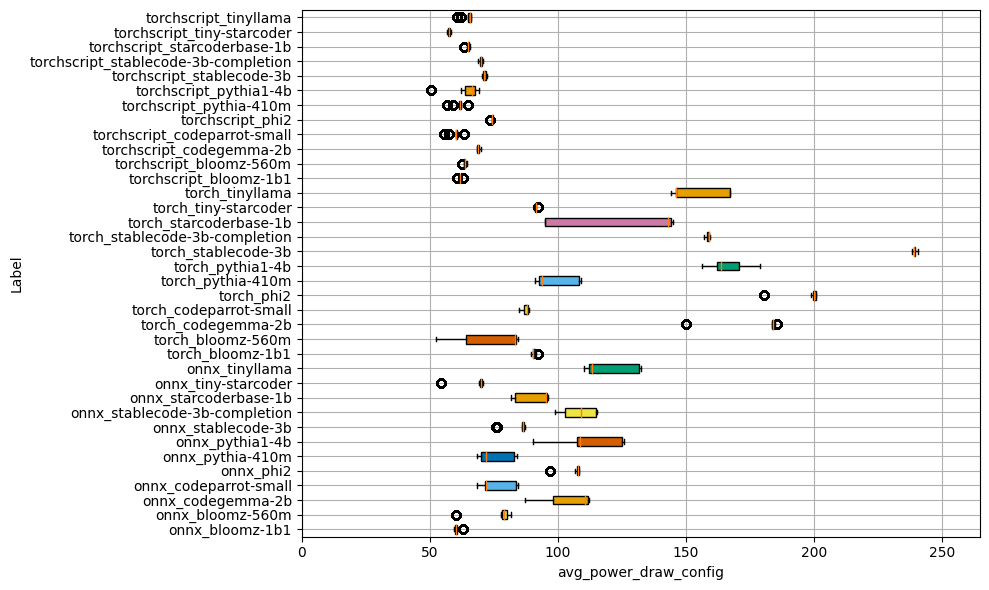

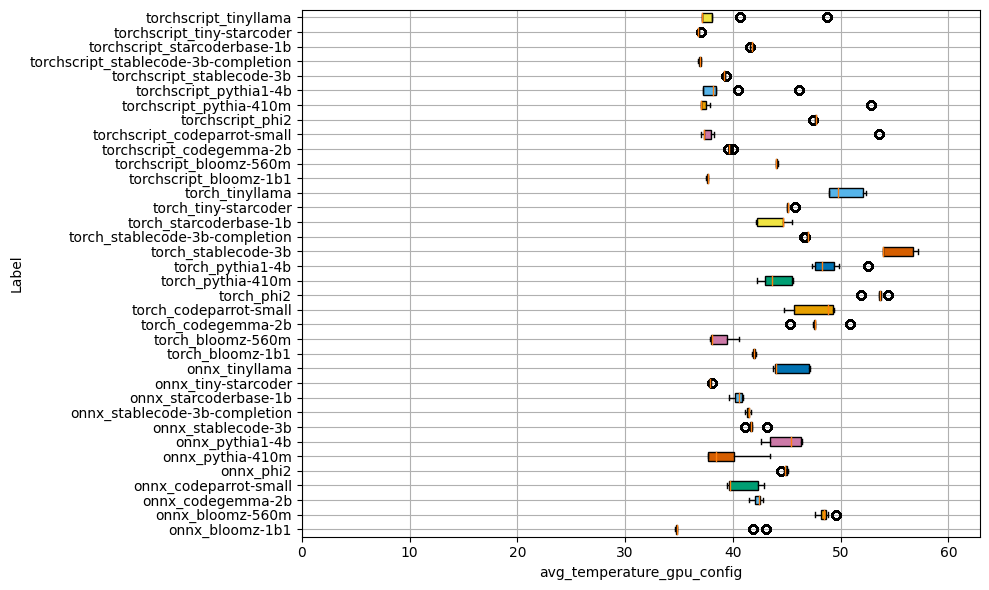

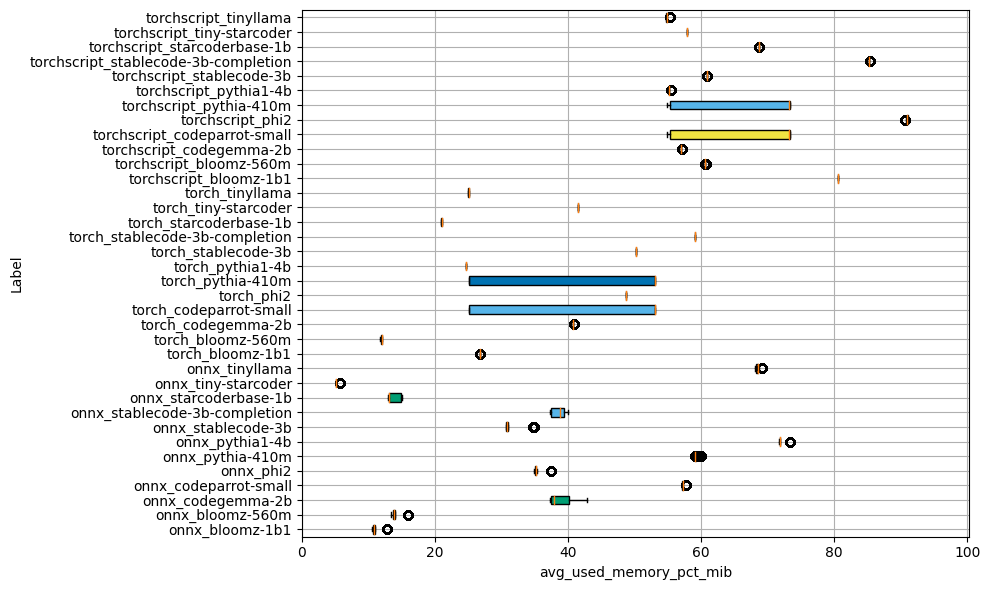

In [101]:
variables_to_plot = ['Energy (Nvidia-smi) [J]','Execution time (Nvidia-smi) [s]','GPU usage (Nvidia-smi) [%]',
                     'Used memory (Nvidia-smi) [%]','Used GPU memory (Nvidia-smi) [MiB]' ,'GPU temperature (Nvidia-smi) [°]']

variables_to_plot = ['energy','config_duration','avg_utilization_gpu_config','avg_utilization_memory_config','avg_memory_used_config' ,
                     'avg_power_draw_config','avg_temperature_gpu_config','avg_used_memory_pct_mib']


# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

n=0
# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = nvidia_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')

    plt.xlim([0,nvidia_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    
    plt.savefig(save_dir + "nvidia_"+variable) if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}") if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")
    n+=1
plt.show()


In [102]:
nvidia_plot.columns

Index(['time', 'runtime', 'model', ' utilization.gpu [%]',
       ' utilization.memory [%]', ' memory.total [MiB]', ' memory.used [MiB]',
       ' power.draw [W]', ' power.max_limit [W]', ' temperature.gpu', 'label',
       'used_memory_pct_mib', 'avg_utilization_gpu_config',
       'avg_utilization_memory_config', 'avg_memory_used_config',
       'avg_power_draw_config', 'avg_temperature_gpu_config',
       'avg_used_memory_pct_mib', 'config_duration', 'energy', 'experiment'],
      dtype='object')

In [103]:
resource_nvidia = nvidia_plot[['label', 'experiment','config_duration','avg_utilization_gpu_config','avg_utilization_memory_config','avg_memory_used_config' ,
                     'avg_power_draw_config','avg_temperature_gpu_config','avg_used_memory_pct_mib']]
#variables_to_plot = ['Energy (Nvidia-smi) [J]','Execution time (Nvidia-smi) [s]','GPU usage (Nvidia-smi) [%]','Used memory (Nvidia-smi) [%]','Used GPU memory (Nvidia-smi) [MiB]' ,'GPU temperature (Nvidia-smi) [°]']
#variables_to_plot = ['energy','config_duration','avg_utilization_gpu_config','avg_utilization_memory_config','avg_memory_used_config' ,
#                     'avg_power_draw_config','avg_temperature_gpu_config','avg_used_memory_pct_mib']
resource_nvidia

label  experiment  config_duration  \
0                            torch_pythia1-4b           1          193.242   
1                            torch_pythia1-4b           1          193.242   
2                            torch_pythia1-4b           1          193.242   
3                            torch_pythia1-4b           1          193.242   
4                            torch_pythia1-4b           1          193.242   
...                                       ...         ...              ...   
1047986  torchscript_stablecode-3b-completion           9          107.748   
1047987  torchscript_stablecode-3b-completion           9          107.748   
1047988  torchscript_stablecode-3b-completion           9          107.748   
1047989  torchscript_stablecode-3b-completion           9          107.748   
1047990  torchscript_stablecode-3b-completion           9          107.748   

         avg_utilization_gpu_config  avg_utilization_memory_config  \
0                         73.584680                      67.165711   
1                         73.584680                      67.165711   
2                         73.584680                      67.165711   
3                         73.584680                      67.165711   
4                         73.584680                      67.165711   
...                             ...                            ...   
1047986                    5.041199                       2.423221   
1047987                    5.041199                       2.423221   
1047988                    5.041199                       2.423221   
1047989                    5.041199                       2.423221   
1047990                    5.041199                       2.423221   

         avg_memory_used_config  avg_power_draw_config  \
0                   6061.018760             178.655961   
1                   6061.018760             178.655961   
2                   6061.018760             178.655961   
3                   6061.018760             178.655961   
4                   6061.018760             178.655961   
...                         ...                    ...   
1047986            20944.451311              69.656236   
1047987            20944.451311              69.656236   
1047988            20944.451311              69.656236   
1047989            20944.451311              69.656236   
1047990            20944.451311              69.656236   

         avg_temperature_gpu_config  avg_used_memory_pct_mib  
0                         49.400730                24.674397  
1                         49.400730                24.674397  
2                         49.400730                24.674397  
3                         49.400730                24.674397  
4                         49.400730                24.674397  
...                             ...                      ...  
1047986                   36.781835                85.264824  
1047987                   36.781835                85.264824  
1047988                   36.781835                85.264824  
1047989                   36.781835                85.264824  
1047990                   36.781835                85.264824  

[1047991 rows x 9 columns]

In [105]:
print(len(resource_nvidia['label'].unique()))
resource_nvidia['label'].unique()

36


array(['torch_pythia1-4b', 'torch_tinyllama', 'torch_codeparrot-small',
       'torch_pythia-410m', 'onnx_pythia1-4b', 'onnx_tinyllama',
       'onnx_codeparrot-small', 'onnx_pythia-410m',
       'torchscript_pythia1-4b', 'torchscript_tinyllama',
       'torchscript_codeparrot-small', 'torchscript_pythia-410m',
       'onnx_phi2', 'torch_phi2', 'torchscript_phi2', 'onnx_codegemma-2b',
       'onnx_tiny-starcoder', 'torch_codegemma-2b',
       'torch_tiny-starcoder', 'torchscript_codegemma-2b',
       'torchscript_tiny-starcoder', 'onnx_bloomz-560m',
       'onnx_stablecode-3b', 'torch_bloomz-560m', 'torch_stablecode-3b',
       'torchscript_bloomz-560m', 'torchscript_stablecode-3b',
       'onnx_starcoderbase-1b', 'onnx_bloomz-1b1',
       'onnx_stablecode-3b-completion', 'torch_starcoderbase-1b',
       'torch_bloomz-1b1', 'torch_stablecode-3b-completion',
       'torchscript_starcoderbase-1b', 'torchscript_bloomz-1b1',
       'torchscript_stablecode-3b-completion'], dtype=object)

In [106]:

resource_nvidia.to_csv(tables_dir+'final_nvidia_data.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")

In [107]:

resource_nvidia = resource_nvidia.drop(columns = ['experiment'])


In [108]:
# Calculate mean values for each label
df = resource_nvidia
median_resource_nvidia = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_resource_nvidia.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_resource_nvidia

label  config_duration  \
0                        onnx_bloomz-1b1         1039.802   
1                       onnx_bloomz-560m          230.163   
2                      onnx_codegemma-2b          694.889   
3                  onnx_codeparrot-small          193.248   
4                              onnx_phi2          807.433   
5                       onnx_pythia-410m          452.766   
6                        onnx_pythia1-4b          543.585   
7                     onnx_stablecode-3b          631.460   
8          onnx_stablecode-3b-completion          978.547   
9                  onnx_starcoderbase-1b          564.857   
10                   onnx_tiny-starcoder          247.288   
11                        onnx_tinyllama          408.373   
12                      torch_bloomz-1b1          107.758   
13                     torch_bloomz-560m          119.345   
14                    torch_codegemma-2b          230.577   
15                torch_codeparrot-small           95.886   
16                            torch_phi2          256.109   
17                     torch_pythia-410m          190.790   
18                      torch_pythia1-4b          193.226   
19                   torch_stablecode-3b          191.921   
20        torch_stablecode-3b-completion          381.188   
21                torch_starcoderbase-1b          192.515   
22                  torch_tiny-starcoder           95.737   
23                       torch_tinyllama          191.016   
24                torchscript_bloomz-1b1          100.383   
25               torchscript_bloomz-560m           98.767   
26              torchscript_codegemma-2b          110.391   
27          torchscript_codeparrot-small           96.258   
28                      torchscript_phi2          108.929   
29               torchscript_pythia-410m           99.224   
30                torchscript_pythia1-4b          102.650   
31             torchscript_stablecode-3b          107.538   
32  torchscript_stablecode-3b-completion          107.568   
33          torchscript_starcoderbase-1b           98.172   
34            torchscript_tiny-starcoder           96.141   
35                 torchscript_tinyllama          107.679   

    avg_utilization_gpu_config  avg_utilization_memory_config  \
0                    18.064722                       2.337483   
1                    51.535933                       8.671916   
2                    75.456153                      27.035367   
3                    23.285492                       5.922396   
4                    69.566101                      27.315231   
5                    30.861945                       7.972371   
6                    63.327115                      24.518106   
7                    65.539001                      14.173837   
8                    64.423160                      27.192795   
9                    49.928342                      20.108447   
10                   28.559577                       6.298495   
11                   64.615539                      25.207245   
12                   22.615529                      20.153414   
13                   21.054146                      15.172297   
14                   77.116208                      78.577108   
15                   27.906118                      11.542887   
16                   86.951613                      83.567270   
17                   36.117865                      18.539112   
18                   74.532744                      67.165711   
19                   60.615344                      45.680504   
20                   69.937368                      68.170410   
21                   60.636649                      57.212565   
22                   34.589165                      15.968965   
23                   66.558777                      52.640148   
24                    2.509548                       0.985901   
25                    1.496425                       0.659857   
26                    

In [109]:
# Split the 'label' column into 'runtime' and 'model'
median_resource_nvidia[['runtime', 'model']] = median_resource_nvidia['label'].str.split('_', n=1, expand=True)
median_resource_nvidia

label  config_duration  \
0                        onnx_bloomz-1b1         1039.802   
1                       onnx_bloomz-560m          230.163   
2                      onnx_codegemma-2b          694.889   
3                  onnx_codeparrot-small          193.248   
4                              onnx_phi2          807.433   
5                       onnx_pythia-410m          452.766   
6                        onnx_pythia1-4b          543.585   
7                     onnx_stablecode-3b          631.460   
8          onnx_stablecode-3b-completion          978.547   
9                  onnx_starcoderbase-1b          564.857   
10                   onnx_tiny-starcoder          247.288   
11                        onnx_tinyllama          408.373   
12                      torch_bloomz-1b1          107.758   
13                     torch_bloomz-560m          119.345   
14                    torch_codegemma-2b          230.577   
15                torch_codeparrot-small           95.886   
16                            torch_phi2          256.109   
17                     torch_pythia-410m          190.790   
18                      torch_pythia1-4b          193.226   
19                   torch_stablecode-3b          191.921   
20        torch_stablecode-3b-completion          381.188   
21                torch_starcoderbase-1b          192.515   
22                  torch_tiny-starcoder           95.737   
23                       torch_tinyllama          191.016   
24                torchscript_bloomz-1b1          100.383   
25               torchscript_bloomz-560m           98.767   
26              torchscript_codegemma-2b          110.391   
27          torchscript_codeparrot-small           96.258   
28                      torchscript_phi2          108.929   
29               torchscript_pythia-410m           99.224   
30                torchscript_pythia1-4b          102.650   
31             torchscript_stablecode-3b          107.538   
32  torchscript_stablecode-3b-completion          107.568   
33          torchscript_starcoderbase-1b           98.172   
34            torchscript_tiny-starcoder           96.141   
35                 torchscript_tinyllama          107.679   

    avg_utilization_gpu_config  avg_utilization_memory_config  \
0                    18.064722                       2.337483   
1                    51.535933                       8.671916   
2                    75.456153                      27.035367   
3                    23.285492                       5.922396   
4                    69.566101                      27.315231   
5                    30.861945                       7.972371   
6                    63.327115                      24.518106   
7                    65.539001                      14.173837   
8                    64.423160                      27.192795   
9                    49.928342                      20.108447   
10                   28.559577                       6.298495   
11                   64.615539                      25.207245   
12                   22.615529                      20.153414   
13                   21.054146                      15.172297   
14                   77.116208                      78.577108   
15                   27.906118                      11.542887   
16                   86.951613                      83.567270   
17                   36.117865                      18.539112   
18                   74.532744                      67.165711   
19                   60.615344                      45.680504   
20                   69.937368                      68.170410   
21                   60.636649                      57.212565   
22                   34.589165                      15.968965   
23                   66.558777                      52.640148   
24                    2.509548                       0.985901   
25                    1.496425                       0.659857   
26                    

In [110]:
# Define the new order of the columns
#new_order = ['label', 'Used memory (Energibridge) [B]','CPU usage (Energibridge) [%]', 'runtime', 'model']
new_order= list(median_resource_nvidia.columns[-2:]) + list(median_resource_nvidia.columns[:-2])
# Reorder the columns by indexing in the new order
median_resource_nvidia = median_resource_nvidia[new_order]
median_resource_nvidia

runtime                     model  \
0          onnx                bloomz-1b1   
1          onnx               bloomz-560m   
2          onnx              codegemma-2b   
3          onnx          codeparrot-small   
4          onnx                      phi2   
5          onnx               pythia-410m   
6          onnx                pythia1-4b   
7          onnx             stablecode-3b   
8          onnx  stablecode-3b-completion   
9          onnx          starcoderbase-1b   
10         onnx            tiny-starcoder   
11         onnx                 tinyllama   
12        torch                bloomz-1b1   
13        torch               bloomz-560m   
14        torch              codegemma-2b   
15        torch          codeparrot-small   
16        torch                      phi2   
17        torch               pythia-410m   
18        torch                pythia1-4b   
19        torch             stablecode-3b   
20        torch  stablecode-3b-completion   
21        torch          starcoderbase-1b   
22        torch            tiny-starcoder   
23        torch                 tinyllama   
24  torchscript                bloomz-1b1   
25  torchscript               bloomz-560m   
26  torchscript              codegemma-2b   
27  torchscript          codeparrot-small   
28  torchscript                      phi2   
29  torchscript               pythia-410m   
30  torchscript                pythia1-4b   
31  torchscript             stablecode-3b   
32  torchscript  stablecode-3b-completion   
33  torchscript          starcoderbase-1b   
34  torchscript            tiny-starcoder   
35  torchscript                 tinyllama   

                                   label  config_duration  \
0                        onnx_bloomz-1b1         1039.802   
1                       onnx_bloomz-560m          230.163   
2                      onnx_codegemma-2b          694.889   
3                  onnx_codeparrot-small          193.248   
4                              onnx_phi2          807.433   
5                       onnx_pythia-410m          452.766   
6                        onnx_pythia1-4b          543.585   
7                     onnx_stablecode-3b          631.460   
8          onnx_stablecode-3b-completion          978.547   
9                  onnx_starcoderbase-1b          564.857   
10                   onnx_tiny-starcoder          247.288   
11                        onnx_tinyllama          408.373   
12                      torch_bloomz-1b1          107.758   
13                     torch_bloomz-560m          119.345   
14                    torch_codegemma-2b          230.577   
15                torch_codeparrot-small           95.886   
16                            torch_phi2          256.109   
17                     torch_pythia-410m          190.790   
18                      torch_pythia1-4b          193.226   
19                   torch_stablecode-3b          191.921   
20        torch_stablecode-3b-completion          381.188   
21                torch_starcoderbase-1b          192.515   
22                  torch_tiny-starcoder           95.737   
23                       torch_tinyllama          191.016   
24                torchscript_bloomz-1b1          100.383   
25               torchscript_bloomz-560m           98.767   
26              torchscript_codegemma-2b          110.391   
27          torchscript_codeparrot-small           96.258   
28                      torchscript_phi2          108.929   
29               torchscript_pythia-410m           99.224   
30                torchscript_pythia1-4b          102.650   
31             torchscript_stablecode-3b          107.538   
32  torchscript_stablecode-3b-completion          107.568   
33          torchscript_starcoderbase-1b           98.172   
34            torchscript_tiny-starcoder           96.141   
35                 torchscript_tinyllama          107.679   

    avg_utilization_gpu_config  avg_utilization_memory_config  \
0                  

In [111]:
if SAVE_TABLES:
    median_resource_nvidia.to_csv(tables_dir+'median_resource_nvidia.csv', index=False)


In [112]:
median_resource_nvidia = median_resource_nvidia.drop(columns = ['label'])


In [113]:
filename = tables_dir + 'median_resource_nvidia.tex'
save_latex_table(median_resource_nvidia,filename)

\begin{tabular}{llrrrrrrr}
\toprule
runtime & model & config duration & avg utilization gpu config & avg utilization memory config & avg memory used config & avg power draw config & avg temperature gpu config & avg used memory pct mib \\
\midrule
onnx & bloomz-1b1 & 1039.802000 & 18.064722 & 2.337483 & 2676.460200 & 60.163909 & 34.773616 & 10.895865 \\
onnx & bloomz-560m & 230.163000 & 51.535933 & 8.671916 & 3393.205083 & 79.124521 & 48.489045 & 13.813732 \\
onnx & codegemma-2b & 694.889000 & 75.456153 & 27.035367 & 9310.976683 & 110.541410 & 42.457747 & 37.904969 \\
onnx & codeparrot-small & 193.248000 & 23.285492 & 5.922396 & 14060.011458 & 72.095349 & 39.756477 & 57.238281 \\
onnx & phi2 & 807.433000 & 69.566101 & 27.315231 & 8635.174006 & 107.844958 & 44.880774 & 35.153778 \\
onnx & pythia-410m & 452.766000 & 30.861945 & 7.972371 & 14532.744818 & 72.103135 & 38.453184 & 59.162778 \\
onnx & pythia1-4b & 543.585000 & 63.327115 & 24.518106 & 17653.619505 & 108.593907 & 45.403583 & 71.

In [114]:
# # Convert DataFrame to LaTeX table
# latex_table = median_resource_nvidia.to_latex(index=False)

# # Define the filename
# filename = tables_dir + 'median_resource_nvidia.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)

# # Print LaTeX table
# print(latex_table)

## Other: Wattmeter: 'Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]'

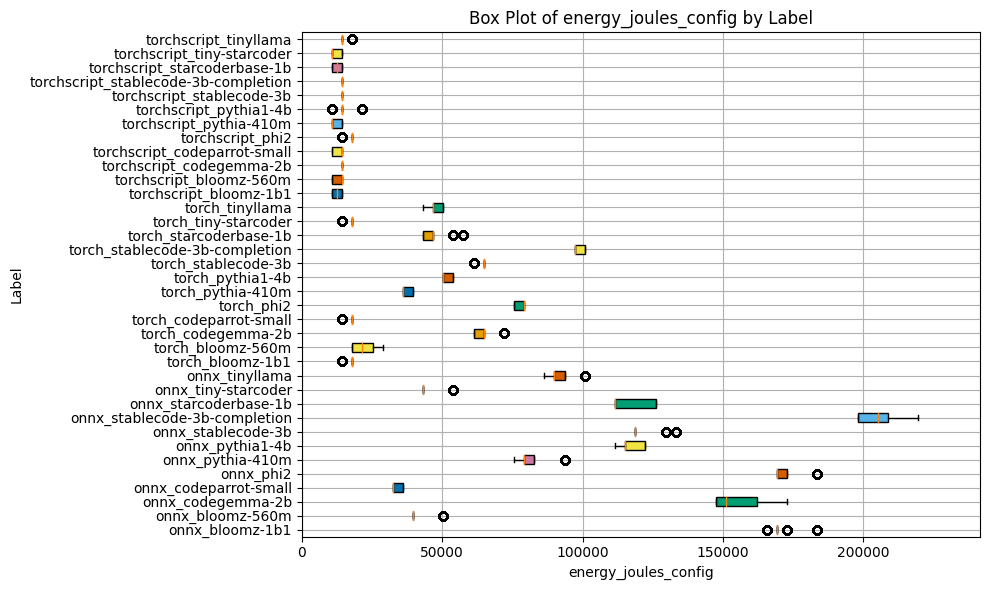

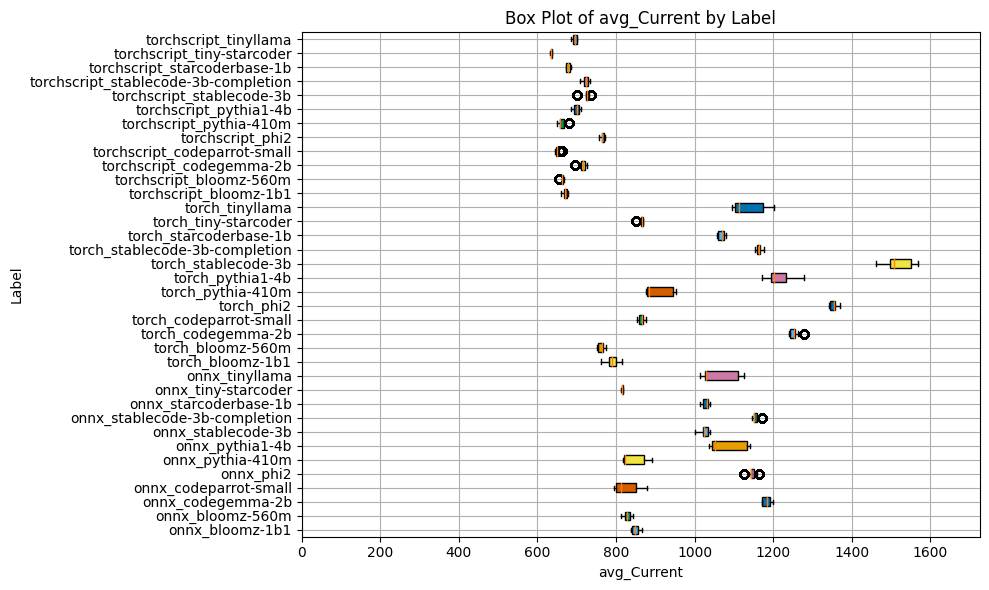

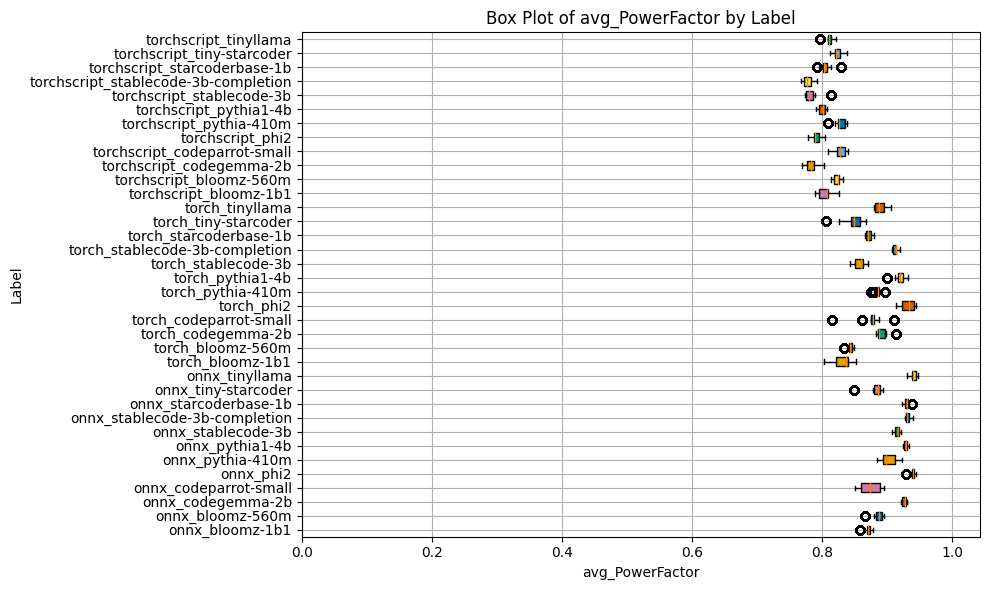

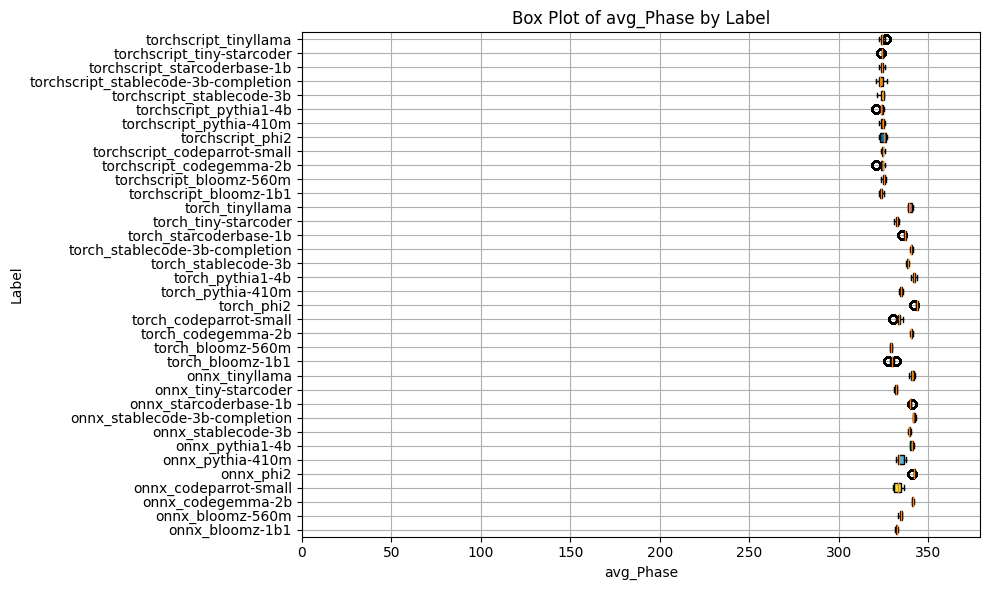

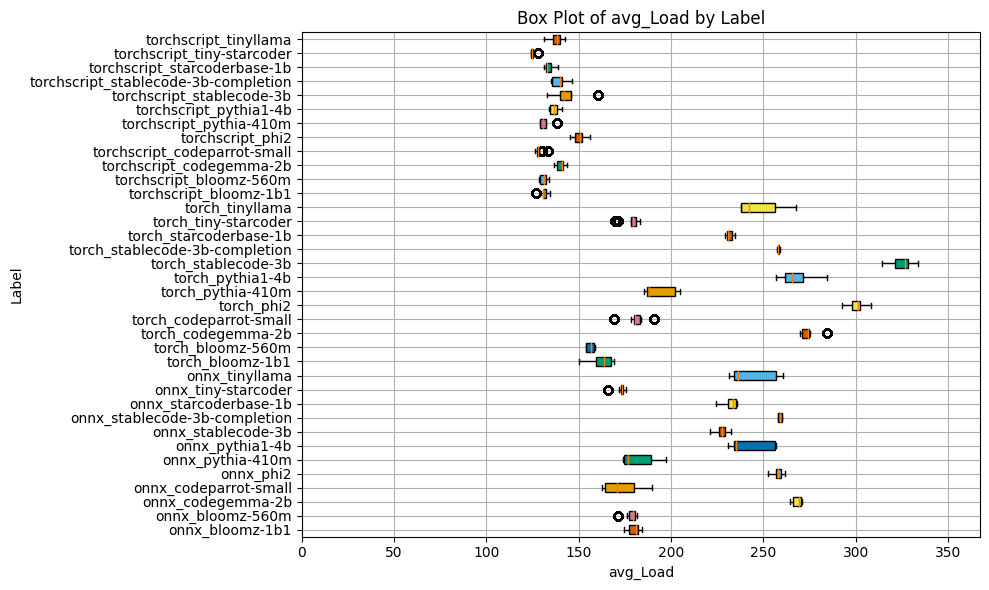

In [115]:
#variables_to_plot = ['Energy (Wattmeter) [J]','Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]']
variables_to_plot = ['energy_joules_config','avg_Current','avg_PowerFactor','avg_Phase' ,'avg_Load']

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = wattmeter_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.xlim([0,wattmeter_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    plt.savefig(save_dir + "wattmeter_"+variable) if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")

plt.show()


In [116]:
wattmeter_plot.columns

Index(['time', 'runtime', 'model', 'Current', 'PowerFactor', 'Phase', 'Energy',
       'EnergyNR', 'Load', 'label', 'energy_joules', 'energyNR_joules',
       'energy_joules_config', 'energyNR_joules_config', 'avg_Current',
       'avg_PowerFactor', 'avg_Phase', 'avg_Load', 'experiment'],
      dtype='object')

In [117]:
#variables_to_plot = ['Energy (Wattmeter) [J]','Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]']
#variables_to_plot = ['energy_joules_config','avg_Current','avg_PowerFactor','avg_Phase' ,'avg_Load']

resource_wattmeter = wattmeter_plot[['label','experiment','avg_Current','avg_PowerFactor','avg_Phase' ,'avg_Load']]
resource_wattmeter

label  experiment  avg_Current  \
0                           torch_pythia1-4b           1  1278.477341   
1                           torch_pythia1-4b           1  1278.477341   
2                           torch_pythia1-4b           1  1278.477341   
3                           torch_pythia1-4b           1  1278.477341   
4                           torch_pythia1-4b           1  1278.477341   
...                                      ...         ...          ...   
102895  torchscript_stablecode-3b-completion           9   721.461988   
102896  torchscript_stablecode-3b-completion           9   721.461988   
102897  torchscript_stablecode-3b-completion           9   721.461988   
102898  torchscript_stablecode-3b-completion           9   721.461988   
102899  torchscript_stablecode-3b-completion           9   721.461988   

        avg_PowerFactor   avg_Phase    avg_Load  
0              0.931662  343.706465  284.371601  
1              0.931662  343.706465  284.371601  
2              0.931662  343.706465  284.371601  
3              0.931662  343.706465  284.371601  
4              0.931662  343.706465  284.371601  
...                 ...         ...         ...  
102895         0.772339  323.596433  135.538012  
102896         0.772339  323.596433  135.538012  
102897         0.772339  323.596433  135.538012  
102898         0.772339  323.596433  135.538012  
102899         0.772339  323.596433  135.538012  

[102900 rows x 6 columns]

In [118]:
resource_wattmeter.to_csv(tables_dir+'final_wattmeter_data.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")

In [119]:

resource_wattmeter = resource_wattmeter.drop(columns = ['experiment'])

In [120]:
# Calculate mean values for each label
df = resource_wattmeter
median_resource_wattmeter = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_resource_wattmeter.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_resource_wattmeter

label  avg_Current  avg_PowerFactor  \
0                        onnx_bloomz-1b1   847.284091         0.870722   
1                       onnx_bloomz-560m   829.044335         0.886798   
2                      onnx_codegemma-2b  1183.926316         0.927458   
3                  onnx_codeparrot-small   812.274286         0.873060   
4                              onnx_phi2  1144.408710         0.939441   
5                       onnx_pythia-410m   823.982036         0.897690   
6                        onnx_pythia1-4b  1051.168699         0.928211   
7                     onnx_stablecode-3b  1024.719136         0.916780   
8          onnx_stablecode-3b-completion  1152.227967         0.930382   
9                  onnx_starcoderbase-1b  1032.346626         0.929815   
10                   onnx_tiny-starcoder   815.864956         0.885593   
11                        onnx_tinyllama  1029.382530         0.939639   
12                      torch_bloomz-1b1   790.901639         0.836448   
13                     torch_bloomz-560m   765.063725         0.843039   
14                    torch_codegemma-2b  1252.366412         0.887888   
15                torch_codeparrot-small   866.060606         0.877576   
16                            torch_phi2  1355.135321         0.933647   
17                     torch_pythia-410m   884.294833         0.885805   
18                      torch_pythia1-4b  1201.219033         0.919804   
19                   torch_stablecode-3b  1506.607362         0.859908   
20        torch_stablecode-3b-completion  1163.343272         0.912951   
21                torch_starcoderbase-1b  1069.707576         0.870879   
22                  torch_tiny-starcoder   866.798780         0.849390   
23                       torch_tinyllama  1114.073171         0.887058   
24                torchscript_bloomz-1b1   671.111446         0.807560   
25               torchscript_bloomz-560m   663.614458         0.823855   
26              torchscript_codegemma-2b   717.222857         0.783200   
27          torchscript_codeparrot-small   648.981818         0.826909   
28                      torchscript_phi2   765.290131         0.789657   
29               torchscript_pythia-410m   658.680473         0.826420   
30                torchscript_pythia1-4b   699.505917         0.800592   
31             torchscript_stablecode-3b   726.280702         0.780380   
32  torchscript_stablecode-3b-completion   724.687135         0.777105   
33          torchscript_starcoderbase-1b   678.185976         0.802195   
34            torchscript_tiny-starcoder   634.198171         0.821707   
35                 torchscript_tinyllama   696.654593         0.809778   

     avg_Phase    avg_Load  
0   332.417278  181.188889  
1   334.750394  179.630542  
2   341.451929  269.540881  
3   333.119314  170.890052  
4   342.344874  257.793515  
5   333.860965  176.895210  
6   340.940488  235.359756  
7   339.530673  227.780186  
8   341.454069  259.074349  
9   340.032485  233.640000  
10  332.138061  173.500000  
11  340.806472  236.316265  
12  329.773552  163.836066  
13  329.339608  156.524510  
14  340.602672  274.302799  
15  333.809756  180.750000  
16  343.681053  301.425968  
17  334.731261  188.335866  
18  341.912281  265.794562  
19  338.878742  326.717791  
20  340.494969  257.995413  
21  337.287765  231.036364  
22  332.484878  179.362805  
23  339.565655  242.341463  
24  323.706566  130.807229  
25  325.359940  130.984940  
26  324.547657  140.945714  
27  324.776091  127.730303  
28  325.556839  150.551724  
29  324.584320  130.511834  
30  323.832308  136.582840  
31  324.515789  141.888889  
32  323.238450  140.108187  
33  324.024665  132.771341  
34  324.478780  124.878049  
35  324.116352  138.368715

In [121]:
# Split the 'label' column into 'runtime' and 'model'
median_resource_wattmeter[['runtime', 'model']] = median_resource_wattmeter['label'].str.split('_', n=1, expand=True)
median_resource_wattmeter

label  avg_Current  avg_PowerFactor  \
0                        onnx_bloomz-1b1   847.284091         0.870722   
1                       onnx_bloomz-560m   829.044335         0.886798   
2                      onnx_codegemma-2b  1183.926316         0.927458   
3                  onnx_codeparrot-small   812.274286         0.873060   
4                              onnx_phi2  1144.408710         0.939441   
5                       onnx_pythia-410m   823.982036         0.897690   
6                        onnx_pythia1-4b  1051.168699         0.928211   
7                     onnx_stablecode-3b  1024.719136         0.916780   
8          onnx_stablecode-3b-completion  1152.227967         0.930382   
9                  onnx_starcoderbase-1b  1032.346626         0.929815   
10                   onnx_tiny-starcoder   815.864956         0.885593   
11                        onnx_tinyllama  1029.382530         0.939639   
12                      torch_bloomz-1b1   790.901639         0.836448   
13                     torch_bloomz-560m   765.063725         0.843039   
14                    torch_codegemma-2b  1252.366412         0.887888   
15                torch_codeparrot-small   866.060606         0.877576   
16                            torch_phi2  1355.135321         0.933647   
17                     torch_pythia-410m   884.294833         0.885805   
18                      torch_pythia1-4b  1201.219033         0.919804   
19                   torch_stablecode-3b  1506.607362         0.859908   
20        torch_stablecode-3b-completion  1163.343272         0.912951   
21                torch_starcoderbase-1b  1069.707576         0.870879   
22                  torch_tiny-starcoder   866.798780         0.849390   
23                       torch_tinyllama  1114.073171         0.887058   
24                torchscript_bloomz-1b1   671.111446         0.807560   
25               torchscript_bloomz-560m   663.614458         0.823855   
26              torchscript_codegemma-2b   717.222857         0.783200   
27          torchscript_codeparrot-small   648.981818         0.826909   
28                      torchscript_phi2   765.290131         0.789657   
29               torchscript_pythia-410m   658.680473         0.826420   
30                torchscript_pythia1-4b   699.505917         0.800592   
31             torchscript_stablecode-3b   726.280702         0.780380   
32  torchscript_stablecode-3b-completion   724.687135         0.777105   
33          torchscript_starcoderbase-1b   678.185976         0.802195   
34            torchscript_tiny-starcoder   634.198171         0.821707   
35                 torchscript_tinyllama   696.654593         0.809778   

     avg_Phase    avg_Load      runtime                     model  
0   332.417278  181.188889         onnx                bloomz-1b1  
1   334.750394  179.630542         onnx               bloomz-560m  
2   341.451929  269.540881         onnx              codegemma-2b  
3   333.119314  170.890052         onnx          codeparrot-small  
4   342.344874  257.793515         onnx                      phi2  
5   333.860965  176.895210         onnx               pythia-410m  
6   340.940488  235.359756         onnx                pythia1-4b  
7   339.530673  227.780186         onnx             stablecode-3b  
8   341.454069  259.074349         onnx  stablecode-3b-completion  
9   340.032485  233.640000         onnx          starcoderbase-1b  
10  332.138061  173.500000         onnx            tiny-starcoder  
11  340.806472  236.316265         onnx                 tinyllama  
12  329.773552  163.836066        torch                bloomz-1b1  
13  329.339608  156.524510        torch               bloomz-560m  
14  340.602672  274.302799        torch              codegemma-2b  
15  333.809756  180.750000        torch          codeparrot-small  
16  343.681053  301.425968        torch                      phi2  
17  334.731261  188.335866        torch               pythia-410m  
18  

In [122]:
# Define the new order of the columns
#new_order = ['label', 'Used memory (Energibridge) [B]','CPU usage (Energibridge) [%]', 'runtime', 'model']
new_order= list(median_resource_wattmeter.columns[-2:]) + list(median_resource_wattmeter.columns[:-2])
# Reorder the columns by indexing in the new order
median_resource_wattmeter = median_resource_wattmeter[new_order]
median_resource_wattmeter

runtime                     model  \
0          onnx                bloomz-1b1   
1          onnx               bloomz-560m   
2          onnx              codegemma-2b   
3          onnx          codeparrot-small   
4          onnx                      phi2   
5          onnx               pythia-410m   
6          onnx                pythia1-4b   
7          onnx             stablecode-3b   
8          onnx  stablecode-3b-completion   
9          onnx          starcoderbase-1b   
10         onnx            tiny-starcoder   
11         onnx                 tinyllama   
12        torch                bloomz-1b1   
13        torch               bloomz-560m   
14        torch              codegemma-2b   
15        torch          codeparrot-small   
16        torch                      phi2   
17        torch               pythia-410m   
18        torch                pythia1-4b   
19        torch             stablecode-3b   
20        torch  stablecode-3b-completion   
21        torch          starcoderbase-1b   
22        torch            tiny-starcoder   
23        torch                 tinyllama   
24  torchscript                bloomz-1b1   
25  torchscript               bloomz-560m   
26  torchscript              codegemma-2b   
27  torchscript          codeparrot-small   
28  torchscript                      phi2   
29  torchscript               pythia-410m   
30  torchscript                pythia1-4b   
31  torchscript             stablecode-3b   
32  torchscript  stablecode-3b-completion   
33  torchscript          starcoderbase-1b   
34  torchscript            tiny-starcoder   
35  torchscript                 tinyllama   

                                   label  avg_Current  avg_PowerFactor  \
0                        onnx_bloomz-1b1   847.284091         0.870722   
1                       onnx_bloomz-560m   829.044335         0.886798   
2                      onnx_codegemma-2b  1183.926316         0.927458   
3                  onnx_codeparrot-small   812.274286         0.873060   
4                              onnx_phi2  1144.408710         0.939441   
5                       onnx_pythia-410m   823.982036         0.897690   
6                        onnx_pythia1-4b  1051.168699         0.928211   
7                     onnx_stablecode-3b  1024.719136         0.916780   
8          onnx_stablecode-3b-completion  1152.227967         0.930382   
9                  onnx_starcoderbase-1b  1032.346626         0.929815   
10                   onnx_tiny-starcoder   815.864956         0.885593   
11                        onnx_tinyllama  1029.382530         0.939639   
12                      torch_bloomz-1b1   790.901639         0.836448   
13                     torch_bloomz-560m   765.063725         0.843039   
14                    torch_codegemma-2b  1252.366412         0.887888   
15                torch_codeparrot-small   866.060606         0.877576   
16                            torch_phi2  1355.135321         0.933647   
17                     torch_pythia-410m   884.294833         0.885805   
18                      torch_pythia1-4b  1201.219033         0.919804   
19                   torch_stablecode-3b  1506.607362         0.859908   
20        torch_stablecode-3b-completion  1163.343272         0.912951   
21                torch_starcoderbase-1b  1069.707576         0.870879   
22                  torch_tiny-starcoder   866.798780         0.849390   
23                       torch_tinyllama  1114.073171         0.887058   
24                torchscript_bloomz-1b1   671.111446         0.807560   
25               torchscript_bloomz-560m   663.614458         0.823855   
26              torchscript_codegemma-2b   717.222857         0.783200   
27          torchscript_codeparrot-small   648.981818         0.826909   
28                      torchscript_phi2   765.290131         0.789657   
29               torchscript_pythia-410m   658.680473         0.826420   
30                torchscript_pythia1-4b   699.5

In [123]:
if SAVE_TABLES:
    median_resource_wattmeter.to_csv(tables_dir+'median_resource_wattmeter.csv', index=False)


In [124]:
median_resource_wattmeter = median_resource_wattmeter.drop(columns = ['label'])


In [125]:
filename = tables_dir + 'median_resource_wattmeter.tex'
save_latex_table(median_resource_wattmeter,filename)

\begin{tabular}{llrrrr}
\toprule
runtime & model & avg Current & avg PowerFactor & avg Phase & avg Load \\
\midrule
onnx & bloomz-1b1 & 847.284091 & 0.870722 & 332.417278 & 181.188889 \\
onnx & bloomz-560m & 829.044335 & 0.886798 & 334.750394 & 179.630542 \\
onnx & codegemma-2b & 1183.926316 & 0.927458 & 341.451929 & 269.540881 \\
onnx & codeparrot-small & 812.274286 & 0.873060 & 333.119314 & 170.890052 \\
onnx & phi2 & 1144.408710 & 0.939441 & 342.344874 & 257.793515 \\
onnx & pythia-410m & 823.982036 & 0.897690 & 333.860965 & 176.895210 \\
onnx & pythia1-4b & 1051.168699 & 0.928211 & 340.940488 & 235.359756 \\
onnx & stablecode-3b & 1024.719136 & 0.916780 & 339.530673 & 227.780186 \\
onnx & stablecode-3b-completion & 1152.227967 & 0.930382 & 341.454069 & 259.074349 \\
onnx & starcoderbase-1b & 1032.346626 & 0.929815 & 340.032485 & 233.640000 \\
onnx & tiny-starcoder & 815.864956 & 0.885593 & 332.138061 & 173.500000 \\
onnx & tinyllama & 1029.382530 & 0.939639 & 340.806472 & 236.31626

In [126]:
# # Convert DataFrame to LaTeX table
# latex_table = median_resource_wattmeter.to_latex(index=False)


# # Define the filename
# filename = tables_dir + 'median_resource_wattmeter.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)


# # Print LaTeX table
# print(latex_table)

# Execution time


## Duration

In [127]:
path

'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00/'

In [128]:
# Path where the CSV files are stored
#path = "D:/GAISSA/energy-repo/last_repo/june_gpu_test//"  # Adjust this path to your CSV files location
all_files = glob.glob(path + "/results_*/processed/time_marks_updated.csv")
#all_files=all_files[:4]
all_files

['D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_1\\processed\\time_marks_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_10\\processed\\time_marks_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_2\\processed\\time_marks_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_3\\processed\\time_marks_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_4\\processed\\time_marks_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_5\\processed\\time_marks_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_6\\processed\\time_marks_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cudaep_nov_results/nov_cudaep_00\\results_7\\processed\\time_mar

In [129]:
result_numbers = []

li = []
for my_file in all_files:
    # The regex pattern to find "results_" followed by one or more digits
    df = pd.read_csv(my_file, index_col=None, header=0)
    
    match = re.search(r'results_(\d+)', my_file)
    if match:
        # Append the found number to the list
        result_numbers.append(int(match.group(1)))

    df['experiment'] = result_numbers[-1]
    li.append(df)

print(result_numbers)
# Combine all data into one DataFrame
time_df = pd.concat(li, axis=0, ignore_index=True)
time_df

[1, 10, 2, 3, 4, 5, 6, 7, 8, 9]


time      runtime                     model  \
0     2024-06-08 21:41:59.000000            -                      IDLE   
1     2024-06-08 21:47:00.000000        torch                     START   
2     2024-06-08 21:47:00.919120          NaN                       NaN   
3     2024-06-08 21:47:02.775654          NaN                       NaN   
4     2024-06-08 21:50:13.000000        torch                pythia1-4b   
...                          ...          ...                       ...   
1315  2024-11-17 11:48:18.000000  torchscript                bloomz-1b1   
1316  2024-11-17 11:48:19.430100          NaN                       NaN   
1317  2024-11-17 11:48:27.489051          NaN                       NaN   
1318  2024-11-17 11:50:06.000000  torchscript  stablecode-3b-completion   
1319  2024-11-17 11:50:07.000000            -                    FINISH   

           engine                model_name  start_end        file  \
0             NaN                       NaN        NaN      runall   
1             NaN                       NaN        NaN      runall   
2           torch                pythia1-4b        1.0  load_times   
3           torch                pythia1-4b        0.0  load_times   
4             NaN                       NaN        NaN      runall   
...           ...                       ...        ...         ...   
1315          NaN                       NaN        NaN      runall   
1316  torchscript  stablecode-3b-completion        1.0  load_times   
1317  torchscript  stablecode-3b-completion        0.0  load_times   
1318          NaN                       NaN        NaN      runall   
1319          NaN                       NaN        NaN      runall   

                                     label    duration  \
0                                     idle         NaN   
1                              torch_START  301.000000   
2                         torch_pythia1-4b    0.919120   
3                         torch_pythia1-4b    1.856534   
4                         torch_pythia1-4b  190.224346   
...                                    ...         ...   
1315                torchscript_bloomz-1b1   95.861945   
1316  torchscript_stablecode-3b-completion    1.430100   
1317  torchscript_stablecode-3b-completion    8.058951   
1318  torchscript_stablecode-3b-completion   98.510949   
1319                                finish    1.000000   

                                          label_time  experiment  
0                                   -_IDLE_inference           1  
1                              torch_START_inference           1  
2                                                NaN           1  
3                              torch_pythia1-4b_load           1  
4                         torch_pythia1-4b_inference           1  
...                                              ...         ...  
1315                torchscript_bloomz-1b1_inference           9  
1316                                             NaN           9  
1317       torchscript_stablecode-3b-completion_load           9  
1318  torchscript_stablecode-3b-completion_inference           9  
1319                              -_FINISH_inference           9  

[1320 rows x 11 columns]

In [130]:
# ## add number of experiment

# # List to hold data from each file
# li = []

# # Read each file and append to list
# n=1
# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df['experiment'] = n
#     li.append(df)
#     n+=1
    

# # Combine all data into one DataFrame
# combined_df = pd.concat(li, axis=0, ignore_index=True)
# combined_df

In [131]:
time_df.columns

Index(['time', 'runtime', 'model', 'engine', 'model_name', 'start_end', 'file',
       'label', 'duration', 'label_time', 'experiment'],
      dtype='object')

In [132]:
variables_to_plot = ['duration', ]


In [133]:
time_df[time_df['label_time'].str.startswith('torch_', na=False) & time_df['label_time'].str.endswith('inference', na=False) ]

time runtime                     model engine  \
1     2024-06-08 21:47:00.000000   torch                     START    NaN   
4     2024-06-08 21:50:13.000000   torch                pythia1-4b    NaN   
7     2024-06-08 21:53:25.000000   torch                 tinyllama    NaN   
10    2024-06-08 21:57:41.000000   torch                error_phi2    NaN   
13    2024-06-08 21:59:17.000000   torch          codeparrot-small    NaN   
...                          ...     ...                       ...    ...   
1281  2024-11-16 06:00:31.000000   torch             stablecode-3b    NaN   
1299  2024-11-17 11:33:36.000000   torch                     START    NaN   
1302  2024-11-17 11:36:48.000000   torch          starcoderbase-1b    NaN   
1305  2024-11-17 11:38:36.000000   torch                bloomz-1b1    NaN   
1308  2024-11-17 11:44:58.000000   torch  stablecode-3b-completion    NaN   

     model_name  start_end    file                           label  \
1           NaN        NaN  runall                     torch_START   
4           NaN        NaN  runall                torch_pythia1-4b   
7           NaN        NaN  runall                 torch_tinyllama   
10          NaN        NaN  runall                torch_error_phi2   
13          NaN        NaN  runall          torch_codeparrot-small   
...         ...        ...     ...                             ...   
1281        NaN        NaN  runall             torch_stablecode-3b   
1299        NaN        NaN  runall                     torch_START   
1302        NaN        NaN  runall          torch_starcoderbase-1b   
1305        NaN        NaN  runall                torch_bloomz-1b1   
1308        NaN        NaN  runall  torch_stablecode-3b-completion   

        duration                                label_time  experiment  
1     301.000000                     torch_START_inference           1  
4     190.224346                torch_pythia1-4b_inference           1  
7     188.823235                 torch_tinyllama_inference           1  
10    251.210585                torch_error_phi2_inference           1  
13     94.157740          torch_codeparrot-small_inference           1  
...          ...                                       ...         ...  
1281  186.574933             torch_stablecode-3b_inference           9  
1299    1.000000                     torch_START_inference           9  
1302  189.910654          torch_starcoderbase-1b_inference           9  
1305  105.085200                torch_bloomz-1b1_inference           9  
1308  376.721075  torch_stablecode-3b-completion_inference           9  

[180 rows x 11 columns]

<Figure size 2000x600 with 0 Axes>

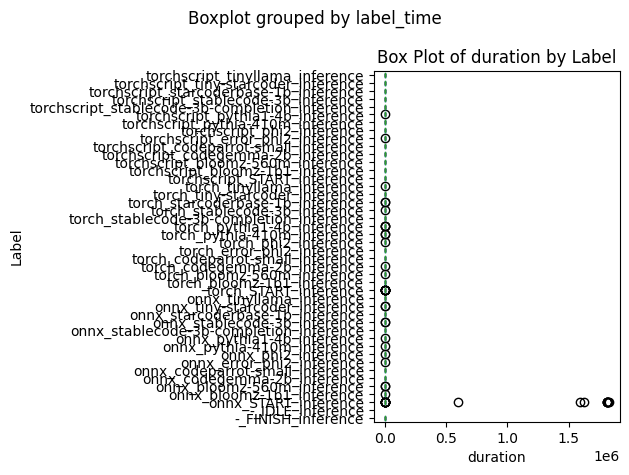

In [134]:

combined_df = time_df
# Assuming combined_df is already created and contains the data

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)


# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(20, 6))
    # Setting vert=False makes the box plots horizontal
    #plot_df = combined_df[combined_df['label_time'].str.startswith('torch_', na=False)]
    #plot_df = combined_df[combined_df['label_time'].str.startswith('torch_', na=False) & combined_df['label_time'].str.endswith('inference', na=False) ]
    plot_df = combined_df[ combined_df['label_time'].str.endswith('inference', na=False) ]
    
    plot_df.boxplot(column=variable, by='label_time', grid=False, vert=False) #df[df['A'].notna()]
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.ylabel('Label')
    plt.yticks(rotation=0)  # Rotate label ticks if necessary
    plt.tight_layout()  # Adjust layout to make room for labels
    #plt.xlim([0,20])
    #plt.savefig(path+"duration_runall")
plt.show()


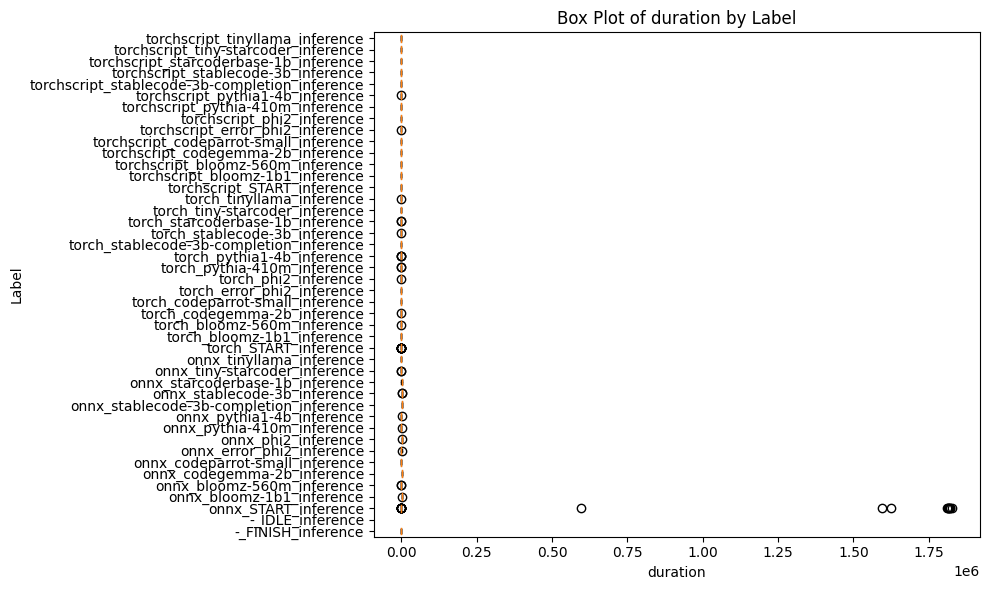

In [135]:

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    plot_df = combined_df[ combined_df['label_time'].str.endswith('inference', na=False) ]
    
    grouped = plot_df.groupby('label_time')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.tight_layout()  # Adjust layout to make room for labels

plt.show()


In [136]:
#condition = time_df['label'].str.endswith('phi2')

#time_plot = remove_condition_rows( condition, time_df)
time_plot = time_df
time_plot

time      runtime                     model  \
0     2024-06-08 21:41:59.000000            -                      IDLE   
1     2024-06-08 21:47:00.000000        torch                     START   
2     2024-06-08 21:47:00.919120          NaN                       NaN   
3     2024-06-08 21:47:02.775654          NaN                       NaN   
4     2024-06-08 21:50:13.000000        torch                pythia1-4b   
...                          ...          ...                       ...   
1315  2024-11-17 11:48:18.000000  torchscript                bloomz-1b1   
1316  2024-11-17 11:48:19.430100          NaN                       NaN   
1317  2024-11-17 11:48:27.489051          NaN                       NaN   
1318  2024-11-17 11:50:06.000000  torchscript  stablecode-3b-completion   
1319  2024-11-17 11:50:07.000000            -                    FINISH   

           engine                model_name  start_end        file  \
0             NaN                       NaN        NaN      runall   
1             NaN                       NaN        NaN      runall   
2           torch                pythia1-4b        1.0  load_times   
3           torch                pythia1-4b        0.0  load_times   
4             NaN                       NaN        NaN      runall   
...           ...                       ...        ...         ...   
1315          NaN                       NaN        NaN      runall   
1316  torchscript  stablecode-3b-completion        1.0  load_times   
1317  torchscript  stablecode-3b-completion        0.0  load_times   
1318          NaN                       NaN        NaN      runall   
1319          NaN                       NaN        NaN      runall   

                                     label    duration  \
0                                     idle         NaN   
1                              torch_START  301.000000   
2                         torch_pythia1-4b    0.919120   
3                         torch_pythia1-4b    1.856534   
4                         torch_pythia1-4b  190.224346   
...                                    ...         ...   
1315                torchscript_bloomz-1b1   95.861945   
1316  torchscript_stablecode-3b-completion    1.430100   
1317  torchscript_stablecode-3b-completion    8.058951   
1318  torchscript_stablecode-3b-completion   98.510949   
1319                                finish    1.000000   

                                          label_time  experiment  
0                                   -_IDLE_inference           1  
1                              torch_START_inference           1  
2                                                NaN           1  
3                              torch_pythia1-4b_load           1  
4                         torch_pythia1-4b_inference           1  
...                                              ...         ...  
1315                torchscript_bloomz-1b1_inference           9  
1316                                             NaN           9  
1317       torchscript_stablecode-3b-completion_load           9  
1318  torchscript_stablecode-3b-completion_inference           9  
1319                              -_FINISH_inference           9  

[1320 rows x 11 columns]

In [137]:
condition = time_plot['label'].str.startswith('-')
#remove_condition_rows( condition, energi_df)
#energi_df = energi_df[~condition]
time_plot = remove_condition_rows( condition, time_plot)

condition = time_plot['label'].str.startswith('idle')
time_plot = remove_condition_rows( condition, time_plot)

condition = time_plot['label'].str.startswith('finish')
time_plot = remove_condition_rows( condition, time_plot)

condition = time_plot['label'].str.endswith('START')
time_plot = remove_condition_rows( condition, time_plot)

time_plot

time      runtime                     model  \
2     2024-06-08 21:47:00.919120          NaN                       NaN   
3     2024-06-08 21:47:02.775654          NaN                       NaN   
4     2024-06-08 21:50:13.000000        torch                pythia1-4b   
5     2024-06-08 21:50:14.825155          NaN                       NaN   
6     2024-06-08 21:50:16.176765          NaN                       NaN   
...                          ...          ...                       ...   
1314  2024-11-17 11:46:42.138055          NaN                       NaN   
1315  2024-11-17 11:48:18.000000  torchscript                bloomz-1b1   
1316  2024-11-17 11:48:19.430100          NaN                       NaN   
1317  2024-11-17 11:48:27.489051          NaN                       NaN   
1318  2024-11-17 11:50:06.000000  torchscript  stablecode-3b-completion   

           engine                model_name  start_end        file  \
2           torch                pythia1-4b        1.0  load_times   
3           torch                pythia1-4b        0.0  load_times   
4             NaN                       NaN        NaN      runall   
5           torch                 tinyllama        1.0  load_times   
6           torch                 tinyllama        0.0  load_times   
...           ...                       ...        ...         ...   
1314  torchscript                bloomz-1b1        0.0  load_times   
1315          NaN                       NaN        NaN      runall   
1316  torchscript  stablecode-3b-completion        1.0  load_times   
1317  torchscript  stablecode-3b-completion        0.0  load_times   
1318          NaN                       NaN        NaN      runall   

                                     label    duration  \
2                         torch_pythia1-4b    0.919120   
3                         torch_pythia1-4b    1.856534   
4                         torch_pythia1-4b  190.224346   
5                          torch_tinyllama    1.825155   
6                          torch_tinyllama    1.351610   
...                                    ...         ...   
1314                torchscript_bloomz-1b1    3.733180   
1315                torchscript_bloomz-1b1   95.861945   
1316  torchscript_stablecode-3b-completion    1.430100   
1317  torchscript_stablecode-3b-completion    8.058951   
1318  torchscript_stablecode-3b-completion   98.510949   

                                          label_time  experiment  
2                                                NaN           1  
3                              torch_pythia1-4b_load           1  
4                         torch_pythia1-4b_inference           1  
5                                                NaN           1  
6                               torch_tinyllama_load           1  
...                                              ...         ...  
1314                     torchscript_bloomz-1b1_load           9  
1315                torchscript_bloomz-1b1_inference           9  
1316                                             NaN           9  
1317       torchscript_stablecode-3b-completion_load           9  
1318  torchscript_stablecode-3b-completion_inference           9  

[1150 rows x 11 columns]

In [138]:
condition = time_plot['label'].str.endswith('error_phi2')
time_plot = remove_condition_rows( condition, time_plot)

time_plot

time      runtime                     model  \
2     2024-06-08 21:47:00.919120          NaN                       NaN   
3     2024-06-08 21:47:02.775654          NaN                       NaN   
4     2024-06-08 21:50:13.000000        torch                pythia1-4b   
5     2024-06-08 21:50:14.825155          NaN                       NaN   
6     2024-06-08 21:50:16.176765          NaN                       NaN   
...                          ...          ...                       ...   
1314  2024-11-17 11:46:42.138055          NaN                       NaN   
1315  2024-11-17 11:48:18.000000  torchscript                bloomz-1b1   
1316  2024-11-17 11:48:19.430100          NaN                       NaN   
1317  2024-11-17 11:48:27.489051          NaN                       NaN   
1318  2024-11-17 11:50:06.000000  torchscript  stablecode-3b-completion   

           engine                model_name  start_end        file  \
2           torch                pythia1-4b        1.0  load_times   
3           torch                pythia1-4b        0.0  load_times   
4             NaN                       NaN        NaN      runall   
5           torch                 tinyllama        1.0  load_times   
6           torch                 tinyllama        0.0  load_times   
...           ...                       ...        ...         ...   
1314  torchscript                bloomz-1b1        0.0  load_times   
1315          NaN                       NaN        NaN      runall   
1316  torchscript  stablecode-3b-completion        1.0  load_times   
1317  torchscript  stablecode-3b-completion        0.0  load_times   
1318          NaN                       NaN        NaN      runall   

                                     label    duration  \
2                         torch_pythia1-4b    0.919120   
3                         torch_pythia1-4b    1.856534   
4                         torch_pythia1-4b  190.224346   
5                          torch_tinyllama    1.825155   
6                          torch_tinyllama    1.351610   
...                                    ...         ...   
1314                torchscript_bloomz-1b1    3.733180   
1315                torchscript_bloomz-1b1   95.861945   
1316  torchscript_stablecode-3b-completion    1.430100   
1317  torchscript_stablecode-3b-completion    8.058951   
1318  torchscript_stablecode-3b-completion   98.510949   

                                          label_time  experiment  
2                                                NaN           1  
3                              torch_pythia1-4b_load           1  
4                         torch_pythia1-4b_inference           1  
5                                                NaN           1  
6                               torch_tinyllama_load           1  
...                                              ...         ...  
1314                     torchscript_bloomz-1b1_load           9  
1315                torchscript_bloomz-1b1_inference           9  
1316                                             NaN           9  
1317       torchscript_stablecode-3b-completion_load           9  
1318  torchscript_stablecode-3b-completion_inference           9  

[1080 rows x 11 columns]

In [139]:
time_inference_df = time_plot[ time_plot['label_time'].str.endswith('inference', na=False) ]
print(len(time_inference_df))
time_inference_df

360


time      runtime                     model  \
4     2024-06-08 21:50:13.000000        torch                pythia1-4b   
7     2024-06-08 21:53:25.000000        torch                 tinyllama   
13    2024-06-08 21:59:17.000000        torch          codeparrot-small   
16    2024-06-08 22:02:28.000000        torch               pythia-410m   
20    2024-06-08 22:11:32.000000         onnx                pythia1-4b   
...                          ...          ...                       ...   
1305  2024-11-17 11:38:36.000000        torch                bloomz-1b1   
1308  2024-11-17 11:44:58.000000        torch  stablecode-3b-completion   
1312  2024-11-17 11:46:37.000000  torchscript          starcoderbase-1b   
1315  2024-11-17 11:48:18.000000  torchscript                bloomz-1b1   
1318  2024-11-17 11:50:06.000000  torchscript  stablecode-3b-completion   

     engine model_name  start_end    file  \
4       NaN        NaN        NaN  runall   
7       NaN        NaN        NaN  runall   
13      NaN        NaN        NaN  runall   
16      NaN        NaN        NaN  runall   
20      NaN        NaN        NaN  runall   
...     ...        ...        ...     ...   
1305    NaN        NaN        NaN  runall   
1308    NaN        NaN        NaN  runall   
1312    NaN        NaN        NaN  runall   
1315    NaN        NaN        NaN  runall   
1318    NaN        NaN        NaN  runall   

                                     label    duration  \
4                         torch_pythia1-4b  190.224346   
7                          torch_tinyllama  188.823235   
13                  torch_codeparrot-small   94.157740   
16                       torch_pythia-410m  189.240295   
20                         onnx_pythia1-4b  535.773089   
...                                    ...         ...   
1305                      torch_bloomz-1b1  105.085200   
1308        torch_stablecode-3b-completion  376.721075   
1312          torchscript_starcoderbase-1b   94.748692   
1315                torchscript_bloomz-1b1   95.861945   
1318  torchscript_stablecode-3b-completion   98.510949   

                                          label_time  experiment  
4                         torch_pythia1-4b_inference           1  
7                          torch_tinyllama_inference           1  
13                  torch_codeparrot-small_inference           1  
16                       torch_pythia-410m_inference           1  
20                         onnx_pythia1-4b_inference           1  
...                                              ...         ...  
1305                      torch_bloomz-1b1_inference           9  
1308        torch_stablecode-3b-completion_inference           9  
1312          torchscript_starcoderbase-1b_inference           9  
1315                torchscript_bloomz-1b1_inference           9  
1318  torchscript_stablecode-3b-completion_inference           9  

[360 rows x 11 columns]

In [140]:
time_inference_df['duration'].max()

1146.779721

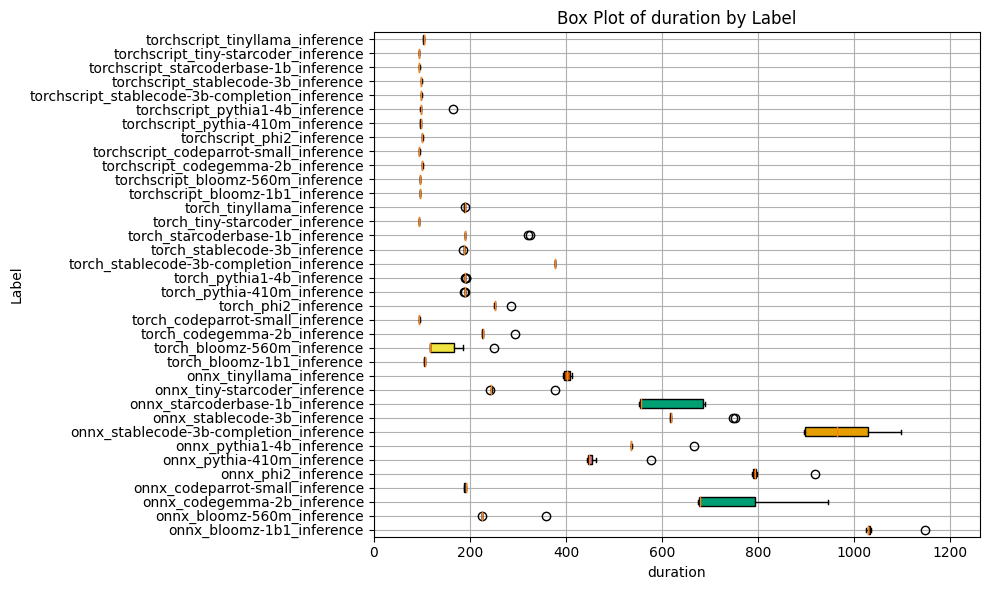

In [141]:

#combined_df = time_plot

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    #plot_df = combined_df[ combined_df['label_time'].str.endswith('inference', na=False) ]
    plot_df = time_inference_df
    
    grouped = plot_df.groupby('label_time')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.xlim([0,plot_df['duration'].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    plt.savefig(save_dir+ "duration_marks.png") if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")

plt.show()


In [142]:
time_inference_df.head()

time runtime             model engine model_name  \
4   2024-06-08 21:50:13.000000   torch        pythia1-4b    NaN        NaN   
7   2024-06-08 21:53:25.000000   torch         tinyllama    NaN        NaN   
13  2024-06-08 21:59:17.000000   torch  codeparrot-small    NaN        NaN   
16  2024-06-08 22:02:28.000000   torch       pythia-410m    NaN        NaN   
20  2024-06-08 22:11:32.000000    onnx        pythia1-4b    NaN        NaN   

    start_end    file                   label    duration  \
4         NaN  runall        torch_pythia1-4b  190.224346   
7         NaN  runall         torch_tinyllama  188.823235   
13        NaN  runall  torch_codeparrot-small   94.157740   
16        NaN  runall       torch_pythia-410m  189.240295   
20        NaN  runall         onnx_pythia1-4b  535.773089   

                          label_time  experiment  
4         torch_pythia1-4b_inference           1  
7          torch_tinyllama_inference           1  
13  torch_codeparrot-small_inference           1  
16       torch_pythia-410m_inference           1  
20         onnx_pythia1-4b_inference           1

In [143]:
time_inference_df = time_inference_df[['label','experiment','duration',]]
time_inference_df

label  experiment    duration
4                         torch_pythia1-4b           1  190.224346
7                          torch_tinyllama           1  188.823235
13                  torch_codeparrot-small           1   94.157740
16                       torch_pythia-410m           1  189.240295
20                         onnx_pythia1-4b           1  535.773089
...                                    ...         ...         ...
1305                      torch_bloomz-1b1           9  105.085200
1308        torch_stablecode-3b-completion           9  376.721075
1312          torchscript_starcoderbase-1b           9   94.748692
1315                torchscript_bloomz-1b1           9   95.861945
1318  torchscript_stablecode-3b-completion           9   98.510949

[360 rows x 3 columns]

In [144]:
time_inference_df.to_csv(tables_dir+'final_inference_time_data.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")

In [145]:
time_inference_df = time_inference_df.drop(columns = ['experiment'])

In [146]:
# Calculate mean values for each label
df = time_inference_df
median_time_inference = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_time_inference.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_time_inference

label     duration
0                        onnx_bloomz-1b1  1029.257360
1                       onnx_bloomz-560m   225.435832
2                      onnx_codegemma-2b   678.768990
3                  onnx_codeparrot-small   191.048335
4                              onnx_phi2   793.478886
5                       onnx_pythia-410m   447.527716
6                        onnx_pythia1-4b   535.354030
7                     onnx_stablecode-3b   617.516664
8          onnx_stablecode-3b-completion   964.568877
9                  onnx_starcoderbase-1b   556.800123
10                   onnx_tiny-starcoder   244.478897
11                        onnx_tinyllama   401.162165
12                      torch_bloomz-1b1   105.560827
13                     torch_bloomz-560m   117.582811
14                    torch_codegemma-2b   226.349586
15                torch_codeparrot-small    94.684550
16                            torch_phi2   251.969879
17                     torch_pythia-410m   189.228686
18                      torch_pythia1-4b   190.243684
19                   torch_stablecode-3b   187.495280
20        torch_stablecode-3b-completion   376.661464
21                torch_starcoderbase-1b   190.354028
22                  torch_tiny-starcoder    94.641196
23                       torch_tinyllama   188.817669
24                torchscript_bloomz-1b1    95.870545
25               torchscript_bloomz-560m    95.592858
26              torchscript_codegemma-2b   100.834018
27          torchscript_codeparrot-small    94.751527
28                      torchscript_phi2   100.872742
29               torchscript_pythia-410m    97.618725
30                torchscript_pythia1-4b    97.478730
31             torchscript_stablecode-3b    98.837918
32  torchscript_stablecode-3b-completion    98.986819
33          torchscript_starcoderbase-1b    94.641855
34            torchscript_tiny-starcoder    94.731451
35                 torchscript_tinyllama   103.467378

In [147]:
# Split the 'label' column into 'runtime' and 'model'
median_time_inference[['runtime', 'model']] = median_time_inference['label'].str.split('_', n=1, expand=True)
median_time_inference

label     duration      runtime  \
0                        onnx_bloomz-1b1  1029.257360         onnx   
1                       onnx_bloomz-560m   225.435832         onnx   
2                      onnx_codegemma-2b   678.768990         onnx   
3                  onnx_codeparrot-small   191.048335         onnx   
4                              onnx_phi2   793.478886         onnx   
5                       onnx_pythia-410m   447.527716         onnx   
6                        onnx_pythia1-4b   535.354030         onnx   
7                     onnx_stablecode-3b   617.516664         onnx   
8          onnx_stablecode-3b-completion   964.568877         onnx   
9                  onnx_starcoderbase-1b   556.800123         onnx   
10                   onnx_tiny-starcoder   244.478897         onnx   
11                        onnx_tinyllama   401.162165         onnx   
12                      torch_bloomz-1b1   105.560827        torch   
13                     torch_bloomz-560m   117.582811        torch   
14                    torch_codegemma-2b   226.349586        torch   
15                torch_codeparrot-small    94.684550        torch   
16                            torch_phi2   251.969879        torch   
17                     torch_pythia-410m   189.228686        torch   
18                      torch_pythia1-4b   190.243684        torch   
19                   torch_stablecode-3b   187.495280        torch   
20        torch_stablecode-3b-completion   376.661464        torch   
21                torch_starcoderbase-1b   190.354028        torch   
22                  torch_tiny-starcoder    94.641196        torch   
23                       torch_tinyllama   188.817669        torch   
24                torchscript_bloomz-1b1    95.870545  torchscript   
25               torchscript_bloomz-560m    95.592858  torchscript   
26              torchscript_codegemma-2b   100.834018  torchscript   
27          torchscript_codeparrot-small    94.751527  torchscript   
28                      torchscript_phi2   100.872742  torchscript   
29               torchscript_pythia-410m    97.618725  torchscript   
30                torchscript_pythia1-4b    97.478730  torchscript   
31             torchscript_stablecode-3b    98.837918  torchscript   
32  torchscript_stablecode-3b-completion    98.986819  torchscript   
33          torchscript_starcoderbase-1b    94.641855  torchscript   
34            torchscript_tiny-starcoder    94.731451  torchscript   
35                 torchscript_tinyllama   103.467378  torchscript   

                       model  
0                 bloomz-1b1  
1                bloomz-560m  
2               codegemma-2b  
3           codeparrot-small  
4                       phi2  
5                pythia-410m  
6                 pythia1-4b  
7              stablecode-3b  
8   stablecode-3b-completion  
9           starcoderbase-1b  
10            tiny-starcoder  
11                 tinyllama  
12                bloomz-1b1  
13               bloomz-560m  
14              codegemma-2b  
15          codeparrot-small  
16                      phi2  
17               pythia-410m  
18                pythia1-4b  
19             stablecode-3b  
20  stablecode-3b-completion  
21          starcoderbase-1b  
22            tiny-starcoder  
23                 tinyllama  
24                bloomz-1b1  
25               bloomz-560m  
26              codegemma-2b  
27          codeparrot-small  
28                      phi2  
29               pythia-410m  
30                pythia1-4b  
31             stablecode-3b  
32  stablecode-3b-completion  
33          starcoderbase-1b  
34            tiny-starcoder  
35                 tinyllama

In [148]:
new_order= list(median_time_inference.columns[-2:]) + list(median_time_inference.columns[:-2])
# Reorder the columns by indexing in the new order
median_time_inference = median_time_inference[new_order]
median_time_inference

runtime                     model  \
0          onnx                bloomz-1b1   
1          onnx               bloomz-560m   
2          onnx              codegemma-2b   
3          onnx          codeparrot-small   
4          onnx                      phi2   
5          onnx               pythia-410m   
6          onnx                pythia1-4b   
7          onnx             stablecode-3b   
8          onnx  stablecode-3b-completion   
9          onnx          starcoderbase-1b   
10         onnx            tiny-starcoder   
11         onnx                 tinyllama   
12        torch                bloomz-1b1   
13        torch               bloomz-560m   
14        torch              codegemma-2b   
15        torch          codeparrot-small   
16        torch                      phi2   
17        torch               pythia-410m   
18        torch                pythia1-4b   
19        torch             stablecode-3b   
20        torch  stablecode-3b-completion   
21        torch          starcoderbase-1b   
22        torch            tiny-starcoder   
23        torch                 tinyllama   
24  torchscript                bloomz-1b1   
25  torchscript               bloomz-560m   
26  torchscript              codegemma-2b   
27  torchscript          codeparrot-small   
28  torchscript                      phi2   
29  torchscript               pythia-410m   
30  torchscript                pythia1-4b   
31  torchscript             stablecode-3b   
32  torchscript  stablecode-3b-completion   
33  torchscript          starcoderbase-1b   
34  torchscript            tiny-starcoder   
35  torchscript                 tinyllama   

                                   label     duration  
0                        onnx_bloomz-1b1  1029.257360  
1                       onnx_bloomz-560m   225.435832  
2                      onnx_codegemma-2b   678.768990  
3                  onnx_codeparrot-small   191.048335  
4                              onnx_phi2   793.478886  
5                       onnx_pythia-410m   447.527716  
6                        onnx_pythia1-4b   535.354030  
7                     onnx_stablecode-3b   617.516664  
8          onnx_stablecode-3b-completion   964.568877  
9                  onnx_starcoderbase-1b   556.800123  
10                   onnx_tiny-starcoder   244.478897  
11                        onnx_tinyllama   401.162165  
12                      torch_bloomz-1b1   105.560827  
13                     torch_bloomz-560m   117.582811  
14                    torch_codegemma-2b   226.349586  
15                torch_codeparrot-small    94.684550  
16                            torch_phi2   251.969879  
17                     torch_pythia-410m   189.228686  
18                      torch_pythia1-4b   190.243684  
19                   torch_stablecode-3b   187.495280  
20        torch_stablecode-3b-completion   376.661464  
21                torch_starcoderbase-1b   190.354028  
22                  torch_tiny-starcoder    94.641196  
23                       torch_tinyllama   188.817669  
24                torchscript_bloomz-1b1    95.870545  
25               torchscript_bloomz-560m    95.592858  
26              torchscript_codegemma-2b   100.834018  
27          torchscript_codeparrot-small    94.751527  
28                      torchscript_phi2   100.872742  
29               torchscript_pythia-410m    97.618725  
30                torchscript_pythia1-4b    97.478730  
31             torchscript_stablecode-3b    98.837918  
32  torchscript_stablecode-3b-completion    98.986819  
33          torchscript_starcoderbase-1b    94.641855  
34            torchscript_tiny-starcoder    94.731451  
35                 torchscript_tinyllama   103.467378

In [149]:
if SAVE_TABLES:
    median_time_inference.to_csv(tables_dir+'median_time_inference.csv', index=False)

In [150]:
median_time_inference = median_time_inference.drop(columns = ['label'])

In [151]:
filename = tables_dir + 'median_time_inference.tex'
save_latex_table(median_time_inference,filename)

\begin{tabular}{llr}
\toprule
runtime & model & duration \\
\midrule
onnx & bloomz-1b1 & 1029.257360 \\
onnx & bloomz-560m & 225.435832 \\
onnx & codegemma-2b & 678.768990 \\
onnx & codeparrot-small & 191.048335 \\
onnx & phi2 & 793.478886 \\
onnx & pythia-410m & 447.527716 \\
onnx & pythia1-4b & 535.354030 \\
onnx & stablecode-3b & 617.516664 \\
onnx & stablecode-3b-completion & 964.568877 \\
onnx & starcoderbase-1b & 556.800123 \\
onnx & tiny-starcoder & 244.478897 \\
onnx & tinyllama & 401.162165 \\
torch & bloomz-1b1 & 105.560827 \\
torch & bloomz-560m & 117.582811 \\
torch & codegemma-2b & 226.349586 \\
torch & codeparrot-small & 94.684550 \\
torch & phi2 & 251.969879 \\
torch & pythia-410m & 189.228686 \\
torch & pythia1-4b & 190.243684 \\
torch & stablecode-3b & 187.495280 \\
torch & stablecode-3b-completion & 376.661464 \\
torch & starcoderbase-1b & 190.354028 \\
torch & tiny-starcoder & 94.641196 \\
torch & tinyllama & 188.817669 \\
torchscript & bloomz-1b1 & 95.870545 \\
torc